### Attempt 1
#### Changing parameters of replacement values in cells 6 and 9.

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(labels=['EIN', 'NAME'], axis=1)

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0                  T10       Independent          C1000    ProductDev   
1                   T3       Independent          C2000  Preservation   
2                   T5  CompanySponsored          C3000    ProductDev   
3                   T3  CompanySponsored          C2000  Preservation   
4                   T3       Independent          C1000     Heathcare   
...                ...               ...            ...           ...   
34294               T4       Independent          C1000    ProductDev   
34295               T4  CompanySponsored          C3000    ProductDev   
34296               T3  CompanySponsored          C2000  Preservation   
34297               T5       Independent          C3000    ProductDev   
34298               T3       Independent          C1000  Preservation   

       ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS   ASK_AMT  \
0       Association       1              0                      N      5000   
1      Co-operative       1         1-9999                      N    108590   
2       Association       1              0                      N      5000   
3             Trust       1    10000-24999                      N      6692   
4             Trust       1  100000-499999                      N    142590   
...             ...     ...            ...                    ...       ...   
34294   Association       1              0                      N      5000   
34295   Association       1              0                      N      5000   
34296   Association       1              0                      N      5000   
34297   Association       1              0                      N      5000   
34298  Co-operative       1          1M-5M                      N  36500179   

       IS_SUCCESSFUL  
0                  1  
1                  1  
2                  0  
3                  1  
4                  1  
...              ...  
34294              0  
34295              0  
34296              0  
34297              1  
34298              0  

[34299 rows x 10 columns]

In [3]:
# Determine the number of unique values in each column.
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
applicationtype_counts = application_df.APPLICATION_TYPE.value_counts()
applicationtype_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

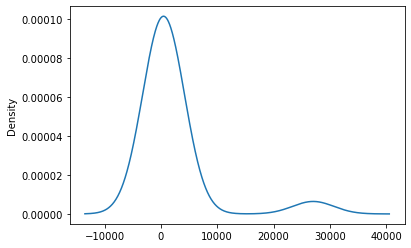

In [5]:
# Visualize the value counts of APPLICATION_TYPE
applicationtype_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(applicationtype_counts[applicationtype_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

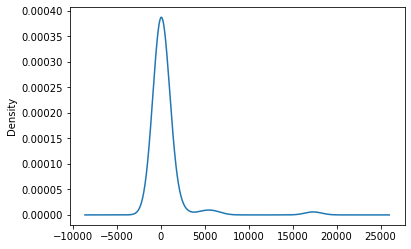

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\nooru\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC  \
0                                                0.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   NAME_100 BLACK MEN OF AMERICA  NAME_100 BLACK MEN OF MEMPHIS INC  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   NAME_100 BLACK MEN OF WEST GEORGIA INC  NAME_1150 WEBSTER STREET INC  \
0                                     0.0                           0.0   
1                                     0.0                           0.0   
2                                     0.0                           0.0   
3                                     0.0                           0.0   
4                                     0.0                           0.0   

   NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION  \
0                                                0.0                           
1                                                0.0                           
2                                                0.0                           
3                                                0.0                           
4                                                0.0                           

   NAME_13TH BOMB SQUADRON ASSOCIATION  NAME_146TH ALUMNI ASSOCIATION  \
0                                  0.0                            0.0   
1                                  0.0                            0.0   
2                                  0.0                            0.0   
3                                  0.0                            0.0   
4                                  0.0                            0.0   

   NAME_14TH ARMORED DIVISION  \
0                         0.0   
1                         0.0   
2                         0.0   
3                         0.0   
4                         0.0   

   NAME_150TH INTELLIGENCE SQUADRON ENLISTED ADVISORY COUNCIL  ...  \
0                                                0.0           ...   
1                                                0.0           ...   
2                                                0.0           ...   
3                                                0.0           ...   
4                                                0.0           ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                 

In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True).drop(columns=application_cat)
application_df.head()

EIN  STATUS  ASK_AMT  IS_SUCCESSFUL  \
0  10520599       1     5000              1   
1  10531628       1   108590              1   
2  10547893       1     5000              0   
3  10553066       1     6692              1   
4  10556103       1   142590              1   

   NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC  \
0                                                0.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   NAME_100 BLACK MEN OF AMERICA  NAME_100 BLACK MEN OF MEMPHIS INC  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   NAME_100 BLACK MEN OF WEST GEORGIA INC  NAME_1150 WEBSTER STREET INC  \
0                                     0.0                           0.0   
1                                     0.0                           0.0   
2                                     0.0                           0.0   
3                                     0.0                           0.0   
4                                     0.0                           0.0   

   NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION  \
0                                                0.0                           
1                                                0.0                           
2                                                0.0                           
3                                                0.0                           
4                                                0.0                           

   ...  INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0  ...                0.0                     0.0                       0.0   
1  ...                1.0                     0.0                       0.0   
2  ...                0.0                     0.0                       0.0   
3  ...                0.0                     1.0                       0.0   
4  ...                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 19613 columns]

In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                196130    
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 196,191
Trainable params: 196,191
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [18]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 29:36 - loss: 0.7510 - accuracy: 0.5312
Epoch 1: saving model to checkpoints\weights.01.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.7603 - accuracy: 0.5000   
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.8067 - accuracy: 0.4125
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 35/804 [>.............................] - ETA: 3s - loss: 0.8681 - accuracy: 0.3911
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 50/804 [>.............................] - ETA: 3s - loss: 0.9828 - accuracy: 0.3669
Epoch 1: saving model


Epoch 1: saving model to checkpoints\weights.01.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.7409 - accuracy: 0.6664
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.7346 - accuracy: 0.6689
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.7270 - accuracy: 0.6723
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.7198 - accuracy: 0.6749
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving


Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
198/804 [======>.......................] - ETA: 2s - loss: 0.2871 - accuracy: 0.9018
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.2853 - accuracy: 0.9022
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
230/804 [=======>......................] - ETA: 1s - loss: 0.2819 - accuracy: 0.9039
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
246/804 [========>.....................] - ETA: 1s - loss: 0.2803 - accuracy: 0.9049
Epoch 2: saving

687/804 [========================>.....] - ETA: 0s - loss: 0.2587 - accuracy: 0.9040
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.2579 - accuracy: 0.9042
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.2581 - accuracy: 0.9038
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.2572 - accuracy: 0.9044
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
746/804 [=======


Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.1199 - accuracy: 0.9513
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.1195 - accuracy: 0.9515
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.1193 - accuracy: 0.9516
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.1179 - accuracy: 0.9522
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving


Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 81/804 [==>...........................] - ETA: 2s - loss: 0.1026 - accuracy: 0.9556
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 97/804 [==>...........................] - ETA: 2s - loss: 0.1027 - accuracy: 0.9562
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 0.1018 - accuracy: 0.9566
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
128/804 [===>..........................] - ETA: 2s - loss: 0.1020 - accuracy: 0.9558
Epoch 4: saving

575/804 [====================>.........] - ETA: 0s - loss: 0.1039 - accuracy: 0.9570
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.1039 - accuracy: 0.9570
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.1037 - accuracy: 0.9570
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.1033 - accuracy: 0.9572
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
633/804 [=======


Epoch 5: saving model to checkpoints\weights.05.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.0972 - accuracy: 0.9617
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.0979 - accuracy: 0.9612
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 0.0985 - accuracy: 0.9605
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.0986 - accuracy: 0.9603
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.0975 - ac


Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.0992 - accuracy: 0.9604
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.0993 - accuracy: 0.9603
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.0994 - accuracy: 0.9603
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.0994 - accuracy: 0.9603
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0997 - accuracy: 0.9603
Epoch 6/100
  1/804 [..............


Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.0960 - accuracy: 0.9611
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.0949 - accuracy: 0.9614
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.0948 - accuracy: 0.9616
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.0949 - accuracy: 0.9614
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving

132/804 [===>..........................] - ETA: 2s - loss: 0.0976 - accuracy: 0.9590
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.0957 - accuracy: 0.9595
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.0934 - accuracy: 0.9602
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.0935 - accuracy: 0.9601
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving


Epoch 7: saving model to checkpoints\weights.07.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.0958 - accuracy: 0.9607
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.0959 - accuracy: 0.9606
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.0967 - accuracy: 0.9602
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.0967 - accuracy: 0.9602
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving

302/804 [==========>...................] - ETA: 2s - loss: 0.0927 - accuracy: 0.9614
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 0.0926 - accuracy: 0.9618
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.0922 - accuracy: 0.9620
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.0923 - accuracy: 0.9616
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.0918 - ac


Epoch 8: saving model to checkpoints\weights.08.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.0976 - accuracy: 0.9594
Epoch 8: saving model to checkpoints\weights.08.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0974 - accuracy: 0.9594
Epoch 9/100
  1/804 [..............................] - ETA: 3s - loss: 0.0813 - accuracy: 0.9688
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.0894 - accuracy: 0.9688
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.0878 - accuracy: 0.9676
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model 


Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.0948 - accuracy: 0.9608
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.0949 - accuracy: 0.9607
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.0953 - accuracy: 0.9605
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.0961 - accuracy: 0.9600
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving


Epoch 10: saving model to checkpoints\weights.10.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.0940 - accuracy: 0.9634
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.0941 - accuracy: 0.9628
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
189/804 [======>.......................] - ETA: 2s - loss: 0.0952 - accuracy: 0.9625
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.0931 - accuracy: 0.9634
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epo


Epoch 10: saving model to checkpoints\weights.10.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.0941 - accuracy: 0.9611
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.0936 - accuracy: 0.9615
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.0943 - accuracy: 0.9612
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.0941 - accuracy: 0.9614
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epo

312/804 [==========>...................] - ETA: 1s - loss: 0.0921 - accuracy: 0.9619
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 0.0919 - accuracy: 0.9622
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.0913 - accuracy: 0.9626
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.0921 - accuracy: 0.9623
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.0919 - accuracy: 0.9623
Epoch 11: saving model to che

743/804 [==========================>...] - ETA: 0s - loss: 0.0975 - accuracy: 0.9605
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.0975 - accuracy: 0.9606
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.0979 - accuracy: 0.9603
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.0979 - accuracy: 0.9602
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
795/804 [============================>.] - ETA: 0s - loss: 

411/804 [==============>...............] - ETA: 1s - loss: 0.0936 - accuracy: 0.9630
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.0932 - accuracy: 0.9632
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.0942 - accuracy: 0.9627
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.0937 - accuracy: 0.9628
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
471/

 87/804 [==>...........................] - ETA: 2s - loss: 0.0925 - accuracy: 0.9644
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.0920 - accuracy: 0.9651
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
115/804 [===>..........................] - ETA: 2s - loss: 0.0897 - accuracy: 0.9660
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
129/804 [===>..........................] - ETA: 2s - loss: 0.0889 - accuracy: 0.9658
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 

577/804 [====================>.........] - ETA: 0s - loss: 0.0903 - accuracy: 0.9638
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.0907 - accuracy: 0.9635
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.0914 - accuracy: 0.9634
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.0916 - accuracy: 0.9632
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 

253/804 [========>.....................] - ETA: 2s - loss: 0.0902 - accuracy: 0.9644
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.0887 - accuracy: 0.9646
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.0889 - accuracy: 0.9648
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.0906 - accuracy: 0.9638
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
313/


Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.0923 - accuracy: 0.9626
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.0919 - accuracy: 0.9627
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.0918 - accuracy: 0.9626
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.0917 - accuracy: 0.9626
Epoch 14: saving model to checkpoints\weights.14.hdf5
804/

419/804 [==============>...............] - ETA: 1s - loss: 0.0941 - accuracy: 0.9613
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.0936 - accuracy: 0.9614
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.0928 - accuracy: 0.9619
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.0936 - accuracy: 0.9616
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
474/804 [================>.............] - ETA: 1s - loss: 


Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.0859 - accuracy: 0.9673
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.0838 - accuracy: 0.9672
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.0851 - accuracy: 0.9671
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.0899 - accuracy: 0.9642
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epo


Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.0902 - accuracy: 0.9631
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.0903 - accuracy: 0.9631
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.0900 - accuracy: 0.9634
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.0895 - accuracy: 0.9636
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
639/

255/804 [========>.....................] - ETA: 2s - loss: 0.0850 - accuracy: 0.9663
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.0849 - accuracy: 0.9662
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.0848 - accuracy: 0.9659
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 0.0855 - accuracy: 0.9654
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
311/


Epoch 17: saving model to checkpoints\weights.17.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.0895 - accuracy: 0.9633
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.0891 - accuracy: 0.9635
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.0897 - accuracy: 0.9634
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.0895 - accuracy: 0.9636
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
804/


Epoch 18: saving model to checkpoints\weights.18.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.0926 - accuracy: 0.9616
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.0924 - accuracy: 0.9617
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.0911 - accuracy: 0.9623
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.0906 - accuracy: 0.9625
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epo


Epoch 19: saving model to checkpoints\weights.19.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 0.0929 - accuracy: 0.9612
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.0938 - accuracy: 0.9608
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.0910 - accuracy: 0.9619
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.0901 - accuracy: 0.9630
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epo


Epoch 19: saving model to checkpoints\weights.19.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.0886 - accuracy: 0.9632
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.0886 - accuracy: 0.9634
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.0875 - accuracy: 0.9639
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.0881 - accuracy: 0.9636
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epo

264/804 [========>.....................] - ETA: 2s - loss: 0.0906 - accuracy: 0.9637
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.0899 - accuracy: 0.9638
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 0.0902 - accuracy: 0.9635
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.0896 - accuracy: 0.9636
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 

754/804 [===========================>..] - ETA: 0s - loss: 0.0892 - accuracy: 0.9637
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.0891 - accuracy: 0.9637
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.0890 - accuracy: 0.9639
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.0893 - accuracy: 0.9638
Epoch 20: saving model to checkpoints\weights.20.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0892 - accuracy: 0.9638
Epoch 21/100
  1/804 [...


Epoch 21: saving model to checkpoints\weights.21.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.0879 - accuracy: 0.9644
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.0885 - accuracy: 0.9641
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.0892 - accuracy: 0.9637
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.0889 - accuracy: 0.9638
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
471/804 [================>.............] - ETA: 1s - loss: 


Epoch 22: saving model to checkpoints\weights.22.hdf5
 86/804 [==>...........................] - ETA: 2s - loss: 0.0768 - accuracy: 0.9695
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
101/804 [==>...........................] - ETA: 2s - loss: 0.0781 - accuracy: 0.9688
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
116/804 [===>..........................] - ETA: 2s - loss: 0.0798 - accuracy: 0.9685
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.0813 - accuracy: 0.9666
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epo


Epoch 22: saving model to checkpoints\weights.22.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.0872 - accuracy: 0.9654
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.0873 - accuracy: 0.9653
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.0874 - accuracy: 0.9651
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.0873 - accuracy: 0.9650
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epo


Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.0845 - accuracy: 0.9656
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 0.0844 - accuracy: 0.9659
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.0856 - accuracy: 0.9655
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.0841 - accuracy: 0.9663
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epo

747/804 [==========================>...] - ETA: 0s - loss: 0.0875 - accuracy: 0.9646
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.0878 - accuracy: 0.9646
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.0882 - accuracy: 0.9645
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.0882 - accuracy: 0.9644
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
804/804 [==============================] - 3s 4ms/step - lo

410/804 [==============>...............] - ETA: 1s - loss: 0.0867 - accuracy: 0.9660
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.0868 - accuracy: 0.9659
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.0866 - accuracy: 0.9659
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.0865 - accuracy: 0.9659
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
463/804 [================>.............] - ETA: 1s - loss: 

 65/804 [=>............................] - ETA: 3s - loss: 0.0826 - accuracy: 0.9688
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
 77/804 [=>............................] - ETA: 3s - loss: 0.0852 - accuracy: 0.9671
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.0811 - accuracy: 0.9684
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
102/804 [==>...........................] - ETA: 3s - loss: 0.0847 - accuracy: 0.9669
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
114/804 [===>..........................] - ETA: 3s - loss: 0.0853 - accuracy: 0.9663
Epoch 25: saving model to che


Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.0885 - accuracy: 0.9641
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.0883 - accuracy: 0.9641
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.0886 - accuracy: 0.9639
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.0885 - accuracy: 0.9639
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
592/

190/804 [======>.......................] - ETA: 2s - loss: 0.0841 - accuracy: 0.9666
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.0842 - accuracy: 0.9666
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 0.0827 - accuracy: 0.9670
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
235/804 [=======>......................] - ETA: 2s - loss: 0.0828 - accuracy: 0.9670
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
250/


Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.0869 - accuracy: 0.9648
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.0871 - accuracy: 0.9648
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.0876 - accuracy: 0.9647
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.0874 - accuracy: 0.9647
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
715/

319/804 [==========>...................] - ETA: 2s - loss: 0.0885 - accuracy: 0.9650
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.0880 - accuracy: 0.9651
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.0884 - accuracy: 0.9647
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.0886 - accuracy: 0.9648
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.0882 - accuracy: 0.9651
Epoch 27: saving model to che

804/804 [==============================] - 3s 4ms/step - loss: 0.0878 - accuracy: 0.9647
Epoch 28/100
  1/804 [..............................] - ETA: 2s - loss: 0.1107 - accuracy: 0.9375
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.0845 - accuracy: 0.9643
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.0898 - accuracy: 0.9630
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
 42/804 [>.............................] - ETA: 2s - loss: 0.0905 - accuracy: 0.9613
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: s


Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.0914 - accuracy: 0.9623
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.0909 - accuracy: 0.9627
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.0902 - accuracy: 0.9629
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.0901 - accuracy: 0.9632
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epo


Epoch 29: saving model to checkpoints\weights.29.hdf5
168/804 [=====>........................] - ETA: 2s - loss: 0.0818 - accuracy: 0.9682
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
183/804 [=====>........................] - ETA: 2s - loss: 0.0841 - accuracy: 0.9670
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
198/804 [======>.......................] - ETA: 2s - loss: 0.0846 - accuracy: 0.9665
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
213/804 [======>.......................] - ETA: 2s - loss: 0.0871 - accuracy: 0.9654
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epo

658/804 [=======================>......] - ETA: 0s - loss: 0.0878 - accuracy: 0.9645
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.0879 - accuracy: 0.9643
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.0879 - accuracy: 0.9643
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.0881 - accuracy: 0.9643
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
718/


Epoch 30: saving model to checkpoints\weights.30.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.0869 - accuracy: 0.9646
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.0870 - accuracy: 0.9648
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.0868 - accuracy: 0.9650
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.0880 - accuracy: 0.9647
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epo


Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.0854 - accuracy: 0.9635
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.0881 - accuracy: 0.9611
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.0848 - accuracy: 0.9641
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.0903 - accuracy: 0.9604
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epo

515/804 [==================>...........] - ETA: 1s - loss: 0.0855 - accuracy: 0.9658
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.0858 - accuracy: 0.9657
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.0860 - accuracy: 0.9656
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.0866 - accuracy: 0.9653
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 


Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.0858 - accuracy: 0.9631
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 0.0864 - accuracy: 0.9631
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
221/804 [=======>......................] - ETA: 2s - loss: 0.0853 - accuracy: 0.9635
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
236/804 [=======>......................] - ETA: 2s - loss: 0.0858 - accuracy: 0.9633
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epo

676/804 [========================>.....] - ETA: 0s - loss: 0.0873 - accuracy: 0.9634
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.0869 - accuracy: 0.9636
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.0869 - accuracy: 0.9638
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.0868 - accuracy: 0.9640
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
736/

357/804 [============>.................] - ETA: 1s - loss: 0.0828 - accuracy: 0.9664
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.0844 - accuracy: 0.9651
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.0839 - accuracy: 0.9653
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.0840 - accuracy: 0.9654
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
417/


Epoch 34: saving model to checkpoints\weights.34.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.0779 - accuracy: 0.9695
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.0731 - accuracy: 0.9714
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.0746 - accuracy: 0.9705
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.0795 - accuracy: 0.9670
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epo

533/804 [==================>...........] - ETA: 0s - loss: 0.0853 - accuracy: 0.9659
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.0852 - accuracy: 0.9661
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.0851 - accuracy: 0.9662
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.0847 - accuracy: 0.9664
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
593/


Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.0868 - accuracy: 0.9636
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.0870 - accuracy: 0.9640
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.0856 - accuracy: 0.9646
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.0852 - accuracy: 0.9649
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epo


Epoch 35: saving model to checkpoints\weights.35.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.0863 - accuracy: 0.9646
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.0862 - accuracy: 0.9648
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.0862 - accuracy: 0.9648
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.0863 - accuracy: 0.9650
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
769/

390/804 [=============>................] - ETA: 1s - loss: 0.0837 - accuracy: 0.9663
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.0834 - accuracy: 0.9662
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.0841 - accuracy: 0.9656
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.0840 - accuracy: 0.9658
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
450/


Epoch 37: saving model to checkpoints\weights.37.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.0797 - accuracy: 0.9692
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.0833 - accuracy: 0.9670
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.0826 - accuracy: 0.9667
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.0838 - accuracy: 0.9657
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epo

556/804 [===================>..........] - ETA: 0s - loss: 0.0825 - accuracy: 0.9663
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.0828 - accuracy: 0.9662
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.0839 - accuracy: 0.9658
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.0843 - accuracy: 0.9657
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
616/

236/804 [=======>......................] - ETA: 2s - loss: 0.0894 - accuracy: 0.9617
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.0892 - accuracy: 0.9622
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 0.0896 - accuracy: 0.9618
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.0888 - accuracy: 0.9621
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
292/

727/804 [==========================>...] - ETA: 0s - loss: 0.0842 - accuracy: 0.9659
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.0840 - accuracy: 0.9659
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.0843 - accuracy: 0.9657
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.0846 - accuracy: 0.9656
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
787/

408/804 [==============>...............] - ETA: 1s - loss: 0.0828 - accuracy: 0.9668
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.0826 - accuracy: 0.9668
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.0821 - accuracy: 0.9670
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.0820 - accuracy: 0.9672
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
468/

 87/804 [==>...........................] - ETA: 2s - loss: 0.0783 - accuracy: 0.9666
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
 99/804 [==>...........................] - ETA: 2s - loss: 0.0806 - accuracy: 0.9653
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 0.0815 - accuracy: 0.9654
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
126/804 [===>..........................] - ETA: 2s - loss: 0.0808 - accuracy: 0.9655
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
139/804 [====>.........................] - ETA: 2s - loss: 

574/804 [====================>.........] - ETA: 0s - loss: 0.0888 - accuracy: 0.9635
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.0886 - accuracy: 0.9636
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.0886 - accuracy: 0.9638
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.0879 - accuracy: 0.9640
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
634/

255/804 [========>.....................] - ETA: 1s - loss: 0.0889 - accuracy: 0.9610
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.0887 - accuracy: 0.9611
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.0883 - accuracy: 0.9620
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.0886 - accuracy: 0.9620
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
315/

740/804 [==========================>...] - ETA: 0s - loss: 0.0851 - accuracy: 0.9650
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.0846 - accuracy: 0.9653
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.0847 - accuracy: 0.9653
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.0843 - accuracy: 0.9652
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
804/

421/804 [==============>...............] - ETA: 1s - loss: 0.0857 - accuracy: 0.9653
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.0851 - accuracy: 0.9657
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.0861 - accuracy: 0.9656
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.0856 - accuracy: 0.9656
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
481/

 87/804 [==>...........................] - ETA: 2s - loss: 0.0850 - accuracy: 0.9662
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
101/804 [==>...........................] - ETA: 2s - loss: 0.0792 - accuracy: 0.9694
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
112/804 [===>..........................] - ETA: 2s - loss: 0.0833 - accuracy: 0.9676
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 0.0823 - accuracy: 0.9683
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 

577/804 [====================>.........] - ETA: 0s - loss: 0.0853 - accuracy: 0.9653
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.0860 - accuracy: 0.9650
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.0866 - accuracy: 0.9647
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.0863 - accuracy: 0.9650
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
637/

257/804 [========>.....................] - ETA: 2s - loss: 0.0860 - accuracy: 0.9644
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.0843 - accuracy: 0.9652
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.0846 - accuracy: 0.9649
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.0855 - accuracy: 0.9642
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
313/


Epoch 44: saving model to checkpoints\weights.44.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0842 - accuracy: 0.9654
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.0843 - accuracy: 0.9655
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.0841 - accuracy: 0.9656
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.0842 - accuracy: 0.9656
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
798/804 [============================>.] - ETA: 0s - loss: 

419/804 [==============>...............] - ETA: 1s - loss: 0.0829 - accuracy: 0.9672
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.0820 - accuracy: 0.9675
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.0825 - accuracy: 0.9672
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.0823 - accuracy: 0.9673
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
474/804 [================>.............] - ETA: 1s - loss: 

 90/804 [==>...........................] - ETA: 2s - loss: 0.0889 - accuracy: 0.9597
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.0884 - accuracy: 0.9598
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.0842 - accuracy: 0.9628
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.0829 - accuracy: 0.9644
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
150/

585/804 [====================>.........] - ETA: 0s - loss: 0.0844 - accuracy: 0.9652
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.0841 - accuracy: 0.9653
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.0840 - accuracy: 0.9651
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.0838 - accuracy: 0.9654
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
645/

266/804 [========>.....................] - ETA: 1s - loss: 0.0844 - accuracy: 0.9663
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.0829 - accuracy: 0.9671
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 0.0828 - accuracy: 0.9674
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.0831 - accuracy: 0.9670
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.0821 - accuracy: 0.9675
Epoch 47: saving model to che

730/804 [==========================>...] - ETA: 0s - loss: 0.0843 - accuracy: 0.9658
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.0844 - accuracy: 0.9659
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0843 - accuracy: 0.9659
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0842 - accuracy: 0.9660
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.0840 - accuracy: 0.9662
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
778/804 [=====================


Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.0849 - accuracy: 0.9664
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.0849 - accuracy: 0.9664
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.0849 - accuracy: 0.9663
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.0844 - accuracy: 0.9664
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
426/

 26/804 [..............................] - ETA: 3s - loss: 0.0766 - accuracy: 0.9724
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 0.0810 - accuracy: 0.9679
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
 53/804 [>.............................] - ETA: 3s - loss: 0.0769 - accuracy: 0.9699
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
 68/804 [=>............................] - ETA: 3s - loss: 0.0720 - accuracy: 0.9706
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
 83/


Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.0800 - accuracy: 0.9677
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.0800 - accuracy: 0.9675
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.0803 - accuracy: 0.9672
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.0809 - accuracy: 0.9670
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epo

164/804 [=====>........................] - ETA: 2s - loss: 0.0876 - accuracy: 0.9638
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.0888 - accuracy: 0.9635
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.0879 - accuracy: 0.9638
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.0880 - accuracy: 0.9640
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
224/

649/804 [=======================>......] - ETA: 0s - loss: 0.0845 - accuracy: 0.9659
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.0843 - accuracy: 0.9660
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.0842 - accuracy: 0.9662
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.0844 - accuracy: 0.9659
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.0839 - accuracy: 0.9661
Epoch 50: saving model to che

320/804 [==========>...................] - ETA: 1s - loss: 0.0770 - accuracy: 0.9705
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.0787 - accuracy: 0.9693
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.0787 - accuracy: 0.9690
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.0785 - accuracy: 0.9689
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.0797 - accuracy: 0.9681
Epoch 51: saving model to che

  1/804 [..............................] - ETA: 6s - loss: 0.1170 - accuracy: 0.9375
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.0711 - accuracy: 0.9706
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 0.0671 - accuracy: 0.9744
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.0781 - accuracy: 0.9681
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 64/


Epoch 52: saving model to checkpoints\weights.52.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.0847 - accuracy: 0.9664
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.0851 - accuracy: 0.9660
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.0843 - accuracy: 0.9664
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.0843 - accuracy: 0.9663
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epo


Epoch 53: saving model to checkpoints\weights.53.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.0776 - accuracy: 0.9691
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.0775 - accuracy: 0.9689
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.0780 - accuracy: 0.9684
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.0770 - accuracy: 0.9688
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epo


Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.0806 - accuracy: 0.9674
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.0804 - accuracy: 0.9675
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.0810 - accuracy: 0.9673
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.0810 - accuracy: 0.9673
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
702/

312/804 [==========>...................] - ETA: 1s - loss: 0.0866 - accuracy: 0.9652
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.0862 - accuracy: 0.9652
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.0857 - accuracy: 0.9653
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.0849 - accuracy: 0.9655
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
368/

791/804 [============================>.] - ETA: 0s - loss: 0.0825 - accuracy: 0.9671
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0834 - accuracy: 0.9666
Epoch 55/100
  1/804 [..............................] - ETA: 3s - loss: 0.1166 - accuracy: 0.9375
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.0818 - accuracy: 0.9621
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.0798 - accuracy: 0.9634
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: s


Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.0852 - accuracy: 0.9649
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.0843 - accuracy: 0.9653
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.0840 - accuracy: 0.9655
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.0840 - accuracy: 0.9655
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epo

145/804 [====>.........................] - ETA: 2s - loss: 0.0798 - accuracy: 0.9703
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.0807 - accuracy: 0.9699
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 0.0827 - accuracy: 0.9689
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.0806 - accuracy: 0.9702
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
205/

635/804 [======================>.......] - ETA: 0s - loss: 0.0836 - accuracy: 0.9670
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.0833 - accuracy: 0.9671
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.0833 - accuracy: 0.9670
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.0829 - accuracy: 0.9672
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.0827 - accuracy: 0.9671
Epoch 56: saving model to che

311/804 [==========>...................] - ETA: 1s - loss: 0.0773 - accuracy: 0.9685
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 0.0782 - accuracy: 0.9682
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.0790 - accuracy: 0.9678
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
356/804 [============>.................] - ETA: 1s - loss: 0.0793 - accuracy: 0.9680
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
371/

804/804 [==============================] - 3s 4ms/step - loss: 0.0829 - accuracy: 0.9667
Epoch 58/100
  1/804 [..............................] - ETA: 3s - loss: 0.0904 - accuracy: 0.9688
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.0856 - accuracy: 0.9714
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
 24/804 [..............................] - ETA: 3s - loss: 0.0883 - accuracy: 0.9688
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
 37/804 [>.............................] - ETA: 3s - loss: 0.0853 - accuracy: 0.9662
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: s


Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.0821 - accuracy: 0.9659
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.0817 - accuracy: 0.9661
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.0821 - accuracy: 0.9659
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.0830 - accuracy: 0.9655
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epo


Epoch 59: saving model to checkpoints\weights.59.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.0821 - accuracy: 0.9654
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.0805 - accuracy: 0.9663
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.0799 - accuracy: 0.9665
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.0796 - accuracy: 0.9666
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epo

633/804 [======================>.......] - ETA: 0s - loss: 0.0820 - accuracy: 0.9668
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.0823 - accuracy: 0.9668
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.0820 - accuracy: 0.9670
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.0825 - accuracy: 0.9668
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 

294/804 [=========>....................] - ETA: 2s - loss: 0.0846 - accuracy: 0.9645
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 0.0851 - accuracy: 0.9644
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 0.0851 - accuracy: 0.9643
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.0854 - accuracy: 0.9639
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.0849 - accuracy: 0.9642
Epoch 60: saving model to che

763/804 [===========================>..] - ETA: 0s - loss: 0.0820 - accuracy: 0.9668
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.0823 - accuracy: 0.9667
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.0822 - accuracy: 0.9668
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.0824 - accuracy: 0.9666
Epoch 60: saving model to checkpoints\weights.60.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0823 - accuracy: 0.9666
Epoch 61/100
  1/804 [..............................] - ETA: 1s - loss: 0.0833 -


Epoch 61: saving model to checkpoints\weights.61.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.0824 - accuracy: 0.9658
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 0.0828 - accuracy: 0.9657
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.0831 - accuracy: 0.9655
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.0834 - accuracy: 0.9654
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
484/804 [=================>............] - ETA: 1s - loss: 

 91/804 [==>...........................] - ETA: 2s - loss: 0.0759 - accuracy: 0.9694
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.0742 - accuracy: 0.9699
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.0739 - accuracy: 0.9703
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.0740 - accuracy: 0.9701
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
151/


Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.0817 - accuracy: 0.9675
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.0821 - accuracy: 0.9673
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.0824 - accuracy: 0.9671
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.0825 - accuracy: 0.9669
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epo

237/804 [=======>......................] - ETA: 2s - loss: 0.0808 - accuracy: 0.9669
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.0809 - accuracy: 0.9664
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 0.0797 - accuracy: 0.9671
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
275/804 [=========>....................] - ETA: 2s - loss: 0.0801 - accuracy: 0.9668
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.0800 - accuracy: 0.9668
Epoch 63: saving model to che

712/804 [=========================>....] - ETA: 0s - loss: 0.0822 - accuracy: 0.9659
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.0822 - accuracy: 0.9660
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.0818 - accuracy: 0.9662
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.0823 - accuracy: 0.9661
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 

378/804 [=============>................] - ETA: 1s - loss: 0.0833 - accuracy: 0.9659
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.0828 - accuracy: 0.9662
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.0829 - accuracy: 0.9660
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.0833 - accuracy: 0.9661
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 


Epoch 65: saving model to checkpoints\weights.65.hdf5
 52/804 [>.............................] - ETA: 3s - loss: 0.1000 - accuracy: 0.9573
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
 64/804 [=>............................] - ETA: 3s - loss: 0.0983 - accuracy: 0.9595
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 0.0922 - accuracy: 0.9624
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
 94/804 [==>...........................] - ETA: 2s - loss: 0.0931 - accuracy: 0.9618
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
108/


Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.0801 - accuracy: 0.9667
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.0814 - accuracy: 0.9662
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.0809 - accuracy: 0.9664
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.0804 - accuracy: 0.9667
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epo


Epoch 66: saving model to checkpoints\weights.66.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.0751 - accuracy: 0.9712
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 0.0760 - accuracy: 0.9705
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
235/804 [=======>......................] - ETA: 2s - loss: 0.0765 - accuracy: 0.9699
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.0772 - accuracy: 0.9699
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epo

674/804 [========================>.....] - ETA: 0s - loss: 0.0828 - accuracy: 0.9658
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.0828 - accuracy: 0.9657
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.0828 - accuracy: 0.9657
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.0827 - accuracy: 0.9658
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.0825 - accuracy: 0.9659
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to che


Epoch 67: saving model to checkpoints\weights.67.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.0855 - accuracy: 0.9645
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.0860 - accuracy: 0.9645
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.0857 - accuracy: 0.9644
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.0846 - accuracy: 0.9653
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
391/

799/804 [============================>.] - ETA: 0s - loss: 0.0814 - accuracy: 0.9667
Epoch 67: saving model to checkpoints\weights.67.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0816 - accuracy: 0.9665
Epoch 68/100
  1/804 [..............................] - ETA: 2s - loss: 0.1169 - accuracy: 0.9688
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.0787 - accuracy: 0.9712
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.0791 - accuracy: 0.9688
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 37/804 [>.............................] - ETA: 3s - loss: 0.0801 -


Epoch 68: saving model to checkpoints\weights.68.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.0821 - accuracy: 0.9665
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.0817 - accuracy: 0.9667
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.0810 - accuracy: 0.9671
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.0807 - accuracy: 0.9674
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
507/

116/804 [===>..........................] - ETA: 2s - loss: 0.0766 - accuracy: 0.9696
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
128/804 [===>..........................] - ETA: 2s - loss: 0.0792 - accuracy: 0.9678
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.0820 - accuracy: 0.9661
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
153/804 [====>.........................] - ETA: 2s - loss: 0.0831 - accuracy: 0.9659
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
168/804 [=====>........................] - ETA: 2s - loss: 

582/804 [====================>.........] - ETA: 0s - loss: 0.0811 - accuracy: 0.9670
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.0809 - accuracy: 0.9671
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.0811 - accuracy: 0.9669
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.0811 - accuracy: 0.9669
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 


Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.0737 - accuracy: 0.9711
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.0724 - accuracy: 0.9720
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.0715 - accuracy: 0.9722
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.0708 - accuracy: 0.9726
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
292/

713/804 [=========================>....] - ETA: 0s - loss: 0.0810 - accuracy: 0.9663
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.0810 - accuracy: 0.9663
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.0810 - accuracy: 0.9664
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.0816 - accuracy: 0.9661
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
769/


Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.0827 - accuracy: 0.9658
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.0822 - accuracy: 0.9660
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.0823 - accuracy: 0.9660
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.0821 - accuracy: 0.9664
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 


Epoch 72: saving model to checkpoints\weights.72.hdf5
 16/804 [..............................] - ETA: 3s - loss: 0.0651 - accuracy: 0.9727
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.0828 - accuracy: 0.9698
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.0852 - accuracy: 0.9654
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.0945 - accuracy: 0.9600
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epo


Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.0816 - accuracy: 0.9664
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.0826 - accuracy: 0.9660
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.0827 - accuracy: 0.9662
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.0830 - accuracy: 0.9660
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epo


Epoch 73: saving model to checkpoints\weights.73.hdf5
187/804 [=====>........................] - ETA: 2s - loss: 0.0832 - accuracy: 0.9659
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 0.0805 - accuracy: 0.9674
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.0792 - accuracy: 0.9680
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.0786 - accuracy: 0.9685
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
242/

677/804 [========================>.....] - ETA: 0s - loss: 0.0808 - accuracy: 0.9662
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.0811 - accuracy: 0.9660
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.0815 - accuracy: 0.9658
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.0813 - accuracy: 0.9660
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
737/


Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.0824 - accuracy: 0.9669
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.0820 - accuracy: 0.9673
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.0828 - accuracy: 0.9666
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.0821 - accuracy: 0.9668
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epo


Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.0801 - accuracy: 0.9716
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.0794 - accuracy: 0.9709
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.0791 - accuracy: 0.9704
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.0795 - accuracy: 0.9701
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epo


Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.0797 - accuracy: 0.9678
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.0804 - accuracy: 0.9673
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.0798 - accuracy: 0.9674
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.0802 - accuracy: 0.9670
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epo

210/804 [======>.......................] - ETA: 2s - loss: 0.0845 - accuracy: 0.9646
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.0842 - accuracy: 0.9646
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 0.0829 - accuracy: 0.9651
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 0.0850 - accuracy: 0.9643
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
270/

705/804 [=========================>....] - ETA: 0s - loss: 0.0816 - accuracy: 0.9668
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.0819 - accuracy: 0.9665
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.0816 - accuracy: 0.9668
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.0813 - accuracy: 0.9670
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
765/


Epoch 77: saving model to checkpoints\weights.77.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.0791 - accuracy: 0.9685
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.0786 - accuracy: 0.9686
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.0784 - accuracy: 0.9684
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.0789 - accuracy: 0.9682
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epo


Epoch 78: saving model to checkpoints\weights.78.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.0976 - accuracy: 0.9589
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.0920 - accuracy: 0.9616
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.0946 - accuracy: 0.9605
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.0914 - accuracy: 0.9623
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epo


Epoch 78: saving model to checkpoints\weights.78.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.0842 - accuracy: 0.9660
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.0840 - accuracy: 0.9661
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.0837 - accuracy: 0.9663
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.0839 - accuracy: 0.9664
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epo


Epoch 79: saving model to checkpoints\weights.79.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.0821 - accuracy: 0.9646
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 0.0817 - accuracy: 0.9651
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.0812 - accuracy: 0.9655
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 0.0804 - accuracy: 0.9661
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epo


Epoch 79: saving model to checkpoints\weights.79.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.0818 - accuracy: 0.9657
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0815 - accuracy: 0.9659
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.0814 - accuracy: 0.9659
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.0812 - accuracy: 0.9660
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epo


Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.0806 - accuracy: 0.9680
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 0.0804 - accuracy: 0.9678
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.0799 - accuracy: 0.9681
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.0800 - accuracy: 0.9682
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epo

105/804 [==>...........................] - ETA: 2s - loss: 0.0787 - accuracy: 0.9696
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.0747 - accuracy: 0.9716
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.0753 - accuracy: 0.9708
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.0756 - accuracy: 0.9708
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
165/

600/804 [=====================>........] - ETA: 0s - loss: 0.0814 - accuracy: 0.9672
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.0816 - accuracy: 0.9670
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.0810 - accuracy: 0.9673
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.0806 - accuracy: 0.9675
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
663/


Epoch 82: saving model to checkpoints\weights.82.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 0.0756 - accuracy: 0.9695
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.0747 - accuracy: 0.9701
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.0748 - accuracy: 0.9699
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.0761 - accuracy: 0.9696
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epo


Epoch 82: saving model to checkpoints\weights.82.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.0811 - accuracy: 0.9672
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.0809 - accuracy: 0.9674
Epoch 83/100
  1/804 [..............................] - ETA: 1s - loss: 0.1019 - accuracy: 0.9375
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.0808 - accuracy: 0.9639
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
 29/804 [>.............................] - ETA: 2s - loss: 0.0788 - accuracy: 0.9677
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: s

472/804 [================>.............] - ETA: 1s - loss: 0.0788 - accuracy: 0.9688
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.0789 - accuracy: 0.9688
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.0787 - accuracy: 0.9690
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.0789 - accuracy: 0.9688
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
532/

141/804 [====>.........................] - ETA: 2s - loss: 0.0770 - accuracy: 0.9681
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
153/804 [====>.........................] - ETA: 2s - loss: 0.0779 - accuracy: 0.9675
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
168/804 [=====>........................] - ETA: 2s - loss: 0.0769 - accuracy: 0.9680
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
183/804 [=====>........................] - ETA: 2s - loss: 0.0794 - accuracy: 0.9672
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
198/


Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.0816 - accuracy: 0.9669
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.0816 - accuracy: 0.9670
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.0811 - accuracy: 0.9670
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.0818 - accuracy: 0.9666
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epo

299/804 [==========>...................] - ETA: 1s - loss: 0.0814 - accuracy: 0.9680
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.0815 - accuracy: 0.9682
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.0822 - accuracy: 0.9680
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.0818 - accuracy: 0.9680
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
359/

789/804 [============================>.] - ETA: 0s - loss: 0.0811 - accuracy: 0.9675
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0812 - accuracy: 0.9674
Epoch 86/100
  1/804 [..............................] - ETA: 2s - loss: 0.0593 - accuracy: 1.0000
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.0676 - accuracy: 0.9771
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 0.0705 - accuracy: 0.9760
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: s


Epoch 86: saving model to checkpoints\weights.86.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.0819 - accuracy: 0.9671
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.0819 - accuracy: 0.9672
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.0814 - accuracy: 0.9673
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.0812 - accuracy: 0.9675
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epo

151/804 [====>.........................] - ETA: 2s - loss: 0.0803 - accuracy: 0.9677
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.0809 - accuracy: 0.9680
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.0807 - accuracy: 0.9681
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.0789 - accuracy: 0.9688
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
211/

646/804 [=======================>......] - ETA: 0s - loss: 0.0808 - accuracy: 0.9674
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.0808 - accuracy: 0.9674
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.0801 - accuracy: 0.9677
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.0802 - accuracy: 0.9676
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
706/


Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.0786 - accuracy: 0.9677
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.0784 - accuracy: 0.9677
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.0787 - accuracy: 0.9677
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.0795 - accuracy: 0.9673
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epo


Epoch 89: saving model to checkpoints\weights.89.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.0783 - accuracy: 0.9668
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.0812 - accuracy: 0.9668
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
 48/804 [>.............................] - ETA: 2s - loss: 0.0863 - accuracy: 0.9642
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
 63/804 [=>............................] - ETA: 2s - loss: 0.0798 - accuracy: 0.9678
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epo


Epoch 89: saving model to checkpoints\weights.89.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.0808 - accuracy: 0.9662
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
534/804 [==================>...........] - ETA: 0s - loss: 0.0805 - accuracy: 0.9663
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.0801 - accuracy: 0.9665
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.0806 - accuracy: 0.9663
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epo

204/804 [======>.......................] - ETA: 1s - loss: 0.0829 - accuracy: 0.9660
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.0840 - accuracy: 0.9656
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.0843 - accuracy: 0.9655
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 0.0853 - accuracy: 0.9651
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epo


Epoch 90: saving model to checkpoints\weights.90.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.0810 - accuracy: 0.9678
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.0810 - accuracy: 0.9677
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.0809 - accuracy: 0.9678
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.0807 - accuracy: 0.9677
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epo


Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.0781 - accuracy: 0.9679
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.0783 - accuracy: 0.9677
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.0788 - accuracy: 0.9674
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.0799 - accuracy: 0.9672
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epo

 61/804 [=>............................] - ETA: 2s - loss: 0.0759 - accuracy: 0.9693
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.0736 - accuracy: 0.9708
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.0777 - accuracy: 0.9677
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.0814 - accuracy: 0.9661
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
121/

556/804 [===================>..........] - ETA: 0s - loss: 0.0822 - accuracy: 0.9668
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.0818 - accuracy: 0.9668
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.0820 - accuracy: 0.9667
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.0815 - accuracy: 0.9670
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
616/


Epoch 93: saving model to checkpoints\weights.93.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 0.0808 - accuracy: 0.9668
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.0804 - accuracy: 0.9669
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 0.0802 - accuracy: 0.9670
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 0.0803 - accuracy: 0.9672
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epo


Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0815 - accuracy: 0.9665
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.0814 - accuracy: 0.9666
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.0809 - accuracy: 0.9668
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.0805 - accuracy: 0.9670
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epo

423/804 [==============>...............] - ETA: 1s - loss: 0.0772 - accuracy: 0.9689
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.0777 - accuracy: 0.9688
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.0784 - accuracy: 0.9685
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.0776 - accuracy: 0.9688
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
484/

107/804 [==>...........................] - ETA: 2s - loss: 0.0810 - accuracy: 0.9679
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
122/804 [===>..........................] - ETA: 2s - loss: 0.0791 - accuracy: 0.9685
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.0784 - accuracy: 0.9697
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
144/804 [====>.........................] - ETA: 2s - loss: 0.0793 - accuracy: 0.9685
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
154/804 [====>.........................] - ETA: 2s - loss: 0.0802 - accuracy: 0.9673
Epoch 95: saving model to che

589/804 [====================>.........] - ETA: 0s - loss: 0.0765 - accuracy: 0.9694
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.0765 - accuracy: 0.9695
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.0772 - accuracy: 0.9691
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.0771 - accuracy: 0.9691
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 

270/804 [=========>....................] - ETA: 1s - loss: 0.0813 - accuracy: 0.9679
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.0800 - accuracy: 0.9686
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.0803 - accuracy: 0.9686
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.0794 - accuracy: 0.9690
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
330/

765/804 [===========================>..] - ETA: 0s - loss: 0.0804 - accuracy: 0.9676
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.0803 - accuracy: 0.9676
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.0801 - accuracy: 0.9678
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0799 - accuracy: 0.9679
Epoch 97/100

Epoch 97: saving model to checkpoints\weights.97.hdf5
  1/804 [..............................] - ETA: 8s - loss: 0.0542 - accuracy: 1.0000
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: s


Epoch 97: saving model to checkpoints\weights.97.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.0784 - accuracy: 0.9687
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.0780 - accuracy: 0.9689
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.0778 - accuracy: 0.9689
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.0772 - accuracy: 0.9692
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epo


Epoch 98: saving model to checkpoints\weights.98.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.0825 - accuracy: 0.9676
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.0814 - accuracy: 0.9681
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.0830 - accuracy: 0.9670
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.0839 - accuracy: 0.9666
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epo

618/804 [======================>.......] - ETA: 0s - loss: 0.0798 - accuracy: 0.9682
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.0800 - accuracy: 0.9681
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.0798 - accuracy: 0.9682
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.0804 - accuracy: 0.9681
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
677/

298/804 [==========>...................] - ETA: 1s - loss: 0.0812 - accuracy: 0.9670
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.0794 - accuracy: 0.9677
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 0.0797 - accuracy: 0.9676
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.0802 - accuracy: 0.9676
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
353/804 [============>.................] - ETA: 1s - loss: 

788/804 [============================>.] - ETA: 0s - loss: 0.0800 - accuracy: 0.9680
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0800 - accuracy: 0.9680
Epoch 100/100
  1/804 [..............................] - ETA: 1s - loss: 0.0119 - accuracy: 1.0000
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.0838 - accuracy: 0.9727
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.0788 - accuracy: 0.9708
Epoch 100: saving model to checkpoints\weights.100.hd


Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.0808 - accuracy: 0.9684
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.0815 - accuracy: 0.9679
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.0816 - accuracy: 0.9680
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.0812 - accuracy: 0.9682
Epoch 100: saving model to checkpoin

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 2s - loss: 0.7149 - accuracy: 0.6176 - 2s/epoch - 9ms/step
Loss: 0.7148556113243103, Accuracy: 0.6176093220710754


In [ ]:
nn.save("AlphabetSoupCharity_Optimization.h5")

### Attempt 2
#### Changing number of training epochs to 150.

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=150,callbacks=[cp_callback])

Epoch 1/150
  1/804 [..............................] - ETA: 18:29 - loss: 0.0230 - accuracy: 1.0000
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 15/804 [..............................] - ETA: 2s - loss: 0.0592 - accuracy: 0.9792   
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.0532 - accuracy: 0.9808
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.0669 - accuracy: 0.9749
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf


Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.0798 - accuracy: 0.9677
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.0802 - accuracy: 0.9675
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.0804 - accuracy: 0.9673
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.0803 - accuracy: 0.9674
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving

176/804 [=====>........................] - ETA: 2s - loss: 0.0841 - accuracy: 0.9675
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 0.0839 - accuracy: 0.9674
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 0.0870 - accuracy: 0.9657
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
221/804 [=======>......................] - ETA: 2s - loss: 0.0877 - accuracy: 0.9654
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
236/804 [=======


Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.0807 - accuracy: 0.9683
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.0803 - accuracy: 0.9684
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.0808 - accuracy: 0.9680
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.0806 - accuracy: 0.9680
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving


Epoch 3: saving model to checkpoints\weights.03.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.0795 - accuracy: 0.9673
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.0801 - accuracy: 0.9669
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.0803 - accuracy: 0.9669
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.0790 - accuracy: 0.9676
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving

 43/804 [>.............................] - ETA: 2s - loss: 0.0685 - accuracy: 0.9731
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.0765 - accuracy: 0.9703
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.0802 - accuracy: 0.9679
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.0786 - accuracy: 0.9695
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
103/804 [==>....


Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.0786 - accuracy: 0.9688
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.0784 - accuracy: 0.9689
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.0779 - accuracy: 0.9691
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.0774 - accuracy: 0.9694
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving


Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.0750 - accuracy: 0.9697
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 0.0757 - accuracy: 0.9691
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.0788 - accuracy: 0.9681
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.0795 - accuracy: 0.9678
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving

724/804 [==========================>...] - ETA: 0s - loss: 0.0793 - accuracy: 0.9680
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.0794 - accuracy: 0.9679
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.0792 - accuracy: 0.9680
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.0797 - accuracy: 0.9677
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.0796 - ac


Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.0772 - accuracy: 0.9690
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.0777 - accuracy: 0.9687
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 0.0773 - accuracy: 0.9690
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.0771 - accuracy: 0.9689
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving


Epoch 7: saving model to checkpoints\weights.07.hdf5
101/804 [==>...........................] - ETA: 2s - loss: 0.0805 - accuracy: 0.9684
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
116/804 [===>..........................] - ETA: 2s - loss: 0.0796 - accuracy: 0.9688
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
131/804 [===>..........................] - ETA: 2s - loss: 0.0784 - accuracy: 0.9690
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
146/804 [====>.........................] - ETA: 2s - loss: 0.0794 - accuracy: 0.9679
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving


Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.0798 - accuracy: 0.9682
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.0796 - accuracy: 0.9682
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.0799 - accuracy: 0.9680
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.0797 - accuracy: 0.9678
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving

282/804 [=========>....................] - ETA: 1s - loss: 0.0809 - accuracy: 0.9679
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.0814 - accuracy: 0.9676
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.0821 - accuracy: 0.9673
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.0822 - accuracy: 0.9672
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
342/804 [=======


Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.0799 - accuracy: 0.9676
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0796 - accuracy: 0.9677
Epoch 9/150
  1/804 [..............................] - ETA: 2s - loss: 0.0638 - accuracy: 0.9688
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.0700 - accuracy: 0.9732
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 28/804 [>.............................] - ETA: 2s - 

463/804 [================>.............] - ETA: 1s - loss: 0.0749 - accuracy: 0.9702
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.0750 - accuracy: 0.9702
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.0743 - accuracy: 0.9704
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.0755 - accuracy: 0.9698
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
523/804 [=======


Epoch 10: saving model to checkpoints\weights.10.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.0801 - accuracy: 0.9702
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.0808 - accuracy: 0.9697
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.0780 - accuracy: 0.9708
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.0777 - accuracy: 0.9705
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epo

639/804 [======================>.......] - ETA: 0s - loss: 0.0810 - accuracy: 0.9671
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.0811 - accuracy: 0.9670
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.0811 - accuracy: 0.9670
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.0806 - accuracy: 0.9673
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
699/


Epoch 11: saving model to checkpoints\weights.11.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 0.0799 - accuracy: 0.9678
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.0787 - accuracy: 0.9682
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.0783 - accuracy: 0.9682
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.0787 - accuracy: 0.9677
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epo

  1/804 [..............................] - ETA: 7s - loss: 0.1040 - accuracy: 0.9688
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.0916 - accuracy: 0.9570
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.0844 - accuracy: 0.9637
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.0804 - accuracy: 0.9660
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 61/

491/804 [=================>............] - ETA: 1s - loss: 0.0796 - accuracy: 0.9679
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.0798 - accuracy: 0.9679
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.0795 - accuracy: 0.9681
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 0.0790 - accuracy: 0.9685
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
551/


Epoch 13: saving model to checkpoints\weights.13.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.0839 - accuracy: 0.9650
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.0835 - accuracy: 0.9653
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.0815 - accuracy: 0.9663
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.0811 - accuracy: 0.9666
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epo


Epoch 13: saving model to checkpoints\weights.13.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.0778 - accuracy: 0.9675
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.0783 - accuracy: 0.9674
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.0781 - accuracy: 0.9675
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.0778 - accuracy: 0.9677
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epo

348/804 [===========>..................] - ETA: 1s - loss: 0.0763 - accuracy: 0.9687
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
362/804 [============>.................] - ETA: 1s - loss: 0.0761 - accuracy: 0.9688
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.0762 - accuracy: 0.9689
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.0769 - accuracy: 0.9688
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.0773 - accuracy: 0.9688
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to che

  1/804 [..............................] - ETA: 3s - loss: 0.1084 - accuracy: 0.9688
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.0808 - accuracy: 0.9732
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.0790 - accuracy: 0.9709
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.0757 - accuracy: 0.9702
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 


Epoch 15: saving model to checkpoints\weights.15.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.0765 - accuracy: 0.9687
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.0767 - accuracy: 0.9685
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.0761 - accuracy: 0.9686
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.0768 - accuracy: 0.9686
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epo

165/804 [=====>........................] - ETA: 2s - loss: 0.0794 - accuracy: 0.9672
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.0798 - accuracy: 0.9667
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.0814 - accuracy: 0.9659
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.0817 - accuracy: 0.9656
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
225/

655/804 [=======================>......] - ETA: 0s - loss: 0.0801 - accuracy: 0.9678
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.0796 - accuracy: 0.9680
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.0803 - accuracy: 0.9677
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.0803 - accuracy: 0.9676
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 


Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.0778 - accuracy: 0.9688
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
356/804 [============>.................] - ETA: 1s - loss: 0.0775 - accuracy: 0.9688
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.0771 - accuracy: 0.9688
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.0775 - accuracy: 0.9689
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epo

 14/804 [..............................] - ETA: 3s - loss: 0.0664 - accuracy: 0.9754
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.0732 - accuracy: 0.9711
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 42/804 [>.............................] - ETA: 2s - loss: 0.0907 - accuracy: 0.9613
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.0858 - accuracy: 0.9638
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 72/

507/804 [=================>............] - ETA: 1s - loss: 0.0787 - accuracy: 0.9678
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.0788 - accuracy: 0.9679
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.0794 - accuracy: 0.9675
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.0796 - accuracy: 0.9671
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
567/


Epoch 19: saving model to checkpoints\weights.19.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.0814 - accuracy: 0.9676
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
203/804 [======>.......................] - ETA: 2s - loss: 0.0807 - accuracy: 0.9675
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 0.0797 - accuracy: 0.9679
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.0798 - accuracy: 0.9678
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epo


Epoch 19: saving model to checkpoints\weights.19.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.0783 - accuracy: 0.9685
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.0782 - accuracy: 0.9684
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.0783 - accuracy: 0.9683
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.0787 - accuracy: 0.9681
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 

329/804 [===========>..................] - ETA: 1s - loss: 0.0764 - accuracy: 0.9688
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.0760 - accuracy: 0.9693
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.0766 - accuracy: 0.9690
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.0761 - accuracy: 0.9693
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
384/804 [=============>................] - ETA: 1s - loss: 


Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.0509 - accuracy: 0.9792
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.0618 - accuracy: 0.9760
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.0685 - accuracy: 0.9729
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.0679 - accuracy: 0.9719
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epo


Epoch 21: saving model to checkpoints\weights.21.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.0790 - accuracy: 0.9681
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.0792 - accuracy: 0.9678
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.0796 - accuracy: 0.9675
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.0799 - accuracy: 0.9674
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epo


Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.0774 - accuracy: 0.9694
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.0778 - accuracy: 0.9691
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.0776 - accuracy: 0.9690
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.0772 - accuracy: 0.9693
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epo

661/804 [=======================>......] - ETA: 0s - loss: 0.0780 - accuracy: 0.9683
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.0779 - accuracy: 0.9683
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.0779 - accuracy: 0.9684
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.0780 - accuracy: 0.9683
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
721/


Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.0776 - accuracy: 0.9678
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
362/804 [============>.................] - ETA: 1s - loss: 0.0780 - accuracy: 0.9677
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.0786 - accuracy: 0.9674
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.0785 - accuracy: 0.9675
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epo

 13/804 [..............................] - ETA: 3s - loss: 0.0949 - accuracy: 0.9663
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.0857 - accuracy: 0.9654
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.0740 - accuracy: 0.9717
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.0738 - accuracy: 0.9714
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
 73/

498/804 [=================>............] - ETA: 1s - loss: 0.0779 - accuracy: 0.9681
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.0778 - accuracy: 0.9683
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.0779 - accuracy: 0.9682
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.0784 - accuracy: 0.9679
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
558/


Epoch 25: saving model to checkpoints\weights.25.hdf5
169/804 [=====>........................] - ETA: 2s - loss: 0.0732 - accuracy: 0.9706
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
184/804 [=====>........................] - ETA: 2s - loss: 0.0730 - accuracy: 0.9704
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
199/804 [======>.......................] - ETA: 2s - loss: 0.0730 - accuracy: 0.9708
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.0736 - accuracy: 0.9702
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
228/


Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.0763 - accuracy: 0.9697
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.0767 - accuracy: 0.9694
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.0768 - accuracy: 0.9694
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.0770 - accuracy: 0.9692
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epo

330/804 [===========>..................] - ETA: 1s - loss: 0.0741 - accuracy: 0.9698
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.0737 - accuracy: 0.9703
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.0742 - accuracy: 0.9696
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.0749 - accuracy: 0.9697
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
390/


Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
 16/804 [..............................] - ETA: 3s - loss: 0.0631 - accuracy: 0.9766
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.0601 - accuracy: 0.9788
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.0774 - accuracy: 0.9728
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.0816 - accuracy: 0.9708
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epo


Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.0786 - accuracy: 0.9680
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.0787 - accuracy: 0.9679
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.0785 - accuracy: 0.9677
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.0781 - accuracy: 0.9680
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epo


Epoch 28: saving model to checkpoints\weights.28.hdf5
187/804 [=====>........................] - ETA: 2s - loss: 0.0785 - accuracy: 0.9677
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 0.0789 - accuracy: 0.9672
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.0792 - accuracy: 0.9672
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.0799 - accuracy: 0.9667
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
243/

672/804 [========================>.....] - ETA: 0s - loss: 0.0790 - accuracy: 0.9672
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.0792 - accuracy: 0.9672
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.0792 - accuracy: 0.9673
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.0791 - accuracy: 0.9674
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 

356/804 [============>.................] - ETA: 1s - loss: 0.0764 - accuracy: 0.9673
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.0768 - accuracy: 0.9671
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
383/804 [=============>................] - ETA: 1s - loss: 0.0770 - accuracy: 0.9672
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.0764 - accuracy: 0.9678
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
413/

 26/804 [..............................] - ETA: 3s - loss: 0.0676 - accuracy: 0.9748
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
 39/804 [>.............................] - ETA: 3s - loss: 0.0638 - accuracy: 0.9752
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
 53/804 [>.............................] - ETA: 3s - loss: 0.0623 - accuracy: 0.9752
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
 64/804 [=>............................] - ETA: 3s - loss: 0.0669 - accuracy: 0.9731
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 

494/804 [=================>............] - ETA: 1s - loss: 0.0798 - accuracy: 0.9677
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.0801 - accuracy: 0.9677
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.0799 - accuracy: 0.9678
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.0800 - accuracy: 0.9677
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
554/

175/804 [=====>........................] - ETA: 2s - loss: 0.0780 - accuracy: 0.9682
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.0780 - accuracy: 0.9684
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.0785 - accuracy: 0.9684
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.0787 - accuracy: 0.9683
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 


Epoch 31: saving model to checkpoints\weights.31.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.0768 - accuracy: 0.9685
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.0764 - accuracy: 0.9687
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.0767 - accuracy: 0.9686
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.0770 - accuracy: 0.9685
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epo

335/804 [===========>..................] - ETA: 1s - loss: 0.0806 - accuracy: 0.9674
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.0816 - accuracy: 0.9669
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.0817 - accuracy: 0.9667
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.0808 - accuracy: 0.9673
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
391/


Epoch 33: saving model to checkpoints\weights.33.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.0788 - accuracy: 0.9688
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.0784 - accuracy: 0.9688
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.0766 - accuracy: 0.9702
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.0717 - accuracy: 0.9720
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epo


Epoch 33: saving model to checkpoints\weights.33.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.0809 - accuracy: 0.9676
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.0804 - accuracy: 0.9679
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.0811 - accuracy: 0.9676
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.0804 - accuracy: 0.9679
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
557/

157/804 [====>.........................] - ETA: 2s - loss: 0.0725 - accuracy: 0.9703
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
168/804 [=====>........................] - ETA: 2s - loss: 0.0732 - accuracy: 0.9701
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.0718 - accuracy: 0.9708
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.0721 - accuracy: 0.9705
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 0.0715 - accuracy: 0.9709
Epoch 34: saving model to che

643/804 [======================>.......] - ETA: 0s - loss: 0.0785 - accuracy: 0.9680
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.0788 - accuracy: 0.9677
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.0787 - accuracy: 0.9678
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.0786 - accuracy: 0.9680
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 


Epoch 35: saving model to checkpoints\weights.35.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.0765 - accuracy: 0.9699
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.0788 - accuracy: 0.9685
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.0788 - accuracy: 0.9685
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.0786 - accuracy: 0.9687
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
364/804 [============>.................] - ETA: 1s - loss: 


Epoch 35: saving model to checkpoints\weights.35.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0782 - accuracy: 0.9686
Epoch 36/150
  1/804 [..............................] - ETA: 2s - loss: 0.1332 - accuracy: 0.9375
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 15/804 [..............................] - ETA: 2s - loss: 0.0645 - accuracy: 0.9750
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.0567 - accuracy: 0.9802
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.0580 - accuracy: 0.9799
Epoch 36: s

478/804 [================>.............] - ETA: 1s - loss: 0.0743 - accuracy: 0.9693
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.0743 - accuracy: 0.9691
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.0743 - accuracy: 0.9692
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.0744 - accuracy: 0.9692
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
535/


Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.0757 - accuracy: 0.9703
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.0763 - accuracy: 0.9696
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.0751 - accuracy: 0.9703
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.0751 - accuracy: 0.9699
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epo


Epoch 37: saving model to checkpoints\weights.37.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.0785 - accuracy: 0.9677
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.0787 - accuracy: 0.9676
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.0784 - accuracy: 0.9677
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.0780 - accuracy: 0.9678
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
707/


Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.0755 - accuracy: 0.9688
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.0757 - accuracy: 0.9685
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
362/804 [============>.................] - ETA: 1s - loss: 0.0771 - accuracy: 0.9677
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.0767 - accuracy: 0.9678
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epo

  1/804 [..............................] - ETA: 2s - loss: 0.1127 - accuracy: 0.9375
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.0615 - accuracy: 0.9736
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.0633 - accuracy: 0.9721
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.0698 - accuracy: 0.9695
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
 58/

488/804 [=================>............] - ETA: 1s - loss: 0.0764 - accuracy: 0.9684
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.0765 - accuracy: 0.9685
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.0757 - accuracy: 0.9689
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.0756 - accuracy: 0.9690
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 

164/804 [=====>........................] - ETA: 2s - loss: 0.0803 - accuracy: 0.9668
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.0806 - accuracy: 0.9665
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 0.0798 - accuracy: 0.9666
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.0794 - accuracy: 0.9672
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 0.0788 - accuracy: 0.9673
Epoch 40: saving model to che


Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.0783 - accuracy: 0.9682
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.0786 - accuracy: 0.9681
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.0789 - accuracy: 0.9680
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.0788 - accuracy: 0.9679
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epo


Epoch 41: saving model to checkpoints\weights.41.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.0757 - accuracy: 0.9681
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.0754 - accuracy: 0.9684
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.0756 - accuracy: 0.9683
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.0758 - accuracy: 0.9681
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
379/

Epoch 42/150

Epoch 42: saving model to checkpoints\weights.42.hdf5
  1/804 [..............................] - ETA: 8s - loss: 0.0883 - accuracy: 0.9688
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.0926 - accuracy: 0.9629
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.0850 - accuracy: 0.9647
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.0823 - accuracy: 0.9645
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights

481/804 [================>.............] - ETA: 1s - loss: 0.0799 - accuracy: 0.9673
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.0801 - accuracy: 0.9671
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.0796 - accuracy: 0.9675
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.0794 - accuracy: 0.9677
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 


Epoch 43: saving model to checkpoints\weights.43.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.0694 - accuracy: 0.9724
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.0724 - accuracy: 0.9718
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.0728 - accuracy: 0.9714
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.0721 - accuracy: 0.9715
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epo


Epoch 43: saving model to checkpoints\weights.43.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.0779 - accuracy: 0.9681
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.0778 - accuracy: 0.9682
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.0781 - accuracy: 0.9680
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.0782 - accuracy: 0.9681
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 

308/804 [==========>...................] - ETA: 1s - loss: 0.0774 - accuracy: 0.9683
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 0.0771 - accuracy: 0.9684
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.0768 - accuracy: 0.9686
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.0762 - accuracy: 0.9688
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
367/804 [============>.................] - ETA: 1s - loss: 

793/804 [============================>.] - ETA: 0s - loss: 0.0778 - accuracy: 0.9689
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0777 - accuracy: 0.9687
Epoch 45/150
  1/804 [..............................] - ETA: 2s - loss: 0.0839 - accuracy: 0.9375
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.1000 - accuracy: 0.9554
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.0899 - accuracy: 0.9601
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: s


Epoch 45: saving model to checkpoints\weights.45.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.0795 - accuracy: 0.9672
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.0794 - accuracy: 0.9674
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.0789 - accuracy: 0.9677
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.0787 - accuracy: 0.9677
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
519/

135/804 [====>.........................] - ETA: 2s - loss: 0.0795 - accuracy: 0.9685
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.0789 - accuracy: 0.9683
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.0775 - accuracy: 0.9691
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.0757 - accuracy: 0.9696
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
185/804 [=====>........................] - ETA: 2s - loss: 0.0782 - accuracy: 0.9691
Epoch 46: saving model to che


Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.0787 - accuracy: 0.9681
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.0784 - accuracy: 0.9682
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.0781 - accuracy: 0.9683
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.0781 - accuracy: 0.9684
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epo


Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.0809 - accuracy: 0.9680
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.0791 - accuracy: 0.9691
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.0790 - accuracy: 0.9694
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.0790 - accuracy: 0.9696
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epo


Epoch 47: saving model to checkpoints\weights.47.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.0775 - accuracy: 0.9686
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0774 - accuracy: 0.9687
Epoch 48/150
  1/804 [..............................] - ETA: 1s - loss: 0.1423 - accuracy: 0.9375
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.0798 - accuracy: 0.9688
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.0787 - accuracy: 0.9688
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: s


Epoch 48: saving model to checkpoints\weights.48.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.0769 - accuracy: 0.9692
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.0764 - accuracy: 0.9694
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.0760 - accuracy: 0.9696
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.0759 - accuracy: 0.9694
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epo

143/804 [====>.........................] - ETA: 2s - loss: 0.0737 - accuracy: 0.9714
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.0750 - accuracy: 0.9701
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.0749 - accuracy: 0.9706
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.0740 - accuracy: 0.9711
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
203/


Epoch 49: saving model to checkpoints\weights.49.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.0768 - accuracy: 0.9697
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.0770 - accuracy: 0.9696
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.0775 - accuracy: 0.9694
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.0776 - accuracy: 0.9692
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epo


Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.0753 - accuracy: 0.9703
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.0761 - accuracy: 0.9699
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.0759 - accuracy: 0.9702
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.0765 - accuracy: 0.9697
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epo

794/804 [============================>.] - ETA: 0s - loss: 0.0771 - accuracy: 0.9687
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0770 - accuracy: 0.9687
Epoch 51/150
  1/804 [..............................] - ETA: 2s - loss: 0.0847 - accuracy: 0.9375
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 15/804 [..............................] - ETA: 2s - loss: 0.1040 - accuracy: 0.9583
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.0787 - accuracy: 0.9729
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: s

475/804 [================>.............] - ETA: 1s - loss: 0.0768 - accuracy: 0.9693
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.0770 - accuracy: 0.9691
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.0771 - accuracy: 0.9689
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.0774 - accuracy: 0.9686
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
535/

151/804 [====>.........................] - ETA: 2s - loss: 0.0776 - accuracy: 0.9696
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.0772 - accuracy: 0.9691
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.0777 - accuracy: 0.9689
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.0775 - accuracy: 0.9692
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
211/


Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.0766 - accuracy: 0.9688
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.0764 - accuracy: 0.9689
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.0765 - accuracy: 0.9688
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.0767 - accuracy: 0.9688
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epo


Epoch 53: saving model to checkpoints\weights.53.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.0789 - accuracy: 0.9672
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 0.0791 - accuracy: 0.9671
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.0789 - accuracy: 0.9669
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.0776 - accuracy: 0.9676
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
373/804 [============>.................] - ETA: 1s - loss: 


Epoch 53: saving model to checkpoints\weights.53.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0773 - accuracy: 0.9681
Epoch 54/150
  1/804 [..............................] - ETA: 1s - loss: 0.0331 - accuracy: 1.0000
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
 15/804 [..............................] - ETA: 2s - loss: 0.0555 - accuracy: 0.9792
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
 28/804 [>.............................] - ETA: 2s - loss: 0.0639 - accuracy: 0.9732
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.0682 - accuracy: 0.9709
Epoch 54: s

478/804 [================>.............] - ETA: 1s - loss: 0.0792 - accuracy: 0.9674
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.0792 - accuracy: 0.9674
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.0786 - accuracy: 0.9675
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.0790 - accuracy: 0.9674
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
539/


Epoch 55: saving model to checkpoints\weights.55.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.0779 - accuracy: 0.9670
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.0785 - accuracy: 0.9672
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.0804 - accuracy: 0.9660
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.0787 - accuracy: 0.9668
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epo


Epoch 55: saving model to checkpoints\weights.55.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.0776 - accuracy: 0.9687
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.0773 - accuracy: 0.9688
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.0771 - accuracy: 0.9689
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.0775 - accuracy: 0.9687
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epo


Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.0757 - accuracy: 0.9687
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.0765 - accuracy: 0.9684
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.0765 - accuracy: 0.9687
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.0769 - accuracy: 0.9686
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epo

 16/804 [..............................] - ETA: 2s - loss: 0.0953 - accuracy: 0.9609
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.0835 - accuracy: 0.9667
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.0903 - accuracy: 0.9626
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.0849 - accuracy: 0.9652
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 76/

506/804 [=================>............] - ETA: 1s - loss: 0.0792 - accuracy: 0.9688
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.0798 - accuracy: 0.9683
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 0.0795 - accuracy: 0.9683
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.0797 - accuracy: 0.9680
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
566/

187/804 [=====>........................] - ETA: 2s - loss: 0.0693 - accuracy: 0.9711
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 0.0715 - accuracy: 0.9703
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.0728 - accuracy: 0.9692
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.0739 - accuracy: 0.9689
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
247/


Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.0753 - accuracy: 0.9695
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.0751 - accuracy: 0.9696
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.0752 - accuracy: 0.9696
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.0756 - accuracy: 0.9693
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epo

358/804 [============>.................] - ETA: 1s - loss: 0.0800 - accuracy: 0.9656
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.0799 - accuracy: 0.9657
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.0803 - accuracy: 0.9654
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.0807 - accuracy: 0.9653
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 


Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.0799 - accuracy: 0.9695
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.0784 - accuracy: 0.9693
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.0793 - accuracy: 0.9675
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.0787 - accuracy: 0.9684
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epo


Epoch 60: saving model to checkpoints\weights.60.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.0770 - accuracy: 0.9688
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.0771 - accuracy: 0.9689
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.0773 - accuracy: 0.9688
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.0771 - accuracy: 0.9687
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epo


Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.0733 - accuracy: 0.9703
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 0.0718 - accuracy: 0.9712
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.0745 - accuracy: 0.9700
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.0740 - accuracy: 0.9701
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epo

690/804 [========================>.....] - ETA: 0s - loss: 0.0772 - accuracy: 0.9685
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.0774 - accuracy: 0.9684
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.0775 - accuracy: 0.9683
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.0777 - accuracy: 0.9683
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 


Epoch 62: saving model to checkpoints\weights.62.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.0755 - accuracy: 0.9679
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.0757 - accuracy: 0.9683
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.0758 - accuracy: 0.9681
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.0756 - accuracy: 0.9682
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epo


Epoch 63: saving model to checkpoints\weights.63.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.0803 - accuracy: 0.9633
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.0795 - accuracy: 0.9648
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.0808 - accuracy: 0.9655
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.0804 - accuracy: 0.9666
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epo

532/804 [==================>...........] - ETA: 1s - loss: 0.0778 - accuracy: 0.9683
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.0772 - accuracy: 0.9687
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.0768 - accuracy: 0.9688
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.0761 - accuracy: 0.9692
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.0764 - accuracy: 0.9691
Epoch 63: saving model to che

208/804 [======>.......................] - ETA: 2s - loss: 0.0751 - accuracy: 0.9697
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.0759 - accuracy: 0.9692
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.0760 - accuracy: 0.9689
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.0754 - accuracy: 0.9690
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
268/

698/804 [=========================>....] - ETA: 0s - loss: 0.0772 - accuracy: 0.9688
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.0771 - accuracy: 0.9689
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.0769 - accuracy: 0.9690
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.0771 - accuracy: 0.9689
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
758/


Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.0768 - accuracy: 0.9696
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.0771 - accuracy: 0.9692
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.0761 - accuracy: 0.9696
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.0758 - accuracy: 0.9698
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epo

 60/804 [=>............................] - ETA: 2s - loss: 0.0829 - accuracy: 0.9677
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.0780 - accuracy: 0.9692
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.0815 - accuracy: 0.9670
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.0772 - accuracy: 0.9679
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
121/

550/804 [===================>..........] - ETA: 0s - loss: 0.0782 - accuracy: 0.9682
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.0784 - accuracy: 0.9679
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.0779 - accuracy: 0.9680
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.0773 - accuracy: 0.9683
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 


Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.0725 - accuracy: 0.9719
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.0712 - accuracy: 0.9725
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.0705 - accuracy: 0.9725
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.0712 - accuracy: 0.9722
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epo


Epoch 67: saving model to checkpoints\weights.67.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.0758 - accuracy: 0.9697
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.0761 - accuracy: 0.9696
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.0765 - accuracy: 0.9694
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.0764 - accuracy: 0.9694
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 

357/804 [============>.................] - ETA: 1s - loss: 0.0769 - accuracy: 0.9694
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.0768 - accuracy: 0.9692
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.0773 - accuracy: 0.9690
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.0771 - accuracy: 0.9690
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
417/


Epoch 69: saving model to checkpoints\weights.69.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.0814 - accuracy: 0.9650
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
 53/804 [>.............................] - ETA: 3s - loss: 0.0797 - accuracy: 0.9658
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
 68/804 [=>............................] - ETA: 2s - loss: 0.0815 - accuracy: 0.9665
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
 81/804 [==>...........................] - ETA: 2s - loss: 0.0852 - accuracy: 0.9645
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
 93/

513/804 [==================>...........] - ETA: 1s - loss: 0.0761 - accuracy: 0.9685
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.0756 - accuracy: 0.9690
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.0759 - accuracy: 0.9686
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.0761 - accuracy: 0.9685
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
573/

197/804 [======>.......................] - ETA: 2s - loss: 0.0770 - accuracy: 0.9688
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.0761 - accuracy: 0.9692
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.0762 - accuracy: 0.9692
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
235/804 [=======>......................] - ETA: 2s - loss: 0.0755 - accuracy: 0.9694
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
246/804 [========>.....................] - ETA: 2s - loss: 0.0758 - accuracy: 0.9694
Epoch 70: saving model to che

676/804 [========================>.....] - ETA: 0s - loss: 0.0762 - accuracy: 0.9694
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.0766 - accuracy: 0.9694
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.0764 - accuracy: 0.9695
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.0766 - accuracy: 0.9694
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
734/

353/804 [============>.................] - ETA: 1s - loss: 0.0779 - accuracy: 0.9675
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.0782 - accuracy: 0.9676
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.0774 - accuracy: 0.9681
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
395/804 [=============>................] - ETA: 1s - loss: 0.0777 - accuracy: 0.9678
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
410/


Epoch 72: saving model to checkpoints\weights.72.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.0582 - accuracy: 0.9758
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.0661 - accuracy: 0.9708
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.0718 - accuracy: 0.9682
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.0699 - accuracy: 0.9700
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epo

520/804 [==================>...........] - ETA: 1s - loss: 0.0740 - accuracy: 0.9693
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.0736 - accuracy: 0.9696
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.0738 - accuracy: 0.9694
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.0735 - accuracy: 0.9696
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 

187/804 [=====>........................] - ETA: 2s - loss: 0.0743 - accuracy: 0.9711
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 0.0726 - accuracy: 0.9717
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.0722 - accuracy: 0.9721
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.0718 - accuracy: 0.9718
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
247/

677/804 [========================>.....] - ETA: 0s - loss: 0.0757 - accuracy: 0.9694
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.0758 - accuracy: 0.9693
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.0758 - accuracy: 0.9693
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.0761 - accuracy: 0.9691
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.0760 - accuracy: 0.9692
Epoch 73: saving model to che

352/804 [============>.................] - ETA: 1s - loss: 0.0754 - accuracy: 0.9696
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.0756 - accuracy: 0.9697
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.0760 - accuracy: 0.9695
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.0756 - accuracy: 0.9698
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
408/

 29/804 [>.............................] - ETA: 2s - loss: 0.0752 - accuracy: 0.9709
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.0845 - accuracy: 0.9659
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.0782 - accuracy: 0.9688
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.0760 - accuracy: 0.9683
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 89/

524/804 [==================>...........] - ETA: 0s - loss: 0.0774 - accuracy: 0.9685
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.0769 - accuracy: 0.9686
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.0775 - accuracy: 0.9683
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.0770 - accuracy: 0.9686
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
584/


Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.0741 - accuracy: 0.9698
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 0.0740 - accuracy: 0.9700
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.0738 - accuracy: 0.9704
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.0741 - accuracy: 0.9703
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 

689/804 [========================>.....] - ETA: 0s - loss: 0.0764 - accuracy: 0.9690
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.0764 - accuracy: 0.9689
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.0763 - accuracy: 0.9690
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.0768 - accuracy: 0.9687
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
745/


Epoch 77: saving model to checkpoints\weights.77.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.0731 - accuracy: 0.9702
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.0739 - accuracy: 0.9697
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.0733 - accuracy: 0.9701
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.0740 - accuracy: 0.9697
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
423/

 41/804 [>.............................] - ETA: 3s - loss: 0.0765 - accuracy: 0.9718
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
 55/804 [=>............................] - ETA: 2s - loss: 0.0809 - accuracy: 0.9693
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
 68/804 [=>............................] - ETA: 2s - loss: 0.0827 - accuracy: 0.9688
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
 82/804 [==>...........................] - ETA: 2s - loss: 0.0821 - accuracy: 0.9684
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
 97/


Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.0758 - accuracy: 0.9695
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.0756 - accuracy: 0.9696
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.0755 - accuracy: 0.9696
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.0757 - accuracy: 0.9696
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epo


Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 0.0722 - accuracy: 0.9716
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.0733 - accuracy: 0.9712
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.0738 - accuracy: 0.9713
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 0.0739 - accuracy: 0.9710
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epo


Epoch 79: saving model to checkpoints\weights.79.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.0778 - accuracy: 0.9687
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.0777 - accuracy: 0.9688
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.0777 - accuracy: 0.9688
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.0777 - accuracy: 0.9687
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epo


Epoch 80: saving model to checkpoints\weights.80.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.0753 - accuracy: 0.9692
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.0754 - accuracy: 0.9692
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.0759 - accuracy: 0.9690
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.0757 - accuracy: 0.9691
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epo


Epoch 81: saving model to checkpoints\weights.81.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.0796 - accuracy: 0.9653
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.0820 - accuracy: 0.9641
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
100/804 [==>...........................] - ETA: 2s - loss: 0.0818 - accuracy: 0.9650
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
115/804 [===>..........................] - ETA: 2s - loss: 0.0819 - accuracy: 0.9649
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epo


Epoch 81: saving model to checkpoints\weights.81.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.0760 - accuracy: 0.9694
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.0760 - accuracy: 0.9693
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.0765 - accuracy: 0.9689
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.0766 - accuracy: 0.9689
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epo

241/804 [=======>......................] - ETA: 2s - loss: 0.0790 - accuracy: 0.9675
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.0795 - accuracy: 0.9674
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.0779 - accuracy: 0.9683
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.0774 - accuracy: 0.9686
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
301/

711/804 [=========================>....] - ETA: 0s - loss: 0.0762 - accuracy: 0.9688
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.0763 - accuracy: 0.9689
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.0761 - accuracy: 0.9691
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.0763 - accuracy: 0.9692
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.0764 - accuracy: 0.9691
Epoch 82: saving model to che

367/804 [============>.................] - ETA: 1s - loss: 0.0766 - accuracy: 0.9697
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.0765 - accuracy: 0.9695
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.0770 - accuracy: 0.9692
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.0763 - accuracy: 0.9695
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 

 43/804 [>.............................] - ETA: 2s - loss: 0.0846 - accuracy: 0.9673
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.0849 - accuracy: 0.9661
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.0863 - accuracy: 0.9649
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.0841 - accuracy: 0.9656
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
103/

533/804 [==================>...........] - ETA: 1s - loss: 0.0764 - accuracy: 0.9696
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.0767 - accuracy: 0.9696
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.0761 - accuracy: 0.9697
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.0758 - accuracy: 0.9698
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
593/

209/804 [======>.......................] - ETA: 2s - loss: 0.0767 - accuracy: 0.9702
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.0757 - accuracy: 0.9706
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.0763 - accuracy: 0.9702
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.0764 - accuracy: 0.9701
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 


Epoch 85: saving model to checkpoints\weights.85.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.0763 - accuracy: 0.9695
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.0765 - accuracy: 0.9694
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.0760 - accuracy: 0.9695
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.0759 - accuracy: 0.9695
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epo


Epoch 86: saving model to checkpoints\weights.86.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.0721 - accuracy: 0.9703
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.0717 - accuracy: 0.9705
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.0732 - accuracy: 0.9700
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.0736 - accuracy: 0.9694
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epo

 61/804 [=>............................] - ETA: 2s - loss: 0.0728 - accuracy: 0.9703
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.0752 - accuracy: 0.9696
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.0793 - accuracy: 0.9681
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.0765 - accuracy: 0.9688
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
121/


Epoch 87: saving model to checkpoints\weights.87.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.0780 - accuracy: 0.9686
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.0777 - accuracy: 0.9689
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.0778 - accuracy: 0.9688
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.0776 - accuracy: 0.9690
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epo

227/804 [=======>......................] - ETA: 2s - loss: 0.0744 - accuracy: 0.9707
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.0748 - accuracy: 0.9704
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.0738 - accuracy: 0.9706
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 0.0754 - accuracy: 0.9699
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
287/

717/804 [=========================>....] - ETA: 0s - loss: 0.0773 - accuracy: 0.9681
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.0769 - accuracy: 0.9682
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.0761 - accuracy: 0.9688
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.0760 - accuracy: 0.9690
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
777/

398/804 [=============>................] - ETA: 1s - loss: 0.0740 - accuracy: 0.9698
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.0741 - accuracy: 0.9700
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.0740 - accuracy: 0.9701
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.0741 - accuracy: 0.9701
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
458/


Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.0752 - accuracy: 0.9698
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.0752 - accuracy: 0.9700
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.0751 - accuracy: 0.9701
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.0757 - accuracy: 0.9694
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epo


Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.0770 - accuracy: 0.9686
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.0773 - accuracy: 0.9685
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.0771 - accuracy: 0.9686
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.0770 - accuracy: 0.9687
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epo


Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.0772 - accuracy: 0.9684
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.0762 - accuracy: 0.9690
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.0768 - accuracy: 0.9686
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.0757 - accuracy: 0.9688
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epo

754/804 [===========================>..] - ETA: 0s - loss: 0.0758 - accuracy: 0.9688
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.0762 - accuracy: 0.9688
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.0764 - accuracy: 0.9687
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.0764 - accuracy: 0.9687
Epoch 91: saving model to checkpoints\weights.91.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0762 - accuracy: 0.9689
Epoch 92/150

Epoch 92: s

431/804 [===============>..............] - ETA: 1s - loss: 0.0774 - accuracy: 0.9685
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.0762 - accuracy: 0.9690
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.0770 - accuracy: 0.9685
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.0767 - accuracy: 0.9686
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
491/


Epoch 93: saving model to checkpoints\weights.93.hdf5
112/804 [===>..........................] - ETA: 2s - loss: 0.0795 - accuracy: 0.9690
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
126/804 [===>..........................] - ETA: 2s - loss: 0.0784 - accuracy: 0.9692
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
137/804 [====>.........................] - ETA: 2s - loss: 0.0775 - accuracy: 0.9699
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.0790 - accuracy: 0.9696
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 

577/804 [====================>.........] - ETA: 0s - loss: 0.0769 - accuracy: 0.9684
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.0774 - accuracy: 0.9684
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.0775 - accuracy: 0.9683
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.0772 - accuracy: 0.9685
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
637/


Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 0.0759 - accuracy: 0.9690
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.0765 - accuracy: 0.9688
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 0.0769 - accuracy: 0.9685
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.0788 - accuracy: 0.9678
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epo

748/804 [==========================>...] - ETA: 0s - loss: 0.0770 - accuracy: 0.9685
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.0765 - accuracy: 0.9688
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.0764 - accuracy: 0.9687
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.0765 - accuracy: 0.9687
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
804/804 [==============================] - 3s 4ms/step - lo

429/804 [===============>..............] - ETA: 1s - loss: 0.0744 - accuracy: 0.9696
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.0739 - accuracy: 0.9697
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.0743 - accuracy: 0.9696
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.0740 - accuracy: 0.9697
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
489/


Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
115/804 [===>..........................] - ETA: 2s - loss: 0.0766 - accuracy: 0.9690
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
130/804 [===>..........................] - ETA: 2s - loss: 0.0755 - accuracy: 0.9695
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 0.0755 - accuracy: 0.9694
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.0744 - accuracy: 0.9697
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epo


Epoch 96: saving model to checkpoints\weights.96.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.0747 - accuracy: 0.9699
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.0754 - accuracy: 0.9696
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.0752 - accuracy: 0.9696
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.0752 - accuracy: 0.9696
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epo

286/804 [=========>....................] - ETA: 1s - loss: 0.0752 - accuracy: 0.9685
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.0756 - accuracy: 0.9686
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.0748 - accuracy: 0.9692
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.0744 - accuracy: 0.9695
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
346/

776/804 [===========================>..] - ETA: 0s - loss: 0.0765 - accuracy: 0.9690
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.0763 - accuracy: 0.9691
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0760 - accuracy: 0.9692
Epoch 98/150
  1/804 [..............................] - ETA: 2s - loss: 0.0062 - accuracy: 1.0000
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.0572 - accuracy: 0.9777
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: s


Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.0746 - accuracy: 0.9704
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.0742 - accuracy: 0.9705
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.0744 - accuracy: 0.9704
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.0742 - accuracy: 0.9706
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epo

133/804 [===>..........................] - ETA: 2s - loss: 0.0807 - accuracy: 0.9645
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.0796 - accuracy: 0.9656
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.0771 - accuracy: 0.9670
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.0768 - accuracy: 0.9675
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
193/


Epoch 99: saving model to checkpoints\weights.99.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.0759 - accuracy: 0.9686
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.0757 - accuracy: 0.9686
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.0752 - accuracy: 0.9688
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.0745 - accuracy: 0.9693
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epo

294/804 [=========>....................] - ETA: 1s - loss: 0.0780 - accuracy: 0.9680
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.0762 - accuracy: 0.9691
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.0751 - accuracy: 0.9698
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.0759 - accuracy: 0.9695
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoin


Epoch 100: saving model to checkpoints\weights.100.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.0752 - accuracy: 0.9702
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.0754 - accuracy: 0.9701
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0755 - accuracy: 0.9700
Epoch 101/150
  1/804 [..............................] - ETA: 2s - loss: 0.0870 - accuracy: 0.9375
Epoch 101: saving model to checkpoints\weights.101.hdf5

Epoch 101: saving model to checkpoints\weights.101.hdf5

Epoch 101: saving model to checkpoints\weights.101.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.1048 - accuracy: 0.9563
Epoch 101: saving model to checkpoints\weights.

445/804 [===============>..............] - ETA: 1s - loss: 0.0744 - accuracy: 0.9704
Epoch 101: saving model to checkpoints\weights.101.hdf5

Epoch 101: saving model to checkpoints\weights.101.hdf5

Epoch 101: saving model to checkpoints\weights.101.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.0753 - accuracy: 0.9698
Epoch 101: saving model to checkpoints\weights.101.hdf5

Epoch 101: saving model to checkpoints\weights.101.hdf5

Epoch 101: saving model to checkpoints\weights.101.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.0756 - accuracy: 0.9694
Epoch 101: saving model to checkpoints\weights.101.hdf5

Epoch 101: saving model to checkpoints\weights.101.hdf5

Epoch 101: saving model to checkpoints\weights.101.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.0758 - accuracy: 0.9694
Epoch 101: saving model to checkpoints\weights.101.hdf5

Epoch 101: saving model to checkpoints\weights.101.hdf5

Epoch 101: saving model to checkpoin


Epoch 102: saving model to checkpoints\weights.102.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.0807 - accuracy: 0.9664
Epoch 102: saving model to checkpoints\weights.102.hdf5

Epoch 102: saving model to checkpoints\weights.102.hdf5

Epoch 102: saving model to checkpoints\weights.102.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.0812 - accuracy: 0.9658
Epoch 102: saving model to checkpoints\weights.102.hdf5

Epoch 102: saving model to checkpoints\weights.102.hdf5

Epoch 102: saving model to checkpoints\weights.102.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.0787 - accuracy: 0.9667
Epoch 102: saving model to checkpoints\weights.102.hdf5

Epoch 102: saving model to checkpoints\weights.102.hdf5

Epoch 102: saving model to checkpoints\weights.102.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.0775 - accuracy: 0.9674
Epoch 102: saving model to checkpoints\weights.102.hdf5

Epoch 102: saving model to checkpoin


Epoch 102: saving model to checkpoints\weights.102.hdf5

Epoch 102: saving model to checkpoints\weights.102.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.0743 - accuracy: 0.9695
Epoch 102: saving model to checkpoints\weights.102.hdf5

Epoch 102: saving model to checkpoints\weights.102.hdf5

Epoch 102: saving model to checkpoints\weights.102.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.0751 - accuracy: 0.9692
Epoch 102: saving model to checkpoints\weights.102.hdf5

Epoch 102: saving model to checkpoints\weights.102.hdf5

Epoch 102: saving model to checkpoints\weights.102.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.0751 - accuracy: 0.9692
Epoch 102: saving model to checkpoints\weights.102.hdf5

Epoch 102: saving model to checkpoints\weights.102.hdf5

Epoch 102: saving model to checkpoints\weights.102.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.0757 - accuracy: 0.9689
Epoch 102: saving model to checkpoin

263/804 [========>.....................] - ETA: 2s - loss: 0.0748 - accuracy: 0.9692
Epoch 103: saving model to checkpoints\weights.103.hdf5

Epoch 103: saving model to checkpoints\weights.103.hdf5

Epoch 103: saving model to checkpoints\weights.103.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.0750 - accuracy: 0.9690
Epoch 103: saving model to checkpoints\weights.103.hdf5

Epoch 103: saving model to checkpoints\weights.103.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 0.0756 - accuracy: 0.9689
Epoch 103: saving model to checkpoints\weights.103.hdf5

Epoch 103: saving model to checkpoints\weights.103.hdf5

Epoch 103: saving model to checkpoints\weights.103.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 0.0750 - accuracy: 0.9692
Epoch 103: saving model to checkpoints\weights.103.hdf5

Epoch 103: saving model to checkpoints\weights.103.hdf5

Epoch 103: saving model to checkpoints\weights.103.hdf5
317/804 [==========>.................

732/804 [==========================>...] - ETA: 0s - loss: 0.0754 - accuracy: 0.9689
Epoch 103: saving model to checkpoints\weights.103.hdf5

Epoch 103: saving model to checkpoints\weights.103.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0752 - accuracy: 0.9691
Epoch 103: saving model to checkpoints\weights.103.hdf5

Epoch 103: saving model to checkpoints\weights.103.hdf5

Epoch 103: saving model to checkpoints\weights.103.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0758 - accuracy: 0.9689
Epoch 103: saving model to checkpoints\weights.103.hdf5

Epoch 103: saving model to checkpoints\weights.103.hdf5

Epoch 103: saving model to checkpoints\weights.103.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.0756 - accuracy: 0.9692
Epoch 103: saving model to checkpoints\weights.103.hdf5

Epoch 103: saving model to checkpoints\weights.103.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.0759 - accuracy: 0.9689
Epoch 103


Epoch 104: saving model to checkpoints\weights.104.hdf5

Epoch 104: saving model to checkpoints\weights.104.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.0771 - accuracy: 0.9684
Epoch 104: saving model to checkpoints\weights.104.hdf5

Epoch 104: saving model to checkpoints\weights.104.hdf5

Epoch 104: saving model to checkpoints\weights.104.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.0768 - accuracy: 0.9688
Epoch 104: saving model to checkpoints\weights.104.hdf5

Epoch 104: saving model to checkpoints\weights.104.hdf5

Epoch 104: saving model to checkpoints\weights.104.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.0774 - accuracy: 0.9685
Epoch 104: saving model to checkpoints\weights.104.hdf5

Epoch 104: saving model to checkpoints\weights.104.hdf5

Epoch 104: saving model to checkpoints\weights.104.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.0775 - accuracy: 0.9687
Epoch 104: saving model to checkpoin

 59/804 [=>............................] - ETA: 2s - loss: 0.0691 - accuracy: 0.9709
Epoch 105: saving model to checkpoints\weights.105.hdf5

Epoch 105: saving model to checkpoints\weights.105.hdf5

Epoch 105: saving model to checkpoints\weights.105.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.0738 - accuracy: 0.9700
Epoch 105: saving model to checkpoints\weights.105.hdf5

Epoch 105: saving model to checkpoints\weights.105.hdf5

Epoch 105: saving model to checkpoints\weights.105.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.0740 - accuracy: 0.9695
Epoch 105: saving model to checkpoints\weights.105.hdf5

Epoch 105: saving model to checkpoints\weights.105.hdf5

Epoch 105: saving model to checkpoints\weights.105.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.0736 - accuracy: 0.9703
Epoch 105: saving model to checkpoints\weights.105.hdf5

Epoch 105: saving model to checkpoints\weights.105.hdf5

Epoch 105: saving model to checkpoin

539/804 [===================>..........] - ETA: 0s - loss: 0.0761 - accuracy: 0.9690
Epoch 105: saving model to checkpoints\weights.105.hdf5

Epoch 105: saving model to checkpoints\weights.105.hdf5

Epoch 105: saving model to checkpoints\weights.105.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.0760 - accuracy: 0.9690
Epoch 105: saving model to checkpoints\weights.105.hdf5

Epoch 105: saving model to checkpoints\weights.105.hdf5

Epoch 105: saving model to checkpoints\weights.105.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.0763 - accuracy: 0.9689
Epoch 105: saving model to checkpoints\weights.105.hdf5

Epoch 105: saving model to checkpoints\weights.105.hdf5

Epoch 105: saving model to checkpoints\weights.105.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.0762 - accuracy: 0.9688
Epoch 105: saving model to checkpoints\weights.105.hdf5

Epoch 105: saving model to checkpoints\weights.105.hdf5

Epoch 105: saving model to checkpoin


Epoch 106: saving model to checkpoints\weights.106.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.0768 - accuracy: 0.9673
Epoch 106: saving model to checkpoints\weights.106.hdf5

Epoch 106: saving model to checkpoints\weights.106.hdf5

Epoch 106: saving model to checkpoints\weights.106.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.0761 - accuracy: 0.9676
Epoch 106: saving model to checkpoints\weights.106.hdf5

Epoch 106: saving model to checkpoints\weights.106.hdf5

Epoch 106: saving model to checkpoints\weights.106.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.0763 - accuracy: 0.9678
Epoch 106: saving model to checkpoints\weights.106.hdf5

Epoch 106: saving model to checkpoints\weights.106.hdf5

Epoch 106: saving model to checkpoints\weights.106.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.0765 - accuracy: 0.9678
Epoch 106: saving model to checkpoints\weights.106.hdf5

Epoch 106: saving model to checkpoin


Epoch 106: saving model to checkpoints\weights.106.hdf5

Epoch 106: saving model to checkpoints\weights.106.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.0743 - accuracy: 0.9695
Epoch 106: saving model to checkpoints\weights.106.hdf5

Epoch 106: saving model to checkpoints\weights.106.hdf5

Epoch 106: saving model to checkpoints\weights.106.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.0742 - accuracy: 0.9697
Epoch 106: saving model to checkpoints\weights.106.hdf5

Epoch 106: saving model to checkpoints\weights.106.hdf5

Epoch 106: saving model to checkpoints\weights.106.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.0748 - accuracy: 0.9694
Epoch 106: saving model to checkpoints\weights.106.hdf5

Epoch 106: saving model to checkpoints\weights.106.hdf5

Epoch 106: saving model to checkpoints\weights.106.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.0747 - accuracy: 0.9695
Epoch 106: saving model to checkpoin

361/804 [============>.................] - ETA: 1s - loss: 0.0720 - accuracy: 0.9710
Epoch 107: saving model to checkpoints\weights.107.hdf5

Epoch 107: saving model to checkpoints\weights.107.hdf5

Epoch 107: saving model to checkpoints\weights.107.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.0716 - accuracy: 0.9709
Epoch 107: saving model to checkpoints\weights.107.hdf5

Epoch 107: saving model to checkpoints\weights.107.hdf5

Epoch 107: saving model to checkpoints\weights.107.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.0711 - accuracy: 0.9711
Epoch 107: saving model to checkpoints\weights.107.hdf5

Epoch 107: saving model to checkpoints\weights.107.hdf5

Epoch 107: saving model to checkpoints\weights.107.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.0712 - accuracy: 0.9708
Epoch 107: saving model to checkpoints\weights.107.hdf5

Epoch 107: saving model to checkpoints\weights.107.hdf5

Epoch 107: saving model to checkpoin

 28/804 [>.............................] - ETA: 3s - loss: 0.0894 - accuracy: 0.9643
Epoch 108: saving model to checkpoints\weights.108.hdf5

Epoch 108: saving model to checkpoints\weights.108.hdf5

Epoch 108: saving model to checkpoints\weights.108.hdf5
 42/804 [>.............................] - ETA: 2s - loss: 0.0901 - accuracy: 0.9635
Epoch 108: saving model to checkpoints\weights.108.hdf5

Epoch 108: saving model to checkpoints\weights.108.hdf5

Epoch 108: saving model to checkpoints\weights.108.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.0930 - accuracy: 0.9622
Epoch 108: saving model to checkpoints\weights.108.hdf5

Epoch 108: saving model to checkpoints\weights.108.hdf5

Epoch 108: saving model to checkpoints\weights.108.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.0875 - accuracy: 0.9644
Epoch 108: saving model to checkpoints\weights.108.hdf5

Epoch 108: saving model to checkpoints\weights.108.hdf5

Epoch 108: saving model to checkpoin


Epoch 108: saving model to checkpoints\weights.108.hdf5

Epoch 108: saving model to checkpoints\weights.108.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.0766 - accuracy: 0.9697
Epoch 108: saving model to checkpoints\weights.108.hdf5

Epoch 108: saving model to checkpoints\weights.108.hdf5

Epoch 108: saving model to checkpoints\weights.108.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.0767 - accuracy: 0.9696
Epoch 108: saving model to checkpoints\weights.108.hdf5

Epoch 108: saving model to checkpoints\weights.108.hdf5

Epoch 108: saving model to checkpoints\weights.108.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.0774 - accuracy: 0.9691
Epoch 108: saving model to checkpoints\weights.108.hdf5

Epoch 108: saving model to checkpoints\weights.108.hdf5

Epoch 108: saving model to checkpoints\weights.108.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.0772 - accuracy: 0.9691
Epoch 108: saving model to checkpoin

178/804 [=====>........................] - ETA: 2s - loss: 0.0715 - accuracy: 0.9714
Epoch 109: saving model to checkpoints\weights.109.hdf5

Epoch 109: saving model to checkpoints\weights.109.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 0.0711 - accuracy: 0.9717
Epoch 109: saving model to checkpoints\weights.109.hdf5

Epoch 109: saving model to checkpoints\weights.109.hdf5

Epoch 109: saving model to checkpoints\weights.109.hdf5
203/804 [======>.......................] - ETA: 2s - loss: 0.0725 - accuracy: 0.9714
Epoch 109: saving model to checkpoints\weights.109.hdf5

Epoch 109: saving model to checkpoints\weights.109.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.0738 - accuracy: 0.9705
Epoch 109: saving model to checkpoints\weights.109.hdf5

Epoch 109: saving model to checkpoints\weights.109.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.0743 - accuracy: 0.9701
Epoch 109: saving model to checkpoints\weights.109.hdf5

Epoch 109


Epoch 109: saving model to checkpoints\weights.109.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.0755 - accuracy: 0.9695
Epoch 109: saving model to checkpoints\weights.109.hdf5

Epoch 109: saving model to checkpoints\weights.109.hdf5

Epoch 109: saving model to checkpoints\weights.109.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.0756 - accuracy: 0.9693
Epoch 109: saving model to checkpoints\weights.109.hdf5

Epoch 109: saving model to checkpoints\weights.109.hdf5

Epoch 109: saving model to checkpoints\weights.109.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.0752 - accuracy: 0.9696
Epoch 109: saving model to checkpoints\weights.109.hdf5

Epoch 109: saving model to checkpoints\weights.109.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.0753 - accuracy: 0.9695
Epoch 109: saving model to checkpoints\weights.109.hdf5

Epoch 109: saving model to checkpoints\weights.109.hdf5

Epoch 109: saving model to checkpoin

314/804 [==========>...................] - ETA: 1s - loss: 0.0724 - accuracy: 0.9705
Epoch 110: saving model to checkpoints\weights.110.hdf5

Epoch 110: saving model to checkpoints\weights.110.hdf5

Epoch 110: saving model to checkpoints\weights.110.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.0726 - accuracy: 0.9705
Epoch 110: saving model to checkpoints\weights.110.hdf5

Epoch 110: saving model to checkpoints\weights.110.hdf5

Epoch 110: saving model to checkpoints\weights.110.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.0725 - accuracy: 0.9705
Epoch 110: saving model to checkpoints\weights.110.hdf5

Epoch 110: saving model to checkpoints\weights.110.hdf5

Epoch 110: saving model to checkpoints\weights.110.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.0727 - accuracy: 0.9704
Epoch 110: saving model to checkpoints\weights.110.hdf5

Epoch 110: saving model to checkpoints\weights.110.hdf5

Epoch 110: saving model to checkpoin

794/804 [============================>.] - ETA: 0s - loss: 0.0755 - accuracy: 0.9694
Epoch 110: saving model to checkpoints\weights.110.hdf5

Epoch 110: saving model to checkpoints\weights.110.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0756 - accuracy: 0.9694
Epoch 111/150
  1/804 [..............................] - ETA: 2s - loss: 0.2810 - accuracy: 0.8750
Epoch 111: saving model to checkpoints\weights.111.hdf5

Epoch 111: saving model to checkpoints\weights.111.hdf5

Epoch 111: saving model to checkpoints\weights.111.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.0717 - accuracy: 0.9667
Epoch 111: saving model to checkpoints\weights.111.hdf5

Epoch 111: saving model to checkpoints\weights.111.hdf5

Epoch 111: saving model to checkpoints\weights.111.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.0758 - accuracy: 0.9667
Epoch 111: saving model to checkpoints\weights.111.hdf5

Epoch 111: saving model to checkpoints\weights.

465/804 [================>.............] - ETA: 1s - loss: 0.0725 - accuracy: 0.9709
Epoch 111: saving model to checkpoints\weights.111.hdf5

Epoch 111: saving model to checkpoints\weights.111.hdf5

Epoch 111: saving model to checkpoints\weights.111.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.0732 - accuracy: 0.9707
Epoch 111: saving model to checkpoints\weights.111.hdf5

Epoch 111: saving model to checkpoints\weights.111.hdf5

Epoch 111: saving model to checkpoints\weights.111.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.0735 - accuracy: 0.9706
Epoch 111: saving model to checkpoints\weights.111.hdf5

Epoch 111: saving model to checkpoints\weights.111.hdf5

Epoch 111: saving model to checkpoints\weights.111.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.0738 - accuracy: 0.9706
Epoch 111: saving model to checkpoints\weights.111.hdf5

Epoch 111: saving model to checkpoints\weights.111.hdf5

Epoch 111: saving model to checkpoin

136/804 [====>.........................] - ETA: 2s - loss: 0.0675 - accuracy: 0.9738
Epoch 112: saving model to checkpoints\weights.112.hdf5

Epoch 112: saving model to checkpoints\weights.112.hdf5

Epoch 112: saving model to checkpoints\weights.112.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.0661 - accuracy: 0.9741
Epoch 112: saving model to checkpoints\weights.112.hdf5

Epoch 112: saving model to checkpoints\weights.112.hdf5

Epoch 112: saving model to checkpoints\weights.112.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.0701 - accuracy: 0.9725
Epoch 112: saving model to checkpoints\weights.112.hdf5

Epoch 112: saving model to checkpoints\weights.112.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.0708 - accuracy: 0.9722
Epoch 112: saving model to checkpoints\weights.112.hdf5

Epoch 112: saving model to checkpoints\weights.112.hdf5

Epoch 112: saving model to checkpoints\weights.112.hdf5
193/804 [======>.....................

616/804 [=====================>........] - ETA: 0s - loss: 0.0753 - accuracy: 0.9701
Epoch 112: saving model to checkpoints\weights.112.hdf5

Epoch 112: saving model to checkpoints\weights.112.hdf5

Epoch 112: saving model to checkpoints\weights.112.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.0756 - accuracy: 0.9699
Epoch 112: saving model to checkpoints\weights.112.hdf5

Epoch 112: saving model to checkpoints\weights.112.hdf5

Epoch 112: saving model to checkpoints\weights.112.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.0758 - accuracy: 0.9696
Epoch 112: saving model to checkpoints\weights.112.hdf5

Epoch 112: saving model to checkpoints\weights.112.hdf5

Epoch 112: saving model to checkpoints\weights.112.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.0759 - accuracy: 0.9696
Epoch 112: saving model to checkpoints\weights.112.hdf5

Epoch 112: saving model to checkpoints\weights.112.hdf5

Epoch 112: saving model to checkpoin

267/804 [========>.....................] - ETA: 2s - loss: 0.0738 - accuracy: 0.9710
Epoch 113: saving model to checkpoints\weights.113.hdf5

Epoch 113: saving model to checkpoints\weights.113.hdf5

Epoch 113: saving model to checkpoints\weights.113.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.0740 - accuracy: 0.9707
Epoch 113: saving model to checkpoints\weights.113.hdf5

Epoch 113: saving model to checkpoints\weights.113.hdf5

Epoch 113: saving model to checkpoints\weights.113.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.0744 - accuracy: 0.9709
Epoch 113: saving model to checkpoints\weights.113.hdf5

Epoch 113: saving model to checkpoints\weights.113.hdf5

Epoch 113: saving model to checkpoints\weights.113.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.0740 - accuracy: 0.9709
Epoch 113: saving model to checkpoints\weights.113.hdf5

Epoch 113: saving model to checkpoints\weights.113.hdf5

Epoch 113: saving model to checkpoin


Epoch 113: saving model to checkpoints\weights.113.hdf5

Epoch 113: saving model to checkpoints\weights.113.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.0744 - accuracy: 0.9699
Epoch 113: saving model to checkpoints\weights.113.hdf5

Epoch 113: saving model to checkpoints\weights.113.hdf5

Epoch 113: saving model to checkpoints\weights.113.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.0747 - accuracy: 0.9698
Epoch 113: saving model to checkpoints\weights.113.hdf5

Epoch 113: saving model to checkpoints\weights.113.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.0752 - accuracy: 0.9695
Epoch 113: saving model to checkpoints\weights.113.hdf5

Epoch 113: saving model to checkpoints\weights.113.hdf5

Epoch 113: saving model to checkpoints\weights.113.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.0751 - accuracy: 0.9696
Epoch 113: saving model to checkpoints\weights.113.hdf5
804/804 [============================


Epoch 114: saving model to checkpoints\weights.114.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.0728 - accuracy: 0.9705
Epoch 114: saving model to checkpoints\weights.114.hdf5

Epoch 114: saving model to checkpoints\weights.114.hdf5

Epoch 114: saving model to checkpoints\weights.114.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.0734 - accuracy: 0.9704
Epoch 114: saving model to checkpoints\weights.114.hdf5

Epoch 114: saving model to checkpoints\weights.114.hdf5

Epoch 114: saving model to checkpoints\weights.114.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.0737 - accuracy: 0.9703
Epoch 114: saving model to checkpoints\weights.114.hdf5

Epoch 114: saving model to checkpoints\weights.114.hdf5

Epoch 114: saving model to checkpoints\weights.114.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.0737 - accuracy: 0.9702
Epoch 114: saving model to checkpoints\weights.114.hdf5

Epoch 114: saving model to checkpoin


Epoch 115: saving model to checkpoints\weights.115.hdf5

Epoch 115: saving model to checkpoints\weights.115.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.0834 - accuracy: 0.9617
Epoch 115: saving model to checkpoints\weights.115.hdf5

Epoch 115: saving model to checkpoints\weights.115.hdf5

Epoch 115: saving model to checkpoints\weights.115.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.0825 - accuracy: 0.9627
Epoch 115: saving model to checkpoints\weights.115.hdf5

Epoch 115: saving model to checkpoints\weights.115.hdf5

Epoch 115: saving model to checkpoints\weights.115.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.0790 - accuracy: 0.9648
Epoch 115: saving model to checkpoints\weights.115.hdf5

Epoch 115: saving model to checkpoints\weights.115.hdf5
130/804 [===>..........................] - ETA: 2s - loss: 0.0772 - accuracy: 0.9654
Epoch 115: saving model to checkpoints\weights.115.hdf5

Epoch 115: saving model to checkpoin

559/804 [===================>..........] - ETA: 0s - loss: 0.0739 - accuracy: 0.9702
Epoch 115: saving model to checkpoints\weights.115.hdf5

Epoch 115: saving model to checkpoints\weights.115.hdf5

Epoch 115: saving model to checkpoints\weights.115.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.0742 - accuracy: 0.9699
Epoch 115: saving model to checkpoints\weights.115.hdf5

Epoch 115: saving model to checkpoints\weights.115.hdf5

Epoch 115: saving model to checkpoints\weights.115.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.0740 - accuracy: 0.9701
Epoch 115: saving model to checkpoints\weights.115.hdf5

Epoch 115: saving model to checkpoints\weights.115.hdf5

Epoch 115: saving model to checkpoints\weights.115.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.0747 - accuracy: 0.9696
Epoch 115: saving model to checkpoints\weights.115.hdf5

Epoch 115: saving model to checkpoints\weights.115.hdf5

Epoch 115: saving model to checkpoin

225/804 [=======>......................] - ETA: 2s - loss: 0.0779 - accuracy: 0.9683
Epoch 116: saving model to checkpoints\weights.116.hdf5

Epoch 116: saving model to checkpoints\weights.116.hdf5

Epoch 116: saving model to checkpoints\weights.116.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.0779 - accuracy: 0.9685
Epoch 116: saving model to checkpoints\weights.116.hdf5

Epoch 116: saving model to checkpoints\weights.116.hdf5

Epoch 116: saving model to checkpoints\weights.116.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.0772 - accuracy: 0.9689
Epoch 116: saving model to checkpoints\weights.116.hdf5

Epoch 116: saving model to checkpoints\weights.116.hdf5

Epoch 116: saving model to checkpoints\weights.116.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.0765 - accuracy: 0.9693
Epoch 116: saving model to checkpoints\weights.116.hdf5

Epoch 116: saving model to checkpoints\weights.116.hdf5

Epoch 116: saving model to checkpoin

705/804 [=========================>....] - ETA: 0s - loss: 0.0756 - accuracy: 0.9690
Epoch 116: saving model to checkpoints\weights.116.hdf5

Epoch 116: saving model to checkpoints\weights.116.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.0758 - accuracy: 0.9690
Epoch 116: saving model to checkpoints\weights.116.hdf5

Epoch 116: saving model to checkpoints\weights.116.hdf5

Epoch 116: saving model to checkpoints\weights.116.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.0755 - accuracy: 0.9691
Epoch 116: saving model to checkpoints\weights.116.hdf5

Epoch 116: saving model to checkpoints\weights.116.hdf5

Epoch 116: saving model to checkpoints\weights.116.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.0757 - accuracy: 0.9692
Epoch 116: saving model to checkpoints\weights.116.hdf5

Epoch 116: saving model to checkpoints\weights.116.hdf5

Epoch 116: saving model to checkpoints\weights.116.hdf5
760/804 [===========================>

371/804 [============>.................] - ETA: 1s - loss: 0.0733 - accuracy: 0.9699
Epoch 117: saving model to checkpoints\weights.117.hdf5

Epoch 117: saving model to checkpoints\weights.117.hdf5

Epoch 117: saving model to checkpoints\weights.117.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.0730 - accuracy: 0.9702
Epoch 117: saving model to checkpoints\weights.117.hdf5

Epoch 117: saving model to checkpoints\weights.117.hdf5

Epoch 117: saving model to checkpoints\weights.117.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.0732 - accuracy: 0.9698
Epoch 117: saving model to checkpoints\weights.117.hdf5

Epoch 117: saving model to checkpoints\weights.117.hdf5

Epoch 117: saving model to checkpoints\weights.117.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.0733 - accuracy: 0.9698
Epoch 117: saving model to checkpoints\weights.117.hdf5

Epoch 117: saving model to checkpoints\weights.117.hdf5

Epoch 117: saving model to checkpoin


Epoch 118: saving model to checkpoints\weights.118.hdf5
 42/804 [>.............................] - ETA: 2s - loss: 0.0652 - accuracy: 0.9695
Epoch 118: saving model to checkpoints\weights.118.hdf5

Epoch 118: saving model to checkpoints\weights.118.hdf5

Epoch 118: saving model to checkpoints\weights.118.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.0701 - accuracy: 0.9693
Epoch 118: saving model to checkpoints\weights.118.hdf5

Epoch 118: saving model to checkpoints\weights.118.hdf5

Epoch 118: saving model to checkpoints\weights.118.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.0701 - accuracy: 0.9709
Epoch 118: saving model to checkpoints\weights.118.hdf5

Epoch 118: saving model to checkpoints\weights.118.hdf5

Epoch 118: saving model to checkpoints\weights.118.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.0714 - accuracy: 0.9702
Epoch 118: saving model to checkpoints\weights.118.hdf5

Epoch 118: saving model to checkpoin

522/804 [==================>...........] - ETA: 1s - loss: 0.0733 - accuracy: 0.9699
Epoch 118: saving model to checkpoints\weights.118.hdf5

Epoch 118: saving model to checkpoints\weights.118.hdf5

Epoch 118: saving model to checkpoints\weights.118.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.0739 - accuracy: 0.9696
Epoch 118: saving model to checkpoints\weights.118.hdf5

Epoch 118: saving model to checkpoints\weights.118.hdf5

Epoch 118: saving model to checkpoints\weights.118.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.0744 - accuracy: 0.9693
Epoch 118: saving model to checkpoints\weights.118.hdf5

Epoch 118: saving model to checkpoints\weights.118.hdf5

Epoch 118: saving model to checkpoints\weights.118.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.0745 - accuracy: 0.9694
Epoch 118: saving model to checkpoints\weights.118.hdf5

Epoch 118: saving model to checkpoints\weights.118.hdf5

Epoch 118: saving model to checkpoin

193/804 [======>.......................] - ETA: 2s - loss: 0.0696 - accuracy: 0.9713
Epoch 119: saving model to checkpoints\weights.119.hdf5

Epoch 119: saving model to checkpoints\weights.119.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.0704 - accuracy: 0.9707
Epoch 119: saving model to checkpoints\weights.119.hdf5

Epoch 119: saving model to checkpoints\weights.119.hdf5

Epoch 119: saving model to checkpoints\weights.119.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 0.0728 - accuracy: 0.9695
Epoch 119: saving model to checkpoints\weights.119.hdf5

Epoch 119: saving model to checkpoints\weights.119.hdf5

Epoch 119: saving model to checkpoints\weights.119.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.0727 - accuracy: 0.9693
Epoch 119: saving model to checkpoints\weights.119.hdf5

Epoch 119: saving model to checkpoints\weights.119.hdf5

Epoch 119: saving model to checkpoints\weights.119.hdf5
248/804 [========>...................


Epoch 119: saving model to checkpoints\weights.119.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.0755 - accuracy: 0.9687
Epoch 119: saving model to checkpoints\weights.119.hdf5

Epoch 119: saving model to checkpoints\weights.119.hdf5

Epoch 119: saving model to checkpoints\weights.119.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.0750 - accuracy: 0.9688
Epoch 119: saving model to checkpoints\weights.119.hdf5

Epoch 119: saving model to checkpoints\weights.119.hdf5

Epoch 119: saving model to checkpoints\weights.119.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.0755 - accuracy: 0.9686
Epoch 119: saving model to checkpoints\weights.119.hdf5

Epoch 119: saving model to checkpoints\weights.119.hdf5

Epoch 119: saving model to checkpoints\weights.119.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.0757 - accuracy: 0.9684
Epoch 119: saving model to checkpoints\weights.119.hdf5

Epoch 119: saving model to checkpoin

339/804 [===========>..................] - ETA: 1s - loss: 0.0722 - accuracy: 0.9705
Epoch 120: saving model to checkpoints\weights.120.hdf5

Epoch 120: saving model to checkpoints\weights.120.hdf5

Epoch 120: saving model to checkpoints\weights.120.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.0730 - accuracy: 0.9704
Epoch 120: saving model to checkpoints\weights.120.hdf5

Epoch 120: saving model to checkpoints\weights.120.hdf5

Epoch 120: saving model to checkpoints\weights.120.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.0728 - accuracy: 0.9703
Epoch 120: saving model to checkpoints\weights.120.hdf5

Epoch 120: saving model to checkpoints\weights.120.hdf5

Epoch 120: saving model to checkpoints\weights.120.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.0737 - accuracy: 0.9701
Epoch 120: saving model to checkpoints\weights.120.hdf5

Epoch 120: saving model to checkpoints\weights.120.hdf5

Epoch 120: saving model to checkpoin


Epoch 121: saving model to checkpoints\weights.121.hdf5

Epoch 121: saving model to checkpoints\weights.121.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.0578 - accuracy: 0.9812
Epoch 121: saving model to checkpoints\weights.121.hdf5

Epoch 121: saving model to checkpoints\weights.121.hdf5

Epoch 121: saving model to checkpoints\weights.121.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.0586 - accuracy: 0.9750
Epoch 121: saving model to checkpoints\weights.121.hdf5

Epoch 121: saving model to checkpoints\weights.121.hdf5

Epoch 121: saving model to checkpoints\weights.121.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.0664 - accuracy: 0.9708
Epoch 121: saving model to checkpoints\weights.121.hdf5

Epoch 121: saving model to checkpoints\weights.121.hdf5

Epoch 121: saving model to checkpoints\weights.121.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.0651 - accuracy: 0.9714
Epoch 121: saving model to checkpoin

490/804 [=================>............] - ETA: 1s - loss: 0.0738 - accuracy: 0.9693
Epoch 121: saving model to checkpoints\weights.121.hdf5

Epoch 121: saving model to checkpoints\weights.121.hdf5

Epoch 121: saving model to checkpoints\weights.121.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.0740 - accuracy: 0.9692
Epoch 121: saving model to checkpoints\weights.121.hdf5

Epoch 121: saving model to checkpoints\weights.121.hdf5

Epoch 121: saving model to checkpoints\weights.121.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.0735 - accuracy: 0.9697
Epoch 121: saving model to checkpoints\weights.121.hdf5

Epoch 121: saving model to checkpoints\weights.121.hdf5

Epoch 121: saving model to checkpoints\weights.121.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.0727 - accuracy: 0.9701
Epoch 121: saving model to checkpoints\weights.121.hdf5

Epoch 121: saving model to checkpoints\weights.121.hdf5

Epoch 121: saving model to checkpoin


Epoch 122: saving model to checkpoints\weights.122.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.0770 - accuracy: 0.9691
Epoch 122: saving model to checkpoints\weights.122.hdf5

Epoch 122: saving model to checkpoints\weights.122.hdf5

Epoch 122: saving model to checkpoints\weights.122.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.0767 - accuracy: 0.9693
Epoch 122: saving model to checkpoints\weights.122.hdf5

Epoch 122: saving model to checkpoints\weights.122.hdf5

Epoch 122: saving model to checkpoints\weights.122.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.0757 - accuracy: 0.9702
Epoch 122: saving model to checkpoints\weights.122.hdf5

Epoch 122: saving model to checkpoints\weights.122.hdf5

Epoch 122: saving model to checkpoints\weights.122.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.0756 - accuracy: 0.9702
Epoch 122: saving model to checkpoints\weights.122.hdf5

Epoch 122: saving model to checkpoin


Epoch 122: saving model to checkpoints\weights.122.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.0739 - accuracy: 0.9696
Epoch 122: saving model to checkpoints\weights.122.hdf5

Epoch 122: saving model to checkpoints\weights.122.hdf5

Epoch 122: saving model to checkpoints\weights.122.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.0742 - accuracy: 0.9694
Epoch 122: saving model to checkpoints\weights.122.hdf5

Epoch 122: saving model to checkpoints\weights.122.hdf5

Epoch 122: saving model to checkpoints\weights.122.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.0740 - accuracy: 0.9694
Epoch 122: saving model to checkpoints\weights.122.hdf5

Epoch 122: saving model to checkpoints\weights.122.hdf5

Epoch 122: saving model to checkpoints\weights.122.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.0740 - accuracy: 0.9696
Epoch 122: saving model to checkpoints\weights.122.hdf5

Epoch 122: saving model to checkpoin


Epoch 123: saving model to checkpoints\weights.123.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.0756 - accuracy: 0.9699
Epoch 123: saving model to checkpoints\weights.123.hdf5

Epoch 123: saving model to checkpoints\weights.123.hdf5

Epoch 123: saving model to checkpoints\weights.123.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.0750 - accuracy: 0.9701
Epoch 123: saving model to checkpoints\weights.123.hdf5

Epoch 123: saving model to checkpoints\weights.123.hdf5

Epoch 123: saving model to checkpoints\weights.123.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.0746 - accuracy: 0.9703
Epoch 123: saving model to checkpoints\weights.123.hdf5

Epoch 123: saving model to checkpoints\weights.123.hdf5

Epoch 123: saving model to checkpoints\weights.123.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.0752 - accuracy: 0.9698
Epoch 123: saving model to checkpoints\weights.123.hdf5

Epoch 123: saving model to checkpoin

777/804 [===========================>..] - ETA: 0s - loss: 0.0750 - accuracy: 0.9690
Epoch 123: saving model to checkpoints\weights.123.hdf5

Epoch 123: saving model to checkpoints\weights.123.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.0753 - accuracy: 0.9688
Epoch 123: saving model to checkpoints\weights.123.hdf5

Epoch 123: saving model to checkpoints\weights.123.hdf5

Epoch 123: saving model to checkpoints\weights.123.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0753 - accuracy: 0.9687
Epoch 124/150
  1/804 [..............................] - ETA: 1s - loss: 0.1644 - accuracy: 0.9062
Epoch 124: saving model to checkpoints\weights.124.hdf5

Epoch 124: saving model to checkpoints\weights.124.hdf5

Epoch 124: saving model to checkpoints\weights.124.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.0629 - accuracy: 0.9732
Epoch 124: saving model to checkpoints\weights.124.hdf5

Epoch 124: saving model to checkpoints\weights.


Epoch 124: saving model to checkpoints\weights.124.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.0737 - accuracy: 0.9696
Epoch 124: saving model to checkpoints\weights.124.hdf5

Epoch 124: saving model to checkpoints\weights.124.hdf5

Epoch 124: saving model to checkpoints\weights.124.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.0744 - accuracy: 0.9694
Epoch 124: saving model to checkpoints\weights.124.hdf5

Epoch 124: saving model to checkpoints\weights.124.hdf5

Epoch 124: saving model to checkpoints\weights.124.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.0744 - accuracy: 0.9692
Epoch 124: saving model to checkpoints\weights.124.hdf5

Epoch 124: saving model to checkpoints\weights.124.hdf5

Epoch 124: saving model to checkpoints\weights.124.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.0749 - accuracy: 0.9689
Epoch 124: saving model to checkpoints\weights.124.hdf5

Epoch 124: saving model to checkpoin

113/804 [===>..........................] - ETA: 2s - loss: 0.0726 - accuracy: 0.9718
Epoch 125: saving model to checkpoints\weights.125.hdf5

Epoch 125: saving model to checkpoints\weights.125.hdf5

Epoch 125: saving model to checkpoints\weights.125.hdf5
124/804 [===>..........................] - ETA: 2s - loss: 0.0743 - accuracy: 0.9708
Epoch 125: saving model to checkpoints\weights.125.hdf5

Epoch 125: saving model to checkpoints\weights.125.hdf5

Epoch 125: saving model to checkpoints\weights.125.hdf5
139/804 [====>.........................] - ETA: 2s - loss: 0.0747 - accuracy: 0.9708
Epoch 125: saving model to checkpoints\weights.125.hdf5

Epoch 125: saving model to checkpoints\weights.125.hdf5
153/804 [====>.........................] - ETA: 2s - loss: 0.0736 - accuracy: 0.9704
Epoch 125: saving model to checkpoints\weights.125.hdf5

Epoch 125: saving model to checkpoints\weights.125.hdf5

Epoch 125: saving model to checkpoints\weights.125.hdf5
164/804 [=====>......................


Epoch 125: saving model to checkpoints\weights.125.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.0758 - accuracy: 0.9698
Epoch 125: saving model to checkpoints\weights.125.hdf5

Epoch 125: saving model to checkpoints\weights.125.hdf5

Epoch 125: saving model to checkpoints\weights.125.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.0764 - accuracy: 0.9694
Epoch 125: saving model to checkpoints\weights.125.hdf5

Epoch 125: saving model to checkpoints\weights.125.hdf5

Epoch 125: saving model to checkpoints\weights.125.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.0765 - accuracy: 0.9695
Epoch 125: saving model to checkpoints\weights.125.hdf5

Epoch 125: saving model to checkpoints\weights.125.hdf5

Epoch 125: saving model to checkpoints\weights.125.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.0764 - accuracy: 0.9696
Epoch 125: saving model to checkpoints\weights.125.hdf5

Epoch 125: saving model to checkpoin

245/804 [========>.....................] - ETA: 2s - loss: 0.0728 - accuracy: 0.9705
Epoch 126: saving model to checkpoints\weights.126.hdf5

Epoch 126: saving model to checkpoints\weights.126.hdf5

Epoch 126: saving model to checkpoints\weights.126.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.0727 - accuracy: 0.9708
Epoch 126: saving model to checkpoints\weights.126.hdf5

Epoch 126: saving model to checkpoints\weights.126.hdf5

Epoch 126: saving model to checkpoints\weights.126.hdf5
275/804 [=========>....................] - ETA: 2s - loss: 0.0727 - accuracy: 0.9709
Epoch 126: saving model to checkpoints\weights.126.hdf5

Epoch 126: saving model to checkpoints\weights.126.hdf5

Epoch 126: saving model to checkpoints\weights.126.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 0.0714 - accuracy: 0.9716
Epoch 126: saving model to checkpoints\weights.126.hdf5

Epoch 126: saving model to checkpoints\weights.126.hdf5

Epoch 126: saving model to checkpoin

725/804 [==========================>...] - ETA: 0s - loss: 0.0746 - accuracy: 0.9697
Epoch 126: saving model to checkpoints\weights.126.hdf5

Epoch 126: saving model to checkpoints\weights.126.hdf5

Epoch 126: saving model to checkpoints\weights.126.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.0741 - accuracy: 0.9698
Epoch 126: saving model to checkpoints\weights.126.hdf5

Epoch 126: saving model to checkpoints\weights.126.hdf5

Epoch 126: saving model to checkpoints\weights.126.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.0745 - accuracy: 0.9698
Epoch 126: saving model to checkpoints\weights.126.hdf5

Epoch 126: saving model to checkpoints\weights.126.hdf5

Epoch 126: saving model to checkpoints\weights.126.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.0751 - accuracy: 0.9696
Epoch 126: saving model to checkpoints\weights.126.hdf5

Epoch 126: saving model to checkpoints\weights.126.hdf5

Epoch 126: saving model to checkpoin


Epoch 127: saving model to checkpoints\weights.127.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.0748 - accuracy: 0.9688
Epoch 127: saving model to checkpoints\weights.127.hdf5

Epoch 127: saving model to checkpoints\weights.127.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.0756 - accuracy: 0.9681
Epoch 127: saving model to checkpoints\weights.127.hdf5

Epoch 127: saving model to checkpoints\weights.127.hdf5

Epoch 127: saving model to checkpoints\weights.127.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.0756 - accuracy: 0.9682
Epoch 127: saving model to checkpoints\weights.127.hdf5

Epoch 127: saving model to checkpoints\weights.127.hdf5

Epoch 127: saving model to checkpoints\weights.127.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.0747 - accuracy: 0.9686
Epoch 127: saving model to checkpoints\weights.127.hdf5

Epoch 127: saving model to checkpoints\weights.127.hdf5

Epoch 127: saving model to checkpoin


Epoch 128: saving model to checkpoints\weights.128.hdf5

Epoch 128: saving model to checkpoints\weights.128.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.0731 - accuracy: 0.9692
Epoch 128: saving model to checkpoints\weights.128.hdf5

Epoch 128: saving model to checkpoints\weights.128.hdf5

Epoch 128: saving model to checkpoints\weights.128.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.0743 - accuracy: 0.9702
Epoch 128: saving model to checkpoints\weights.128.hdf5

Epoch 128: saving model to checkpoints\weights.128.hdf5

Epoch 128: saving model to checkpoints\weights.128.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.0757 - accuracy: 0.9694
Epoch 128: saving model to checkpoints\weights.128.hdf5

Epoch 128: saving model to checkpoints\weights.128.hdf5

Epoch 128: saving model to checkpoints\weights.128.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.0729 - accuracy: 0.9709
Epoch 128: saving model to checkpoin

542/804 [===================>..........] - ETA: 1s - loss: 0.0750 - accuracy: 0.9691
Epoch 128: saving model to checkpoints\weights.128.hdf5

Epoch 128: saving model to checkpoints\weights.128.hdf5

Epoch 128: saving model to checkpoints\weights.128.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.0755 - accuracy: 0.9691
Epoch 128: saving model to checkpoints\weights.128.hdf5

Epoch 128: saving model to checkpoints\weights.128.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.0759 - accuracy: 0.9689
Epoch 128: saving model to checkpoints\weights.128.hdf5

Epoch 128: saving model to checkpoints\weights.128.hdf5

Epoch 128: saving model to checkpoints\weights.128.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.0762 - accuracy: 0.9688
Epoch 128: saving model to checkpoints\weights.128.hdf5

Epoch 128: saving model to checkpoints\weights.128.hdf5

Epoch 128: saving model to checkpoints\weights.128.hdf5
597/804 [=====================>......

208/804 [======>.......................] - ETA: 2s - loss: 0.0746 - accuracy: 0.9700
Epoch 129: saving model to checkpoints\weights.129.hdf5

Epoch 129: saving model to checkpoints\weights.129.hdf5

Epoch 129: saving model to checkpoints\weights.129.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.0748 - accuracy: 0.9696
Epoch 129: saving model to checkpoints\weights.129.hdf5

Epoch 129: saving model to checkpoints\weights.129.hdf5

Epoch 129: saving model to checkpoints\weights.129.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.0738 - accuracy: 0.9702
Epoch 129: saving model to checkpoints\weights.129.hdf5

Epoch 129: saving model to checkpoints\weights.129.hdf5

Epoch 129: saving model to checkpoints\weights.129.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.0743 - accuracy: 0.9695
Epoch 129: saving model to checkpoints\weights.129.hdf5

Epoch 129: saving model to checkpoints\weights.129.hdf5

Epoch 129: saving model to checkpoin

688/804 [========================>.....] - ETA: 0s - loss: 0.0761 - accuracy: 0.9692
Epoch 129: saving model to checkpoints\weights.129.hdf5

Epoch 129: saving model to checkpoints\weights.129.hdf5

Epoch 129: saving model to checkpoints\weights.129.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.0761 - accuracy: 0.9689
Epoch 129: saving model to checkpoints\weights.129.hdf5

Epoch 129: saving model to checkpoints\weights.129.hdf5

Epoch 129: saving model to checkpoints\weights.129.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.0766 - accuracy: 0.9688
Epoch 129: saving model to checkpoints\weights.129.hdf5

Epoch 129: saving model to checkpoints\weights.129.hdf5

Epoch 129: saving model to checkpoints\weights.129.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.0761 - accuracy: 0.9691
Epoch 129: saving model to checkpoints\weights.129.hdf5

Epoch 129: saving model to checkpoints\weights.129.hdf5

Epoch 129: saving model to checkpoin

359/804 [============>.................] - ETA: 1s - loss: 0.0727 - accuracy: 0.9710
Epoch 130: saving model to checkpoints\weights.130.hdf5

Epoch 130: saving model to checkpoints\weights.130.hdf5

Epoch 130: saving model to checkpoints\weights.130.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.0726 - accuracy: 0.9711
Epoch 130: saving model to checkpoints\weights.130.hdf5

Epoch 130: saving model to checkpoints\weights.130.hdf5

Epoch 130: saving model to checkpoints\weights.130.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.0724 - accuracy: 0.9714
Epoch 130: saving model to checkpoints\weights.130.hdf5

Epoch 130: saving model to checkpoints\weights.130.hdf5

Epoch 130: saving model to checkpoints\weights.130.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.0731 - accuracy: 0.9711
Epoch 130: saving model to checkpoints\weights.130.hdf5

Epoch 130: saving model to checkpoints\weights.130.hdf5

Epoch 130: saving model to checkpoin


Epoch 131: saving model to checkpoints\weights.131.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.0760 - accuracy: 0.9688
Epoch 131: saving model to checkpoints\weights.131.hdf5

Epoch 131: saving model to checkpoints\weights.131.hdf5

Epoch 131: saving model to checkpoints\weights.131.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.0709 - accuracy: 0.9708
Epoch 131: saving model to checkpoints\weights.131.hdf5

Epoch 131: saving model to checkpoints\weights.131.hdf5

Epoch 131: saving model to checkpoints\weights.131.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.0749 - accuracy: 0.9698
Epoch 131: saving model to checkpoints\weights.131.hdf5

Epoch 131: saving model to checkpoints\weights.131.hdf5

Epoch 131: saving model to checkpoints\weights.131.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.0739 - accuracy: 0.9708
Epoch 131: saving model to checkpoints\weights.131.hdf5

Epoch 131: saving model to checkpoin

510/804 [==================>...........] - ETA: 1s - loss: 0.0749 - accuracy: 0.9695
Epoch 131: saving model to checkpoints\weights.131.hdf5

Epoch 131: saving model to checkpoints\weights.131.hdf5

Epoch 131: saving model to checkpoints\weights.131.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.0749 - accuracy: 0.9694
Epoch 131: saving model to checkpoints\weights.131.hdf5

Epoch 131: saving model to checkpoints\weights.131.hdf5

Epoch 131: saving model to checkpoints\weights.131.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.0746 - accuracy: 0.9695
Epoch 131: saving model to checkpoints\weights.131.hdf5

Epoch 131: saving model to checkpoints\weights.131.hdf5

Epoch 131: saving model to checkpoints\weights.131.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.0750 - accuracy: 0.9693
Epoch 131: saving model to checkpoints\weights.131.hdf5

Epoch 131: saving model to checkpoints\weights.131.hdf5

Epoch 131: saving model to checkpoin

181/804 [=====>........................] - ETA: 2s - loss: 0.0742 - accuracy: 0.9703
Epoch 132: saving model to checkpoints\weights.132.hdf5

Epoch 132: saving model to checkpoints\weights.132.hdf5

Epoch 132: saving model to checkpoints\weights.132.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.0755 - accuracy: 0.9695
Epoch 132: saving model to checkpoints\weights.132.hdf5

Epoch 132: saving model to checkpoints\weights.132.hdf5

Epoch 132: saving model to checkpoints\weights.132.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.0748 - accuracy: 0.9695
Epoch 132: saving model to checkpoints\weights.132.hdf5

Epoch 132: saving model to checkpoints\weights.132.hdf5

Epoch 132: saving model to checkpoints\weights.132.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.0744 - accuracy: 0.9700
Epoch 132: saving model to checkpoints\weights.132.hdf5

Epoch 132: saving model to checkpoints\weights.132.hdf5

Epoch 132: saving model to checkpoin


Epoch 132: saving model to checkpoints\weights.132.hdf5

Epoch 132: saving model to checkpoints\weights.132.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.0742 - accuracy: 0.9699
Epoch 132: saving model to checkpoints\weights.132.hdf5

Epoch 132: saving model to checkpoints\weights.132.hdf5

Epoch 132: saving model to checkpoints\weights.132.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.0746 - accuracy: 0.9698
Epoch 132: saving model to checkpoints\weights.132.hdf5

Epoch 132: saving model to checkpoints\weights.132.hdf5

Epoch 132: saving model to checkpoints\weights.132.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.0750 - accuracy: 0.9696
Epoch 132: saving model to checkpoints\weights.132.hdf5

Epoch 132: saving model to checkpoints\weights.132.hdf5

Epoch 132: saving model to checkpoints\weights.132.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.0745 - accuracy: 0.9698
Epoch 132: saving model to checkpoin

332/804 [===========>..................] - ETA: 1s - loss: 0.0714 - accuracy: 0.9701
Epoch 133: saving model to checkpoints\weights.133.hdf5

Epoch 133: saving model to checkpoints\weights.133.hdf5

Epoch 133: saving model to checkpoints\weights.133.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.0709 - accuracy: 0.9704
Epoch 133: saving model to checkpoints\weights.133.hdf5

Epoch 133: saving model to checkpoints\weights.133.hdf5

Epoch 133: saving model to checkpoints\weights.133.hdf5
362/804 [============>.................] - ETA: 1s - loss: 0.0715 - accuracy: 0.9704
Epoch 133: saving model to checkpoints\weights.133.hdf5

Epoch 133: saving model to checkpoints\weights.133.hdf5

Epoch 133: saving model to checkpoints\weights.133.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.0716 - accuracy: 0.9707
Epoch 133: saving model to checkpoints\weights.133.hdf5

Epoch 133: saving model to checkpoints\weights.133.hdf5

Epoch 133: saving model to checkpoin

  1/804 [..............................] - ETA: 2s - loss: 0.0409 - accuracy: 1.0000
Epoch 134: saving model to checkpoints\weights.134.hdf5

Epoch 134: saving model to checkpoints\weights.134.hdf5

Epoch 134: saving model to checkpoints\weights.134.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.0720 - accuracy: 0.9665
Epoch 134: saving model to checkpoints\weights.134.hdf5

Epoch 134: saving model to checkpoints\weights.134.hdf5

Epoch 134: saving model to checkpoints\weights.134.hdf5
 29/804 [>.............................] - ETA: 2s - loss: 0.0729 - accuracy: 0.9677
Epoch 134: saving model to checkpoints\weights.134.hdf5

Epoch 134: saving model to checkpoints\weights.134.hdf5

Epoch 134: saving model to checkpoints\weights.134.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.0684 - accuracy: 0.9702
Epoch 134: saving model to checkpoints\weights.134.hdf5

Epoch 134: saving model to checkpoints\weights.134.hdf5

Epoch 134: saving model to checkpoin

473/804 [================>.............] - ETA: 1s - loss: 0.0722 - accuracy: 0.9707
Epoch 134: saving model to checkpoints\weights.134.hdf5

Epoch 134: saving model to checkpoints\weights.134.hdf5

Epoch 134: saving model to checkpoints\weights.134.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.0728 - accuracy: 0.9705
Epoch 134: saving model to checkpoints\weights.134.hdf5

Epoch 134: saving model to checkpoints\weights.134.hdf5

Epoch 134: saving model to checkpoints\weights.134.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.0722 - accuracy: 0.9710
Epoch 134: saving model to checkpoints\weights.134.hdf5

Epoch 134: saving model to checkpoints\weights.134.hdf5

Epoch 134: saving model to checkpoints\weights.134.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.0735 - accuracy: 0.9704
Epoch 134: saving model to checkpoints\weights.134.hdf5

Epoch 134: saving model to checkpoints\weights.134.hdf5

Epoch 134: saving model to checkpoin


Epoch 135: saving model to checkpoints\weights.135.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.0735 - accuracy: 0.9729
Epoch 135: saving model to checkpoints\weights.135.hdf5

Epoch 135: saving model to checkpoints\weights.135.hdf5

Epoch 135: saving model to checkpoints\weights.135.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.0727 - accuracy: 0.9724
Epoch 135: saving model to checkpoints\weights.135.hdf5

Epoch 135: saving model to checkpoints\weights.135.hdf5

Epoch 135: saving model to checkpoints\weights.135.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.0721 - accuracy: 0.9726
Epoch 135: saving model to checkpoints\weights.135.hdf5

Epoch 135: saving model to checkpoints\weights.135.hdf5

Epoch 135: saving model to checkpoints\weights.135.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.0718 - accuracy: 0.9725
Epoch 135: saving model to checkpoints\weights.135.hdf5

Epoch 135: saving model to checkpoin

629/804 [======================>.......] - ETA: 0s - loss: 0.0741 - accuracy: 0.9703
Epoch 135: saving model to checkpoints\weights.135.hdf5

Epoch 135: saving model to checkpoints\weights.135.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.0736 - accuracy: 0.9707
Epoch 135: saving model to checkpoints\weights.135.hdf5

Epoch 135: saving model to checkpoints\weights.135.hdf5

Epoch 135: saving model to checkpoints\weights.135.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.0734 - accuracy: 0.9708
Epoch 135: saving model to checkpoints\weights.135.hdf5

Epoch 135: saving model to checkpoints\weights.135.hdf5

Epoch 135: saving model to checkpoints\weights.135.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.0741 - accuracy: 0.9704
Epoch 135: saving model to checkpoints\weights.135.hdf5

Epoch 135: saving model to checkpoints\weights.135.hdf5

Epoch 135: saving model to checkpoints\weights.135.hdf5
684/804 [========================>...

285/804 [=========>....................] - ETA: 2s - loss: 0.0790 - accuracy: 0.9669
Epoch 136: saving model to checkpoints\weights.136.hdf5

Epoch 136: saving model to checkpoints\weights.136.hdf5

Epoch 136: saving model to checkpoints\weights.136.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 0.0799 - accuracy: 0.9663
Epoch 136: saving model to checkpoints\weights.136.hdf5

Epoch 136: saving model to checkpoints\weights.136.hdf5

Epoch 136: saving model to checkpoints\weights.136.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.0810 - accuracy: 0.9658
Epoch 136: saving model to checkpoints\weights.136.hdf5

Epoch 136: saving model to checkpoints\weights.136.hdf5

Epoch 136: saving model to checkpoints\weights.136.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.0812 - accuracy: 0.9655
Epoch 136: saving model to checkpoints\weights.136.hdf5

Epoch 136: saving model to checkpoints\weights.136.hdf5

Epoch 136: saving model to checkpoin

765/804 [===========================>..] - ETA: 0s - loss: 0.0757 - accuracy: 0.9686
Epoch 136: saving model to checkpoints\weights.136.hdf5

Epoch 136: saving model to checkpoints\weights.136.hdf5

Epoch 136: saving model to checkpoints\weights.136.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.0756 - accuracy: 0.9687
Epoch 136: saving model to checkpoints\weights.136.hdf5

Epoch 136: saving model to checkpoints\weights.136.hdf5

Epoch 136: saving model to checkpoints\weights.136.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.0753 - accuracy: 0.9688
Epoch 136: saving model to checkpoints\weights.136.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.0752 - accuracy: 0.9688
Epoch 137/150

Epoch 137: saving model to checkpoints\weights.137.hdf5
  1/804 [..............................] - ETA: 6s - loss: 0.1275 - accuracy: 0.9375
Epoch 137: saving model to checkpoints\weights.137.hdf5

Epoch 137: saving model to checkpoints\weights.


Epoch 137: saving model to checkpoints\weights.137.hdf5

Epoch 137: saving model to checkpoints\weights.137.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.0732 - accuracy: 0.9702
Epoch 137: saving model to checkpoints\weights.137.hdf5

Epoch 137: saving model to checkpoints\weights.137.hdf5

Epoch 137: saving model to checkpoints\weights.137.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.0727 - accuracy: 0.9701
Epoch 137: saving model to checkpoints\weights.137.hdf5

Epoch 137: saving model to checkpoints\weights.137.hdf5

Epoch 137: saving model to checkpoints\weights.137.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.0731 - accuracy: 0.9699
Epoch 137: saving model to checkpoints\weights.137.hdf5

Epoch 137: saving model to checkpoints\weights.137.hdf5

Epoch 137: saving model to checkpoints\weights.137.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.0728 - accuracy: 0.9701
Epoch 137: saving model to checkpoin

102/804 [==>...........................] - ETA: 2s - loss: 0.0739 - accuracy: 0.9697
Epoch 138: saving model to checkpoints\weights.138.hdf5

Epoch 138: saving model to checkpoints\weights.138.hdf5

Epoch 138: saving model to checkpoints\weights.138.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.0745 - accuracy: 0.9701
Epoch 138: saving model to checkpoints\weights.138.hdf5

Epoch 138: saving model to checkpoints\weights.138.hdf5

Epoch 138: saving model to checkpoints\weights.138.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.0710 - accuracy: 0.9711
Epoch 138: saving model to checkpoints\weights.138.hdf5

Epoch 138: saving model to checkpoints\weights.138.hdf5

Epoch 138: saving model to checkpoints\weights.138.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.0716 - accuracy: 0.9709
Epoch 138: saving model to checkpoints\weights.138.hdf5

Epoch 138: saving model to checkpoints\weights.138.hdf5

Epoch 138: saving model to checkpoin

582/804 [====================>.........] - ETA: 0s - loss: 0.0756 - accuracy: 0.9691
Epoch 138: saving model to checkpoints\weights.138.hdf5

Epoch 138: saving model to checkpoints\weights.138.hdf5

Epoch 138: saving model to checkpoints\weights.138.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.0754 - accuracy: 0.9692
Epoch 138: saving model to checkpoints\weights.138.hdf5

Epoch 138: saving model to checkpoints\weights.138.hdf5

Epoch 138: saving model to checkpoints\weights.138.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.0752 - accuracy: 0.9693
Epoch 138: saving model to checkpoints\weights.138.hdf5

Epoch 138: saving model to checkpoints\weights.138.hdf5

Epoch 138: saving model to checkpoints\weights.138.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.0754 - accuracy: 0.9691
Epoch 138: saving model to checkpoints\weights.138.hdf5

Epoch 138: saving model to checkpoints\weights.138.hdf5

Epoch 138: saving model to checkpoin

253/804 [========>.....................] - ETA: 2s - loss: 0.0801 - accuracy: 0.9662
Epoch 139: saving model to checkpoints\weights.139.hdf5

Epoch 139: saving model to checkpoints\weights.139.hdf5

Epoch 139: saving model to checkpoints\weights.139.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.0795 - accuracy: 0.9664
Epoch 139: saving model to checkpoints\weights.139.hdf5

Epoch 139: saving model to checkpoints\weights.139.hdf5

Epoch 139: saving model to checkpoints\weights.139.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.0788 - accuracy: 0.9668
Epoch 139: saving model to checkpoints\weights.139.hdf5

Epoch 139: saving model to checkpoints\weights.139.hdf5

Epoch 139: saving model to checkpoints\weights.139.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.0796 - accuracy: 0.9663
Epoch 139: saving model to checkpoints\weights.139.hdf5

Epoch 139: saving model to checkpoints\weights.139.hdf5
311/804 [==========>.................

728/804 [==========================>...] - ETA: 0s - loss: 0.0762 - accuracy: 0.9688
Epoch 139: saving model to checkpoints\weights.139.hdf5

Epoch 139: saving model to checkpoints\weights.139.hdf5

Epoch 139: saving model to checkpoints\weights.139.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.0757 - accuracy: 0.9690
Epoch 139: saving model to checkpoints\weights.139.hdf5

Epoch 139: saving model to checkpoints\weights.139.hdf5

Epoch 139: saving model to checkpoints\weights.139.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0755 - accuracy: 0.9692
Epoch 139: saving model to checkpoints\weights.139.hdf5

Epoch 139: saving model to checkpoints\weights.139.hdf5

Epoch 139: saving model to checkpoints\weights.139.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.0753 - accuracy: 0.9693
Epoch 139: saving model to checkpoints\weights.139.hdf5

Epoch 139: saving model to checkpoints\weights.139.hdf5

Epoch 139: saving model to checkpoin

399/804 [=============>................] - ETA: 1s - loss: 0.0723 - accuracy: 0.9697
Epoch 140: saving model to checkpoints\weights.140.hdf5

Epoch 140: saving model to checkpoints\weights.140.hdf5

Epoch 140: saving model to checkpoints\weights.140.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.0715 - accuracy: 0.9700
Epoch 140: saving model to checkpoints\weights.140.hdf5

Epoch 140: saving model to checkpoints\weights.140.hdf5

Epoch 140: saving model to checkpoints\weights.140.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.0721 - accuracy: 0.9698
Epoch 140: saving model to checkpoints\weights.140.hdf5

Epoch 140: saving model to checkpoints\weights.140.hdf5

Epoch 140: saving model to checkpoints\weights.140.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.0721 - accuracy: 0.9696
Epoch 140: saving model to checkpoints\weights.140.hdf5

Epoch 140: saving model to checkpoints\weights.140.hdf5

Epoch 140: saving model to checkpoin

 70/804 [=>............................] - ETA: 2s - loss: 0.0774 - accuracy: 0.9683
Epoch 141: saving model to checkpoints\weights.141.hdf5

Epoch 141: saving model to checkpoints\weights.141.hdf5
 82/804 [==>...........................] - ETA: 2s - loss: 0.0744 - accuracy: 0.9699
Epoch 141: saving model to checkpoints\weights.141.hdf5

Epoch 141: saving model to checkpoints\weights.141.hdf5

Epoch 141: saving model to checkpoints\weights.141.hdf5
 95/804 [==>...........................] - ETA: 2s - loss: 0.0743 - accuracy: 0.9701
Epoch 141: saving model to checkpoints\weights.141.hdf5

Epoch 141: saving model to checkpoints\weights.141.hdf5
109/804 [===>..........................] - ETA: 2s - loss: 0.0757 - accuracy: 0.9690
Epoch 141: saving model to checkpoints\weights.141.hdf5

Epoch 141: saving model to checkpoints\weights.141.hdf5

Epoch 141: saving model to checkpoints\weights.141.hdf5
122/804 [===>..........................] - ETA: 2s - loss: 0.0778 - accuracy: 0.9672
Epoch 141

540/804 [===================>..........] - ETA: 1s - loss: 0.0773 - accuracy: 0.9682
Epoch 141: saving model to checkpoints\weights.141.hdf5

Epoch 141: saving model to checkpoints\weights.141.hdf5

Epoch 141: saving model to checkpoints\weights.141.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.0773 - accuracy: 0.9682
Epoch 141: saving model to checkpoints\weights.141.hdf5

Epoch 141: saving model to checkpoints\weights.141.hdf5

Epoch 141: saving model to checkpoints\weights.141.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.0774 - accuracy: 0.9680
Epoch 141: saving model to checkpoints\weights.141.hdf5

Epoch 141: saving model to checkpoints\weights.141.hdf5

Epoch 141: saving model to checkpoints\weights.141.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.0772 - accuracy: 0.9681
Epoch 141: saving model to checkpoints\weights.141.hdf5

Epoch 141: saving model to checkpoints\weights.141.hdf5

Epoch 141: saving model to checkpoin

211/804 [======>.......................] - ETA: 2s - loss: 0.0724 - accuracy: 0.9711
Epoch 142: saving model to checkpoints\weights.142.hdf5

Epoch 142: saving model to checkpoints\weights.142.hdf5

Epoch 142: saving model to checkpoints\weights.142.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.0730 - accuracy: 0.9712
Epoch 142: saving model to checkpoints\weights.142.hdf5

Epoch 142: saving model to checkpoints\weights.142.hdf5

Epoch 142: saving model to checkpoints\weights.142.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.0743 - accuracy: 0.9706
Epoch 142: saving model to checkpoints\weights.142.hdf5

Epoch 142: saving model to checkpoints\weights.142.hdf5

Epoch 142: saving model to checkpoints\weights.142.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.0749 - accuracy: 0.9701
Epoch 142: saving model to checkpoints\weights.142.hdf5

Epoch 142: saving model to checkpoints\weights.142.hdf5

Epoch 142: saving model to checkpoin


Epoch 142: saving model to checkpoints\weights.142.hdf5

Epoch 142: saving model to checkpoints\weights.142.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.0759 - accuracy: 0.9697
Epoch 142: saving model to checkpoints\weights.142.hdf5

Epoch 142: saving model to checkpoints\weights.142.hdf5

Epoch 142: saving model to checkpoints\weights.142.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.0759 - accuracy: 0.9695
Epoch 142: saving model to checkpoints\weights.142.hdf5

Epoch 142: saving model to checkpoints\weights.142.hdf5

Epoch 142: saving model to checkpoints\weights.142.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.0758 - accuracy: 0.9698
Epoch 142: saving model to checkpoints\weights.142.hdf5

Epoch 142: saving model to checkpoints\weights.142.hdf5

Epoch 142: saving model to checkpoints\weights.142.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0752 - accuracy: 0.9700
Epoch 142: saving model to checkpoin

357/804 [============>.................] - ETA: 1s - loss: 0.0687 - accuracy: 0.9717
Epoch 143: saving model to checkpoints\weights.143.hdf5

Epoch 143: saving model to checkpoints\weights.143.hdf5

Epoch 143: saving model to checkpoints\weights.143.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.0695 - accuracy: 0.9714
Epoch 143: saving model to checkpoints\weights.143.hdf5

Epoch 143: saving model to checkpoints\weights.143.hdf5

Epoch 143: saving model to checkpoints\weights.143.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.0714 - accuracy: 0.9704
Epoch 143: saving model to checkpoints\weights.143.hdf5

Epoch 143: saving model to checkpoints\weights.143.hdf5

Epoch 143: saving model to checkpoints\weights.143.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.0717 - accuracy: 0.9703
Epoch 143: saving model to checkpoints\weights.143.hdf5

Epoch 143: saving model to checkpoints\weights.143.hdf5

Epoch 143: saving model to checkpoin

 28/804 [>.............................] - ETA: 3s - loss: 0.0659 - accuracy: 0.9710
Epoch 144: saving model to checkpoints\weights.144.hdf5

Epoch 144: saving model to checkpoints\weights.144.hdf5

Epoch 144: saving model to checkpoints\weights.144.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.0737 - accuracy: 0.9673
Epoch 144: saving model to checkpoints\weights.144.hdf5

Epoch 144: saving model to checkpoints\weights.144.hdf5

Epoch 144: saving model to checkpoints\weights.144.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.0680 - accuracy: 0.9703
Epoch 144: saving model to checkpoints\weights.144.hdf5

Epoch 144: saving model to checkpoints\weights.144.hdf5

Epoch 144: saving model to checkpoints\weights.144.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.0722 - accuracy: 0.9675
Epoch 144: saving model to checkpoints\weights.144.hdf5

Epoch 144: saving model to checkpoints\weights.144.hdf5

Epoch 144: saving model to checkpoin

508/804 [=================>............] - ETA: 1s - loss: 0.0731 - accuracy: 0.9703
Epoch 144: saving model to checkpoints\weights.144.hdf5

Epoch 144: saving model to checkpoints\weights.144.hdf5

Epoch 144: saving model to checkpoints\weights.144.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.0736 - accuracy: 0.9703
Epoch 144: saving model to checkpoints\weights.144.hdf5

Epoch 144: saving model to checkpoints\weights.144.hdf5

Epoch 144: saving model to checkpoints\weights.144.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.0731 - accuracy: 0.9706
Epoch 144: saving model to checkpoints\weights.144.hdf5

Epoch 144: saving model to checkpoints\weights.144.hdf5

Epoch 144: saving model to checkpoints\weights.144.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.0730 - accuracy: 0.9707
Epoch 144: saving model to checkpoints\weights.144.hdf5

Epoch 144: saving model to checkpoints\weights.144.hdf5

Epoch 144: saving model to checkpoin


Epoch 145: saving model to checkpoints\weights.145.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.0799 - accuracy: 0.9672
Epoch 145: saving model to checkpoints\weights.145.hdf5

Epoch 145: saving model to checkpoints\weights.145.hdf5

Epoch 145: saving model to checkpoints\weights.145.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.0789 - accuracy: 0.9676
Epoch 145: saving model to checkpoints\weights.145.hdf5

Epoch 145: saving model to checkpoints\weights.145.hdf5

Epoch 145: saving model to checkpoints\weights.145.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.0797 - accuracy: 0.9671
Epoch 145: saving model to checkpoints\weights.145.hdf5

Epoch 145: saving model to checkpoints\weights.145.hdf5

Epoch 145: saving model to checkpoints\weights.145.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.0777 - accuracy: 0.9685
Epoch 145: saving model to checkpoints\weights.145.hdf5

Epoch 145: saving model to checkpoin

659/804 [=======================>......] - ETA: 0s - loss: 0.0742 - accuracy: 0.9691
Epoch 145: saving model to checkpoints\weights.145.hdf5

Epoch 145: saving model to checkpoints\weights.145.hdf5

Epoch 145: saving model to checkpoints\weights.145.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.0743 - accuracy: 0.9691
Epoch 145: saving model to checkpoints\weights.145.hdf5

Epoch 145: saving model to checkpoints\weights.145.hdf5

Epoch 145: saving model to checkpoints\weights.145.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.0744 - accuracy: 0.9692
Epoch 145: saving model to checkpoints\weights.145.hdf5

Epoch 145: saving model to checkpoints\weights.145.hdf5

Epoch 145: saving model to checkpoints\weights.145.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.0748 - accuracy: 0.9690
Epoch 145: saving model to checkpoints\weights.145.hdf5

Epoch 145: saving model to checkpoints\weights.145.hdf5

Epoch 145: saving model to checkpoin

325/804 [===========>..................] - ETA: 1s - loss: 0.0758 - accuracy: 0.9688
Epoch 146: saving model to checkpoints\weights.146.hdf5

Epoch 146: saving model to checkpoints\weights.146.hdf5

Epoch 146: saving model to checkpoints\weights.146.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.0749 - accuracy: 0.9693
Epoch 146: saving model to checkpoints\weights.146.hdf5

Epoch 146: saving model to checkpoints\weights.146.hdf5

Epoch 146: saving model to checkpoints\weights.146.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.0748 - accuracy: 0.9693
Epoch 146: saving model to checkpoints\weights.146.hdf5

Epoch 146: saving model to checkpoints\weights.146.hdf5

Epoch 146: saving model to checkpoints\weights.146.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.0746 - accuracy: 0.9692
Epoch 146: saving model to checkpoints\weights.146.hdf5

Epoch 146: saving model to checkpoints\weights.146.hdf5

Epoch 146: saving model to checkpoin

804/804 [==============================] - 3s 4ms/step - loss: 0.0751 - accuracy: 0.9694
Epoch 147/150

Epoch 147: saving model to checkpoints\weights.147.hdf5
  1/804 [..............................] - ETA: 9s - loss: 0.0177 - accuracy: 1.0000
Epoch 147: saving model to checkpoints\weights.147.hdf5

Epoch 147: saving model to checkpoints\weights.147.hdf5

Epoch 147: saving model to checkpoints\weights.147.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.0573 - accuracy: 0.9805
Epoch 147: saving model to checkpoints\weights.147.hdf5

Epoch 147: saving model to checkpoints\weights.147.hdf5

Epoch 147: saving model to checkpoints\weights.147.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.0752 - accuracy: 0.9718
Epoch 147: saving model to checkpoints\weights.147.hdf5

Epoch 147: saving model to checkpoints\weights.147.hdf5

Epoch 147: saving model to checkpoints\weights.147.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.0778 - accurac


Epoch 147: saving model to checkpoints\weights.147.hdf5

Epoch 147: saving model to checkpoints\weights.147.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.0756 - accuracy: 0.9692
Epoch 147: saving model to checkpoints\weights.147.hdf5

Epoch 147: saving model to checkpoints\weights.147.hdf5

Epoch 147: saving model to checkpoints\weights.147.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.0760 - accuracy: 0.9691
Epoch 147: saving model to checkpoints\weights.147.hdf5

Epoch 147: saving model to checkpoints\weights.147.hdf5

Epoch 147: saving model to checkpoints\weights.147.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.0754 - accuracy: 0.9695
Epoch 147: saving model to checkpoints\weights.147.hdf5

Epoch 147: saving model to checkpoints\weights.147.hdf5

Epoch 147: saving model to checkpoints\weights.147.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.0764 - accuracy: 0.9688
Epoch 147: saving model to checkpoin


Epoch 148: saving model to checkpoints\weights.148.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.0709 - accuracy: 0.9715
Epoch 148: saving model to checkpoints\weights.148.hdf5

Epoch 148: saving model to checkpoints\weights.148.hdf5

Epoch 148: saving model to checkpoints\weights.148.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.0717 - accuracy: 0.9711
Epoch 148: saving model to checkpoints\weights.148.hdf5

Epoch 148: saving model to checkpoints\weights.148.hdf5

Epoch 148: saving model to checkpoints\weights.148.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.0738 - accuracy: 0.9703
Epoch 148: saving model to checkpoints\weights.148.hdf5

Epoch 148: saving model to checkpoints\weights.148.hdf5

Epoch 148: saving model to checkpoints\weights.148.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.0742 - accuracy: 0.9704
Epoch 148: saving model to checkpoints\weights.148.hdf5

Epoch 148: saving model to checkpoin


Epoch 148: saving model to checkpoints\weights.148.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.0756 - accuracy: 0.9697
Epoch 148: saving model to checkpoints\weights.148.hdf5

Epoch 148: saving model to checkpoints\weights.148.hdf5

Epoch 148: saving model to checkpoints\weights.148.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.0756 - accuracy: 0.9698
Epoch 148: saving model to checkpoints\weights.148.hdf5

Epoch 148: saving model to checkpoints\weights.148.hdf5

Epoch 148: saving model to checkpoints\weights.148.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.0752 - accuracy: 0.9700
Epoch 148: saving model to checkpoints\weights.148.hdf5

Epoch 148: saving model to checkpoints\weights.148.hdf5

Epoch 148: saving model to checkpoints\weights.148.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.0745 - accuracy: 0.9704
Epoch 148: saving model to checkpoints\weights.148.hdf5

Epoch 148: saving model to checkpoin

299/804 [==========>...................] - ETA: 1s - loss: 0.0728 - accuracy: 0.9689
Epoch 149: saving model to checkpoints\weights.149.hdf5

Epoch 149: saving model to checkpoints\weights.149.hdf5

Epoch 149: saving model to checkpoints\weights.149.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.0733 - accuracy: 0.9686
Epoch 149: saving model to checkpoints\weights.149.hdf5

Epoch 149: saving model to checkpoints\weights.149.hdf5

Epoch 149: saving model to checkpoints\weights.149.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.0731 - accuracy: 0.9683
Epoch 149: saving model to checkpoints\weights.149.hdf5

Epoch 149: saving model to checkpoints\weights.149.hdf5

Epoch 149: saving model to checkpoints\weights.149.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.0735 - accuracy: 0.9683
Epoch 149: saving model to checkpoints\weights.149.hdf5

Epoch 149: saving model to checkpoints\weights.149.hdf5

Epoch 149: saving model to checkpoin


Epoch 149: saving model to checkpoints\weights.149.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.0746 - accuracy: 0.9688
Epoch 149: saving model to checkpoints\weights.149.hdf5

Epoch 149: saving model to checkpoints\weights.149.hdf5

Epoch 149: saving model to checkpoints\weights.149.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.0752 - accuracy: 0.9685
Epoch 150/150
  1/804 [..............................] - ETA: 1s - loss: 0.2787 - accuracy: 0.8438
Epoch 150: saving model to checkpoints\weights.150.hdf5

Epoch 150: saving model to checkpoints\weights.150.hdf5

Epoch 150: saving model to checkpoints\weights.150.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.0714 - accuracy: 0.9668
Epoch 150: saving model to checkpoints\weights.150.hdf5

Epoch 150: saving model to checkpoints\weights.150.hdf5

Epoch 150: saving model to checkpoints\weights.150.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.0797 - accurac


Epoch 150: saving model to checkpoints\weights.150.hdf5

Epoch 150: saving model to checkpoints\weights.150.hdf5

Epoch 150: saving model to checkpoints\weights.150.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.0754 - accuracy: 0.9684
Epoch 150: saving model to checkpoints\weights.150.hdf5

Epoch 150: saving model to checkpoints\weights.150.hdf5

Epoch 150: saving model to checkpoints\weights.150.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.0754 - accuracy: 0.9684
Epoch 150: saving model to checkpoints\weights.150.hdf5

Epoch 150: saving model to checkpoints\weights.150.hdf5

Epoch 150: saving model to checkpoints\weights.150.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.0747 - accuracy: 0.9689
Epoch 150: saving model to checkpoints\weights.150.hdf5

Epoch 150: saving model to checkpoints\weights.150.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.0745 - accuracy: 0.9690
Epoch 150: saving model to checkpoin

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 2s - loss: 0.8498 - accuracy: 0.6478 - 2s/epoch - 7ms/step
Loss: 0.8498266339302063, Accuracy: 0.6478134393692017


In [ ]:
nn.save("AlphabetSoupCharity.h5")

### Attempt 3
#### Changing epochs to 75 and adjusting number of neurons in hidden layers.

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                980650    
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 981,951
Trainable params: 981,951
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=75,callbacks=[cp_callback])

Epoch 1/75
  1/804 [..............................] - ETA: 30:22 - loss: 0.8351 - accuracy: 0.5000
Epoch 1: saving model to checkpoints\weights.01.hdf5
  5/804 [..............................] - ETA: 12s - loss: 0.8165 - accuracy: 0.4375  
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 15/804 [..............................] - ETA: 6s - loss: 0.7684 - accuracy: 0.5083 
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 25/804 [..............................] - ETA: 6s - loss: 0.7298 - accuracy: 0.5500
Epoch 1: saving model to checkpoints\weights.01.hdf5
 33/804 [>.............................] - ETA: 5s - loss: 0.7186 - accuracy: 0.5606
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.6973 - accuracy: 0.5836
Epoch 1: saving model to checkpoints\weights.

804/804 [==============================] - 7s 6ms/step - loss: 0.4893 - accuracy: 0.7609
Epoch 2/75

Epoch 2: saving model to checkpoints\weights.02.hdf5
  1/804 [..............................] - ETA: 11s - loss: 0.2927 - accuracy: 0.8438
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.2591 - accuracy: 0.9034 
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.2263 - accuracy: 0.9196
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.2154 - accuracy: 0.9264
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 0.2064 - accuracy

 17/804 [..............................] - ETA: 5s - loss: 0.0881 - accuracy: 0.9669
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.1018 - accuracy: 0.9583
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 37/804 [>.............................] - ETA: 4s - loss: 0.1133 - accuracy: 0.9578
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 47/804 [>.............................] - ETA: 4s - loss: 0.1077 - accuracy: 0.9608
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 57/804 [=>............................] - ETA: 4s - loss: 0.1024 - accuracy: 0.9633
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 67/804 [=>............................]


Epoch 3: saving model to checkpoints\weights.03.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.0971 - accuracy: 0.9630
Epoch 3: saving model to checkpoints\weights.03.hdf5
451/804 [===============>..............] - ETA: 2s - loss: 0.0968 - accuracy: 0.9631
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.0972 - accuracy: 0.9629
Epoch 3: saving model to checkpoints\weights.03.hdf5
466/804 [================>.............] - ETA: 2s - loss: 0.0973 - accuracy: 0.9628
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.0971 - accuracy: 0.9629
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.0980 - accuracy: 0.9627
Epoch 3: 

 43/804 [>.............................] - ETA: 4s - loss: 0.0848 - accuracy: 0.9673
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 53/804 [>.............................] - ETA: 4s - loss: 0.0815 - accuracy: 0.9682
Epoch 4: saving model to checkpoints\weights.04.hdf5
 62/804 [=>............................] - ETA: 4s - loss: 0.0820 - accuracy: 0.9662
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.0847 - accuracy: 0.9652
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.0820 - accuracy: 0.9676
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.0813 - accuracy: 0.9673
Epoch 4: 


Epoch 4: saving model to checkpoints\weights.04.hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.0909 - accuracy: 0.9621
Epoch 4: saving model to checkpoints\weights.04.hdf5
467/804 [================>.............] - ETA: 2s - loss: 0.0915 - accuracy: 0.9617
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.0918 - accuracy: 0.9616
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.0917 - accuracy: 0.9618
Epoch 4: saving model to checkpoints\weights.04.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.0915 - accuracy: 0.9619
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.0908 - accuracy: 0.9622
Epoch 4: 


Epoch 5: saving model to checkpoints\weights.05.hdf5
 55/804 [=>............................] - ETA: 4s - loss: 0.0764 - accuracy: 0.9722
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
 64/804 [=>............................] - ETA: 4s - loss: 0.0776 - accuracy: 0.9712
Epoch 5: saving model to checkpoints\weights.05.hdf5
 73/804 [=>............................] - ETA: 4s - loss: 0.0863 - accuracy: 0.9670
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.0895 - accuracy: 0.9644
Epoch 5: saving model to checkpoints\weights.05.hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.0874 - accuracy: 0.9652
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
 95/804 [==>...........................] - ETA: 4s - loss: 0.0885 - accuracy: 0.9641
Epoch 5: 

463/804 [================>.............] - ETA: 2s - loss: 0.0915 - accuracy: 0.9633
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.0912 - accuracy: 0.9634
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.0912 - accuracy: 0.9634
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.0911 - accuracy: 0.9635
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.0919 - accuracy: 0.9632
Epoch 5: saving model to checkpoints\weights.05.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.0924 - accuracy: 0.9630
Epoch 5: 

 55/804 [=>............................] - ETA: 4s - loss: 0.0904 - accuracy: 0.9614
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
 65/804 [=>............................] - ETA: 4s - loss: 0.0938 - accuracy: 0.9582
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
 75/804 [=>............................] - ETA: 4s - loss: 0.0904 - accuracy: 0.9592
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
 85/804 [==>...........................] - ETA: 4s - loss: 0.0898 - accuracy: 0.9581
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
 95/804 [==>...........................] - ETA: 4s - loss: 0.0865 - accuracy: 0.9599
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
105/804 [==>...........................]

465/804 [================>.............] - ETA: 2s - loss: 0.0877 - accuracy: 0.9632
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
475/804 [================>.............] - ETA: 2s - loss: 0.0877 - accuracy: 0.9632
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
485/804 [=================>............] - ETA: 2s - loss: 0.0878 - accuracy: 0.9633
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.0877 - accuracy: 0.9634
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.0877 - accuracy: 0.9635
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
515/804 [==================>...........]

 71/804 [=>............................] - ETA: 4s - loss: 0.0795 - accuracy: 0.9696
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 81/804 [==>...........................] - ETA: 4s - loss: 0.0826 - accuracy: 0.9691
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 91/804 [==>...........................] - ETA: 4s - loss: 0.0842 - accuracy: 0.9674
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
101/804 [==>...........................] - ETA: 4s - loss: 0.0850 - accuracy: 0.9675
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
111/804 [===>..........................] - ETA: 4s - loss: 0.0849 - accuracy: 0.9671
Epoch 7: saving model to checkpoints\weights.07.hdf5
119/804 [===>..........................] - ETA: 4s - loss: 0.0830 - accuracy: 0.9682
Epoch 7: 

 52/804 [>.............................] - ETA: 5s - loss: 0.0921 - accuracy: 0.9621
Epoch 8: saving model to checkpoints\weights.08.hdf5
 61/804 [=>............................] - ETA: 4s - loss: 0.0886 - accuracy: 0.9636
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
 68/804 [=>............................] - ETA: 4s - loss: 0.0877 - accuracy: 0.9642
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
 77/804 [=>............................] - ETA: 4s - loss: 0.0875 - accuracy: 0.9647
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 0.0887 - accuracy: 0.9644
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 0.0909 - accuracy: 0.9639
Epoch 8: 

462/804 [================>.............] - ETA: 2s - loss: 0.0933 - accuracy: 0.9606
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.0941 - accuracy: 0.9603
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.0937 - accuracy: 0.9606
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.0935 - accuracy: 0.9606
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.0931 - accuracy: 0.9609
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
512/804 [==================>...........]

 68/804 [=>............................] - ETA: 4s - loss: 0.0870 - accuracy: 0.9674
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 78/804 [=>............................] - ETA: 4s - loss: 0.0855 - accuracy: 0.9671
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.0829 - accuracy: 0.9677
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 98/804 [==>...........................] - ETA: 4s - loss: 0.0855 - accuracy: 0.9662
Epoch 9: saving model to checkpoints\weights.09.hdf5
107/804 [==>...........................] - ETA: 4s - loss: 0.0864 - accuracy: 0.9658
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
115/804 [===>..........................] - ETA: 4s - loss: 0.0878 - accuracy: 0.9649
Epoch 9: 

 64/804 [=>............................] - ETA: 4s - loss: 0.0820 - accuracy: 0.9683
Epoch 10: saving model to checkpoints\weights.10.hdf5
 73/804 [=>............................] - ETA: 4s - loss: 0.0814 - accuracy: 0.9688
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
 80/804 [=>............................] - ETA: 4s - loss: 0.0810 - accuracy: 0.9672
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
 89/804 [==>...........................] - ETA: 4s - loss: 0.0818 - accuracy: 0.9666
Epoch 10: saving model to checkpoints\weights.10.hdf5
 96/804 [==>...........................] - ETA: 4s - loss: 0.0818 - accuracy: 0.9661
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
104/804 [==>...........................] - ETA: 4s - loss: 0.0800 - accuracy: 0.9666
Epoch 10: saving model to checkpoints\weights.10.hdf5
1

 63/804 [=>............................] - ETA: 4s - loss: 0.0849 - accuracy: 0.9618
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.0870 - accuracy: 0.9603
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 80/804 [=>............................] - ETA: 4s - loss: 0.0823 - accuracy: 0.9621
Epoch 11: saving model to checkpoints\weights.11.hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.0840 - accuracy: 0.9613
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 95/804 [==>...........................] - ETA: 4s - loss: 0.0832 - accuracy: 0.9622
Epoch 11: saving model to checkpoints\weights.11.hdf5
103/804 [==>...........................] - ETA: 4s - loss: 0.0831 - accuracy: 0.9618
Epoch 11: saving model to checkpoints\weights.11.hdf5



470/804 [================>.............] - ETA: 2s - loss: 0.0857 - accuracy: 0.9644
Epoch 11: saving model to checkpoints\weights.11.hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.0865 - accuracy: 0.9642
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.0865 - accuracy: 0.9641
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.0863 - accuracy: 0.9643
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.0864 - accuracy: 0.9642
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.0870 - accuracy: 0.9639



Epoch 12: saving model to checkpoints\weights.12.hdf5
 81/804 [==>...........................] - ETA: 4s - loss: 0.0856 - accuracy: 0.9653
Epoch 12: saving model to checkpoints\weights.12.hdf5
 90/804 [==>...........................] - ETA: 4s - loss: 0.0819 - accuracy: 0.9670
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 0.0835 - accuracy: 0.9662
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
106/804 [==>...........................] - ETA: 4s - loss: 0.0823 - accuracy: 0.9658
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
116/804 [===>..........................] - ETA: 4s - loss: 0.0850 - accuracy: 0.9647
Epoch 12: saving model to checkpoints\weights.12.hdf5
125/804 [===>..........................] - ETA: 4s - loss: 0.0847 - accuracy: 0.9653



Epoch 12: saving model to checkpoints\weights.12.hdf5
476/804 [================>.............] - ETA: 2s - loss: 0.0835 - accuracy: 0.9654
Epoch 12: saving model to checkpoints\weights.12.hdf5
485/804 [=================>............] - ETA: 2s - loss: 0.0832 - accuracy: 0.9655
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.0835 - accuracy: 0.9654
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.0835 - accuracy: 0.9652
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.0836 - accuracy: 0.9652
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
521/804 [==================>..

462/804 [================>.............] - ETA: 2s - loss: 0.0834 - accuracy: 0.9665
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.0834 - accuracy: 0.9665
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.0833 - accuracy: 0.9664
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.0838 - accuracy: 0.9661
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.0842 - accuracy: 0.9659
Epoch 13: saving model to checkpoints\weights.13.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.0847 - accuracy: 0.9656



Epoch 14: saving model to checkpoints\weights.14.hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.0874 - accuracy: 0.9644
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.0870 - accuracy: 0.9647
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.0872 - accuracy: 0.9645
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.0878 - accuracy: 0.9645
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.0878 - accuracy: 0.9643
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to che

484/804 [=================>............] - ETA: 1s - loss: 0.0855 - accuracy: 0.9638
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.0854 - accuracy: 0.9639
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.0852 - accuracy: 0.9637
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.0850 - accuracy: 0.9636
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.0844 - accuracy: 0.9640
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
534/804 [==================>..

 97/804 [==>...........................] - ETA: 4s - loss: 0.0897 - accuracy: 0.9633
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
105/804 [==>...........................] - ETA: 4s - loss: 0.0880 - accuracy: 0.9649
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
115/804 [===>..........................] - ETA: 4s - loss: 0.0855 - accuracy: 0.9660
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
125/804 [===>..........................] - ETA: 3s - loss: 0.0877 - accuracy: 0.9647
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
135/804 [====>.........................] - ETA: 3s - loss: 0.0876 - accuracy: 0.9648
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
145/804 [====>................


Epoch 17: saving model to checkpoints\weights.17.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.0712 - accuracy: 0.9707
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.0701 - accuracy: 0.9719
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.0723 - accuracy: 0.9700
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.0716 - accuracy: 0.9701
Epoch 17: saving model to checkpoints\weights.17.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.0722 - accuracy: 0.9699
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
176/804 [=====>...............


Epoch 18: saving model to checkpoints\weights.18.hdf5
137/804 [====>.........................] - ETA: 4s - loss: 0.0821 - accuracy: 0.9667
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
147/804 [====>.........................] - ETA: 4s - loss: 0.0839 - accuracy: 0.9656
Epoch 18: saving model to checkpoints\weights.18.hdf5
156/804 [====>.........................] - ETA: 4s - loss: 0.0834 - accuracy: 0.9655
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
163/804 [=====>........................] - ETA: 4s - loss: 0.0840 - accuracy: 0.9653
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 0.0835 - accuracy: 0.9655
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
182/804 [=====>...............

148/804 [====>.........................] - ETA: 3s - loss: 0.0814 - accuracy: 0.9658
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.0800 - accuracy: 0.9664
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.0794 - accuracy: 0.9667
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 0.0806 - accuracy: 0.9659
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.0802 - accuracy: 0.9664
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
198/804 [======>..............


Epoch 19: saving model to checkpoints\weights.19.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.0800 - accuracy: 0.9673
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.0800 - accuracy: 0.9674
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.0802 - accuracy: 0.9673
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.0809 - accuracy: 0.9669
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.0807 - accuracy: 0.9669
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to che

159/804 [====>.........................] - ETA: 4s - loss: 0.0822 - accuracy: 0.9664
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.0815 - accuracy: 0.9669
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.0814 - accuracy: 0.9665
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.0823 - accuracy: 0.9661
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.0829 - accuracy: 0.9659
Epoch 20: saving model to checkpoints\weights.20.hdf5
208/804 [======>.......................] - ETA: 3s - loss: 0.0825 - accuracy: 0.9662



Epoch 20: saving model to checkpoints\weights.20.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.0824 - accuracy: 0.9665
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.0830 - accuracy: 0.9662
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.0828 - accuracy: 0.9663
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.0831 - accuracy: 0.9660
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.0832 - accuracy: 0.9660
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to che


Epoch 21: saving model to checkpoints\weights.21.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.0824 - accuracy: 0.9667
Epoch 21: saving model to checkpoints\weights.21.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.0820 - accuracy: 0.9669
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.0822 - accuracy: 0.9669
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.0824 - accuracy: 0.9668
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.0835 - accuracy: 0.9662
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
625/804 [=====================


Epoch 22: saving model to checkpoints\weights.22.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.0761 - accuracy: 0.9699
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.0773 - accuracy: 0.9695
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
211/804 [======>.......................] - ETA: 3s - loss: 0.0762 - accuracy: 0.9701
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
221/804 [=======>......................] - ETA: 3s - loss: 0.0775 - accuracy: 0.9697
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 0.0776 - accuracy: 0.9694
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to che

611/804 [=====================>........] - ETA: 1s - loss: 0.0799 - accuracy: 0.9673
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.0800 - accuracy: 0.9672
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.0800 - accuracy: 0.9671
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.0803 - accuracy: 0.9670
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.0804 - accuracy: 0.9668
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
661/804 [=====================

637/804 [======================>.......] - ETA: 0s - loss: 0.0788 - accuracy: 0.9684
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.0788 - accuracy: 0.9684
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.0791 - accuracy: 0.9683
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.0790 - accuracy: 0.9684
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.0797 - accuracy: 0.9681
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
687/804 [=====================

658/804 [=======================>......] - ETA: 0s - loss: 0.0801 - accuracy: 0.9666
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.0805 - accuracy: 0.9664
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.0800 - accuracy: 0.9666
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.0798 - accuracy: 0.9667
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.0802 - accuracy: 0.9666
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
708/804 [=====================

674/804 [========================>.....] - ETA: 0s - loss: 0.0805 - accuracy: 0.9675
Epoch 25: saving model to checkpoints\weights.25.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.0807 - accuracy: 0.9674
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.0811 - accuracy: 0.9673
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.0814 - accuracy: 0.9670
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.0816 - accuracy: 0.9668
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.0817 - accuracy: 0.9667


270/804 [=========>....................] - ETA: 3s - loss: 0.0774 - accuracy: 0.9696
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
280/804 [=========>....................] - ETA: 3s - loss: 0.0773 - accuracy: 0.9696
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
290/804 [=========>....................] - ETA: 3s - loss: 0.0787 - accuracy: 0.9688
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
300/804 [==========>...................] - ETA: 3s - loss: 0.0781 - accuracy: 0.9691
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
310/804 [==========>...................] - ETA: 3s - loss: 0.0784 - accuracy: 0.9689
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
320/804 [==========>..........

680/804 [========================>.....] - ETA: 0s - loss: 0.0802 - accuracy: 0.9671
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.0803 - accuracy: 0.9671
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.0806 - accuracy: 0.9670
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.0804 - accuracy: 0.9672
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.0805 - accuracy: 0.9671
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
730/804 [=====================

286/804 [=========>....................] - ETA: 3s - loss: 0.0777 - accuracy: 0.9696
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
296/804 [==========>...................] - ETA: 3s - loss: 0.0782 - accuracy: 0.9694
Epoch 27: saving model to checkpoints\weights.27.hdf5
305/804 [==========>...................] - ETA: 3s - loss: 0.0784 - accuracy: 0.9694
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
312/804 [==========>...................] - ETA: 3s - loss: 0.0787 - accuracy: 0.9692
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
321/804 [==========>...................] - ETA: 3s - loss: 0.0792 - accuracy: 0.9689
Epoch 27: saving model to checkpoints\weights.27.hdf5
330/804 [===========>..................] - ETA: 3s - loss: 0.0792 - accuracy: 0.9690
Epoch 27: saving model to checkpoints\weights.27.hdf5



682/804 [========================>.....] - ETA: 0s - loss: 0.0799 - accuracy: 0.9677
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.0797 - accuracy: 0.9678
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.0797 - accuracy: 0.9677
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.0797 - accuracy: 0.9677
Epoch 27: saving model to checkpoints\weights.27.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.0798 - accuracy: 0.9677
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.0797 - accuracy: 0.9677


687/804 [========================>.....] - ETA: 0s - loss: 0.0803 - accuracy: 0.9671
Epoch 28: saving model to checkpoints\weights.28.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.0802 - accuracy: 0.9671
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.0803 - accuracy: 0.9671
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.0800 - accuracy: 0.9672
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.0798 - accuracy: 0.9674
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.0799 - accuracy: 0.9673


703/804 [=========================>....] - ETA: 0s - loss: 0.0781 - accuracy: 0.9678
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.0783 - accuracy: 0.9677
Epoch 29: saving model to checkpoints\weights.29.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.0784 - accuracy: 0.9676
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.0789 - accuracy: 0.9675
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.0793 - accuracy: 0.9671
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0796 - accuracy: 0.9670



Epoch 30: saving model to checkpoints\weights.30.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.0797 - accuracy: 0.9671
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.0796 - accuracy: 0.9671
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.0794 - accuracy: 0.9672
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.0793 - accuracy: 0.9673
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.0793 - accuracy: 0.9674
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to che

305/804 [==========>...................] - ETA: 3s - loss: 0.0810 - accuracy: 0.9688
Epoch 31: saving model to checkpoints\weights.31.hdf5
313/804 [==========>...................] - ETA: 3s - loss: 0.0807 - accuracy: 0.9690
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
320/804 [==========>...................] - ETA: 3s - loss: 0.0804 - accuracy: 0.9692
Epoch 31: saving model to checkpoints\weights.31.hdf5
329/804 [===========>..................] - ETA: 3s - loss: 0.0804 - accuracy: 0.9695
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
335/804 [===========>..................] - ETA: 3s - loss: 0.0804 - accuracy: 0.9695
Epoch 31: saving model to checkpoints\weights.31.hdf5
342/804 [===========>..................] - ETA: 3s - loss: 0.0806 - accuracy: 0.9692
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
3


Epoch 31: saving model to checkpoints\weights.31.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.0794 - accuracy: 0.9677
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.0795 - accuracy: 0.9677
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.0793 - accuracy: 0.9678
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.0794 - accuracy: 0.9678
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.0793 - accuracy: 0.9678
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to che

751/804 [===========================>..] - ETA: 0s - loss: 0.0788 - accuracy: 0.9680
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.0788 - accuracy: 0.9680
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.0785 - accuracy: 0.9680
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.0783 - accuracy: 0.9679
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.0785 - accuracy: 0.9679
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
804/804 [=====================


Epoch 33: saving model to checkpoints\weights.33.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.0749 - accuracy: 0.9692
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
377/804 [=============>................] - ETA: 2s - loss: 0.0751 - accuracy: 0.9691
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
387/804 [=============>................] - ETA: 2s - loss: 0.0750 - accuracy: 0.9691
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.0750 - accuracy: 0.9691
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.0753 - accuracy: 0.9692
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to che

370/804 [============>.................] - ETA: 2s - loss: 0.0790 - accuracy: 0.9677
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
378/804 [=============>................] - ETA: 2s - loss: 0.0791 - accuracy: 0.9677
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
388/804 [=============>................] - ETA: 2s - loss: 0.0798 - accuracy: 0.9675
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.0795 - accuracy: 0.9676
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 0.0795 - accuracy: 0.9676
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
418/804 [==============>......

788/804 [============================>.] - ETA: 0s - loss: 0.0783 - accuracy: 0.9685
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.0781 - accuracy: 0.9686
Epoch 34: saving model to checkpoints\weights.34.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.0781 - accuracy: 0.9687
Epoch 35/75
  1/804 [..............................] - ETA: 4s - loss: 0.0359 - accuracy: 1.0000
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.1026 - accuracy: 0.9618
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 19/804 [..............................] - ETA: 4s - loss: 0.0946 - accuracy: 0.9605
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\

399/804 [=============>................] - ETA: 2s - loss: 0.0773 - accuracy: 0.9688
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 0.0770 - accuracy: 0.9689
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
419/804 [==============>...............] - ETA: 2s - loss: 0.0773 - accuracy: 0.9688
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
429/804 [===============>..............] - ETA: 2s - loss: 0.0771 - accuracy: 0.9689
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
439/804 [===============>..............] - ETA: 2s - loss: 0.0767 - accuracy: 0.9692
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
449/804 [===============>.....

 10/804 [..............................] - ETA: 4s - loss: 0.0788 - accuracy: 0.9656
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.0748 - accuracy: 0.9672
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.0679 - accuracy: 0.9708
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.0734 - accuracy: 0.9664
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 50/804 [>.............................] - ETA: 4s - loss: 0.0726 - accuracy: 0.9663
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 60/804 [=>...................

 31/804 [>.............................] - ETA: 4s - loss: 0.0653 - accuracy: 0.9728
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 0.0673 - accuracy: 0.9710
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
 51/804 [>.............................] - ETA: 4s - loss: 0.0633 - accuracy: 0.9724
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
 61/804 [=>............................] - ETA: 4s - loss: 0.0646 - accuracy: 0.9718
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
 71/804 [=>............................] - ETA: 4s - loss: 0.0703 - accuracy: 0.9683
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
 81/804 [==>..................


Epoch 37: saving model to checkpoints\weights.37.hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.0761 - accuracy: 0.9678
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
466/804 [================>.............] - ETA: 2s - loss: 0.0758 - accuracy: 0.9680
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.0756 - accuracy: 0.9681
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.0761 - accuracy: 0.9680
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.0757 - accuracy: 0.9683
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to che


Epoch 38: saving model to checkpoints\weights.38.hdf5
 67/804 [=>............................] - ETA: 4s - loss: 0.0714 - accuracy: 0.9725
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
 77/804 [=>............................] - ETA: 4s - loss: 0.0707 - accuracy: 0.9724
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 0.0698 - accuracy: 0.9731
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 0.0701 - accuracy: 0.9716
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
107/804 [==>...........................] - ETA: 4s - loss: 0.0715 - accuracy: 0.9711
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to che

 88/804 [==>...........................] - ETA: 4s - loss: 0.0694 - accuracy: 0.9716
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
 98/804 [==>...........................] - ETA: 4s - loss: 0.0695 - accuracy: 0.9710
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
108/804 [===>..........................] - ETA: 4s - loss: 0.0694 - accuracy: 0.9714
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
118/804 [===>..........................] - ETA: 4s - loss: 0.0699 - accuracy: 0.9714
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
128/804 [===>..........................] - ETA: 4s - loss: 0.0699 - accuracy: 0.9722
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
138/804 [====>................

119/804 [===>..........................] - ETA: 3s - loss: 0.0739 - accuracy: 0.9698
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
129/804 [===>..........................] - ETA: 3s - loss: 0.0724 - accuracy: 0.9704
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 0.0738 - accuracy: 0.9699
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
149/804 [====>.........................] - ETA: 3s - loss: 0.0738 - accuracy: 0.9702
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.0736 - accuracy: 0.9695
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
169/804 [=====>...............


Epoch 40: saving model to checkpoints\weights.40.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.0750 - accuracy: 0.9697
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.0755 - accuracy: 0.9695
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.0758 - accuracy: 0.9694
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.0757 - accuracy: 0.9695
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.0756 - accuracy: 0.9696
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to che


Epoch 41: saving model to checkpoints\weights.41.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.0778 - accuracy: 0.9684
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.0781 - accuracy: 0.9683
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.0778 - accuracy: 0.9684
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.0775 - accuracy: 0.9685
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.0776 - accuracy: 0.9684
Epoch 41: saving model to che

606/804 [=====================>........] - ETA: 1s - loss: 0.0762 - accuracy: 0.9682
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.0759 - accuracy: 0.9683
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.0760 - accuracy: 0.9683
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.0763 - accuracy: 0.9682
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.0761 - accuracy: 0.9684
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
656/804 [=====================

217/804 [=======>......................] - ETA: 3s - loss: 0.0710 - accuracy: 0.9695
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
227/804 [=======>......................] - ETA: 3s - loss: 0.0711 - accuracy: 0.9694
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.0712 - accuracy: 0.9697
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.0713 - accuracy: 0.9694
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.0725 - accuracy: 0.9690
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
267/804 [========>............

248/804 [========>.....................] - ETA: 3s - loss: 0.0694 - accuracy: 0.9749
Epoch 44: saving model to checkpoints\weights.44.hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.0701 - accuracy: 0.9747
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
265/804 [========>.....................] - ETA: 3s - loss: 0.0698 - accuracy: 0.9748
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
273/804 [=========>....................] - ETA: 3s - loss: 0.0698 - accuracy: 0.9746
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.0700 - accuracy: 0.9744
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
293/804 [=========>....................] - ETA: 2s - loss: 0.0705 - accuracy: 0.9741



Epoch 44: saving model to checkpoints\weights.44.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.0737 - accuracy: 0.9713
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.0739 - accuracy: 0.9711
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.0741 - accuracy: 0.9709
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.0741 - accuracy: 0.9708
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.0745 - accuracy: 0.9707
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to che

699/804 [=========================>....] - ETA: 0s - loss: 0.0759 - accuracy: 0.9693
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.0759 - accuracy: 0.9694
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.0760 - accuracy: 0.9693
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.0757 - accuracy: 0.9695
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.0758 - accuracy: 0.9694
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
749/804 [=====================

310/804 [==========>...................] - ETA: 2s - loss: 0.0748 - accuracy: 0.9690
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
320/804 [==========>...................] - ETA: 2s - loss: 0.0748 - accuracy: 0.9690
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.0757 - accuracy: 0.9688
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.0760 - accuracy: 0.9688
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
350/804 [============>.................] - ETA: 2s - loss: 0.0756 - accuracy: 0.9691
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
360/804 [============>........

341/804 [===========>..................] - ETA: 2s - loss: 0.0723 - accuracy: 0.9696
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
351/804 [============>.................] - ETA: 2s - loss: 0.0721 - accuracy: 0.9696
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.0723 - accuracy: 0.9697
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.0726 - accuracy: 0.9695
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.0722 - accuracy: 0.9697
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
391/804 [=============>.......

372/804 [============>.................] - ETA: 2s - loss: 0.0716 - accuracy: 0.9707
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
382/804 [=============>................] - ETA: 2s - loss: 0.0709 - accuracy: 0.9710
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
392/804 [=============>................] - ETA: 2s - loss: 0.0718 - accuracy: 0.9705
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
402/804 [==============>...............] - ETA: 2s - loss: 0.0719 - accuracy: 0.9704
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
412/804 [==============>...............] - ETA: 2s - loss: 0.0716 - accuracy: 0.9706
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
422/804 [==============>......

403/804 [==============>...............] - ETA: 2s - loss: 0.0752 - accuracy: 0.9700
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
413/804 [==============>...............] - ETA: 2s - loss: 0.0752 - accuracy: 0.9701
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
423/804 [==============>...............] - ETA: 2s - loss: 0.0758 - accuracy: 0.9698
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 0.0752 - accuracy: 0.9699
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.0751 - accuracy: 0.9701
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
453/804 [===============>.....

429/804 [===============>..............] - ETA: 2s - loss: 0.0747 - accuracy: 0.9693
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
439/804 [===============>..............] - ETA: 2s - loss: 0.0744 - accuracy: 0.9693
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
449/804 [===============>..............] - ETA: 2s - loss: 0.0748 - accuracy: 0.9694
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
459/804 [================>.............] - ETA: 2s - loss: 0.0750 - accuracy: 0.9692
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.0754 - accuracy: 0.9691
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
479/804 [================>....

 40/804 [>.............................] - ETA: 4s - loss: 0.0745 - accuracy: 0.9672
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 50/804 [>.............................] - ETA: 4s - loss: 0.0745 - accuracy: 0.9669
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 60/804 [=>............................] - ETA: 4s - loss: 0.0794 - accuracy: 0.9625
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.0797 - accuracy: 0.9638
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 80/804 [=>............................] - ETA: 4s - loss: 0.0754 - accuracy: 0.9660
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 90/804 [==>..................


Epoch 51: saving model to checkpoints\weights.51.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.0714 - accuracy: 0.9716
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.0716 - accuracy: 0.9716
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.0721 - accuracy: 0.9712
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.0722 - accuracy: 0.9713
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.0727 - accuracy: 0.9710
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to che

491/804 [=================>............] - ETA: 1s - loss: 0.0724 - accuracy: 0.9705
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.0728 - accuracy: 0.9705
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.0725 - accuracy: 0.9707
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.0721 - accuracy: 0.9708
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.0723 - accuracy: 0.9707
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
541/804 [===================>.


Epoch 53: saving model to checkpoints\weights.53.hdf5
107/804 [==>...........................] - ETA: 4s - loss: 0.0703 - accuracy: 0.9699
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
117/804 [===>..........................] - ETA: 3s - loss: 0.0691 - accuracy: 0.9704
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 0.0683 - accuracy: 0.9710
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
137/804 [====>.........................] - ETA: 3s - loss: 0.0658 - accuracy: 0.9724
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 0.0678 - accuracy: 0.9709
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to che

527/804 [==================>...........] - ETA: 1s - loss: 0.0735 - accuracy: 0.9693
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.0738 - accuracy: 0.9692
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.0735 - accuracy: 0.9693
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.0732 - accuracy: 0.9694
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.0727 - accuracy: 0.9696
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
577/804 [====================>

138/804 [====>.........................] - ETA: 3s - loss: 0.0729 - accuracy: 0.9692
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.0714 - accuracy: 0.9702
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.0707 - accuracy: 0.9703
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.0710 - accuracy: 0.9706
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 0.0733 - accuracy: 0.9693
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
188/804 [======>..............

558/804 [===================>..........] - ETA: 1s - loss: 0.0724 - accuracy: 0.9707
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.0720 - accuracy: 0.9707
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.0720 - accuracy: 0.9708
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.0716 - accuracy: 0.9709
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.0714 - accuracy: 0.9711
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
608/804 [=====================


Epoch 55: saving model to checkpoints\weights.55.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.0730 - accuracy: 0.9704
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.0726 - accuracy: 0.9707
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.0727 - accuracy: 0.9706
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.0727 - accuracy: 0.9705
Epoch 55: saving model to checkpoints\weights.55.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.0730 - accuracy: 0.9702
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
636/804 [=====================


Epoch 56: saving model to checkpoints\weights.56.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 0.0703 - accuracy: 0.9731
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.0705 - accuracy: 0.9731
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.0722 - accuracy: 0.9726
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.0716 - accuracy: 0.9727
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.0710 - accuracy: 0.9730
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to che

620/804 [======================>.......] - ETA: 1s - loss: 0.0720 - accuracy: 0.9711
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.0723 - accuracy: 0.9709
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.0719 - accuracy: 0.9711
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.0721 - accuracy: 0.9711
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.0719 - accuracy: 0.9711
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
670/804 [=====================


Epoch 57: saving model to checkpoints\weights.57.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.0724 - accuracy: 0.9704
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.0722 - accuracy: 0.9706
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.0725 - accuracy: 0.9705
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.0723 - accuracy: 0.9705
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.0722 - accuracy: 0.9704
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to che


Epoch 58: saving model to checkpoints\weights.58.hdf5
267/804 [========>.....................] - ETA: 3s - loss: 0.0718 - accuracy: 0.9716
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.0717 - accuracy: 0.9716
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.0714 - accuracy: 0.9717
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 0.0707 - accuracy: 0.9718
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 0.0707 - accuracy: 0.9718
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to che

687/804 [========================>.....] - ETA: 0s - loss: 0.0721 - accuracy: 0.9711
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.0718 - accuracy: 0.9711
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.0716 - accuracy: 0.9711
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.0714 - accuracy: 0.9712
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.0720 - accuracy: 0.9709
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
737/804 [=====================

713/804 [=========================>....] - ETA: 0s - loss: 0.0732 - accuracy: 0.9708
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.0729 - accuracy: 0.9710
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.0728 - accuracy: 0.9710
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.0725 - accuracy: 0.9711
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.0726 - accuracy: 0.9710
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
763/804 [=====================

324/804 [===========>..................] - ETA: 2s - loss: 0.0714 - accuracy: 0.9710
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
334/804 [===========>..................] - ETA: 2s - loss: 0.0707 - accuracy: 0.9715
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 0.0696 - accuracy: 0.9719
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
354/804 [============>.................] - ETA: 2s - loss: 0.0692 - accuracy: 0.9723
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
364/804 [============>.................] - ETA: 2s - loss: 0.0692 - accuracy: 0.9723
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
374/804 [============>........


Epoch 61: saving model to checkpoints\weights.61.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.0748 - accuracy: 0.9700
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.0756 - accuracy: 0.9693
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.0760 - accuracy: 0.9691
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.0765 - accuracy: 0.9687
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.0766 - accuracy: 0.9686
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to che


Epoch 62: saving model to checkpoints\weights.62.hdf5
371/804 [============>.................] - ETA: 3s - loss: 0.0710 - accuracy: 0.9714
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.0716 - accuracy: 0.9710
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
391/804 [=============>................] - ETA: 3s - loss: 0.0713 - accuracy: 0.9711
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.0715 - accuracy: 0.9713
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.0715 - accuracy: 0.9713
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to che

791/804 [============================>.] - ETA: 0s - loss: 0.0726 - accuracy: 0.9710
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.0728 - accuracy: 0.9708
Epoch 63/75
  1/804 [..............................] - ETA: 3s - loss: 0.0035 - accuracy: 1.0000
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.0955 - accuracy: 0.9531
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 19/804 [..............................] - ETA: 4s - loss: 0.0968 - accuracy: 0.9572
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 27/804 [>.............................] - ETA: 4s - loss: 0.0974 - accuracy: 0.9537
Epoch 63: saving model to checkpoints\


Epoch 63: saving model to checkpoints\weights.63.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.0734 - accuracy: 0.9697
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.0729 - accuracy: 0.9699
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.0726 - accuracy: 0.9700
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.0727 - accuracy: 0.9701
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.0727 - accuracy: 0.9702
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to che


Epoch 64: saving model to checkpoints\weights.64.hdf5
 19/804 [..............................] - ETA: 4s - loss: 0.0825 - accuracy: 0.9688
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.0748 - accuracy: 0.9732
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.0828 - accuracy: 0.9712
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.0745 - accuracy: 0.9753
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.0721 - accuracy: 0.9747
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to che

438/804 [===============>..............] - ETA: 2s - loss: 0.0717 - accuracy: 0.9708
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.0716 - accuracy: 0.9709
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.0715 - accuracy: 0.9710
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.0714 - accuracy: 0.9711
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.0709 - accuracy: 0.9714
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
488/804 [=================>...


Epoch 65: saving model to checkpoints\weights.65.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.0720 - accuracy: 0.9702
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.0718 - accuracy: 0.9703
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.0718 - accuracy: 0.9703
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.0718 - accuracy: 0.9701
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.0723 - accuracy: 0.9699
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to che


Epoch 66: saving model to checkpoints\weights.66.hdf5
 80/804 [=>............................] - ETA: 3s - loss: 0.0701 - accuracy: 0.9719
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 90/804 [==>...........................] - ETA: 3s - loss: 0.0678 - accuracy: 0.9729
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.0684 - accuracy: 0.9728
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 0.0681 - accuracy: 0.9727
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
120/804 [===>..........................] - ETA: 3s - loss: 0.0669 - accuracy: 0.9734
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to che

500/804 [=================>............] - ETA: 1s - loss: 0.0701 - accuracy: 0.9720
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.0702 - accuracy: 0.9721
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.0707 - accuracy: 0.9719
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.0705 - accuracy: 0.9719
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.0708 - accuracy: 0.9716
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
550/804 [===================>.

531/804 [==================>...........] - ETA: 1s - loss: 0.0722 - accuracy: 0.9703
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.0717 - accuracy: 0.9704
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.0712 - accuracy: 0.9706
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.0710 - accuracy: 0.9707
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.0711 - accuracy: 0.9705
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
581/804 [====================>


Epoch 68: saving model to checkpoints\weights.68.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 0.0678 - accuracy: 0.9741
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
157/804 [====>.........................] - ETA: 3s - loss: 0.0671 - accuracy: 0.9743
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
167/804 [=====>........................] - ETA: 3s - loss: 0.0649 - accuracy: 0.9757
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
177/804 [=====>........................] - ETA: 3s - loss: 0.0654 - accuracy: 0.9755
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
187/804 [=====>........................] - ETA: 3s - loss: 0.0655 - accuracy: 0.9749
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to che

567/804 [====================>.........] - ETA: 1s - loss: 0.0718 - accuracy: 0.9713
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.0715 - accuracy: 0.9713
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.0717 - accuracy: 0.9712
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.0717 - accuracy: 0.9711
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.0717 - accuracy: 0.9711
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
617/804 [=====================

593/804 [=====================>........] - ETA: 1s - loss: 0.0687 - accuracy: 0.9721
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.0690 - accuracy: 0.9718
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.0690 - accuracy: 0.9718
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.0692 - accuracy: 0.9717
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.0691 - accuracy: 0.9718
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
643/804 [=====================


Epoch 70: saving model to checkpoints\weights.70.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.0697 - accuracy: 0.9719
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.0687 - accuracy: 0.9720
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 0.0680 - accuracy: 0.9727
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
239/804 [=======>......................] - ETA: 3s - loss: 0.0686 - accuracy: 0.9724
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
249/804 [========>.....................] - ETA: 3s - loss: 0.0695 - accuracy: 0.9719
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to che


Epoch 71: saving model to checkpoints\weights.71.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.0747 - accuracy: 0.9691
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
250/804 [========>.....................] - ETA: 3s - loss: 0.0746 - accuracy: 0.9689
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.0747 - accuracy: 0.9690
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.0768 - accuracy: 0.9681
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
280/804 [=========>....................] - ETA: 2s - loss: 0.0766 - accuracy: 0.9684
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to che

660/804 [=======================>......] - ETA: 0s - loss: 0.0718 - accuracy: 0.9709
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.0718 - accuracy: 0.9708
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.0719 - accuracy: 0.9708
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.0721 - accuracy: 0.9707
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.0722 - accuracy: 0.9706
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
710/804 [=====================

691/804 [========================>.....] - ETA: 0s - loss: 0.0698 - accuracy: 0.9714
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.0702 - accuracy: 0.9713
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.0702 - accuracy: 0.9712
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.0704 - accuracy: 0.9712
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.0703 - accuracy: 0.9711
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
741/804 [=====================


Epoch 73: saving model to checkpoints\weights.73.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 0.0692 - accuracy: 0.9722
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 0.0687 - accuracy: 0.9723
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
327/804 [===========>..................] - ETA: 2s - loss: 0.0676 - accuracy: 0.9728
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.0682 - accuracy: 0.9723
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.0682 - accuracy: 0.9722
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to che


Epoch 74: saving model to checkpoints\weights.74.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.0678 - accuracy: 0.9719
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.0687 - accuracy: 0.9716
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 0.0686 - accuracy: 0.9716
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.0681 - accuracy: 0.9721
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
368/804 [============>.................] - ETA: 2s - loss: 0.0687 - accuracy: 0.9716
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to che

748/804 [==========================>...] - ETA: 0s - loss: 0.0705 - accuracy: 0.9708
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0706 - accuracy: 0.9707
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.0706 - accuracy: 0.9708
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.0708 - accuracy: 0.9708
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.0704 - accuracy: 0.9711
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
798/804 [=====================

361/804 [============>.................] - ETA: 2s - loss: 0.0738 - accuracy: 0.9705
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
372/804 [============>.................] - ETA: 2s - loss: 0.0743 - accuracy: 0.9701
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.0737 - accuracy: 0.9702
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.0732 - accuracy: 0.9705
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
399/804 [=============>................] - ETA: 2s - loss: 0.0726 - accuracy: 0.9708
Epoch 75: saving model to checkpoints\weights.75.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 0.0734 - accuracy: 0.9705


In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 2s - loss: 0.8546 - accuracy: 0.7622 - 2s/epoch - 9ms/step
Loss: 0.8546475768089294, Accuracy: 0.7622157335281372


In [23]:
nn.save("AlphabetSoupCharity_Optimization.h5")